1) Importing Libraries
2) Summary Introduction Statement

Section One:

3) Choose Topic & Questions to Answer
4) Demographic Distribution of the Sample
5) Examine Location & Proximity
6) Stacked Histogram: Age Range & Orientation
7) Breakdown Gender & Orientation
8) Crosstab Barchart by Gender & Orientation
9) Section I: Conclusion Statement

Section Two:

10) Orientation & Ethnicity
11) Table: Males by Orientation & Ethnicity
12) Barchart Series: Orientation for Each Ethnicity
13) Section II: Conclusion Statement

Section Three:

14) Male Orientation & Religious Affiliation
15) Total Counts for Males by Religion
15) Barchart Series: Religious Affiliation in Males by Orientation
16) Grouped Barchart: Religious Affiliation in Males by Faith
17) Grouped Barchart: Religious Sentiments in Males
18) Section III: Conclusion Statement

Section Four:

19) Income by Orientation
20) Male Orientation and Age
21) Percentile Analysis: Income and Orientation
22) Comparision: Average Salaries by Male Orientation & Sector
24) Nested Barcharts: Average Income per Job by Orientation
25) Regression: Male Income, Age & Orientation
26) Regression: Income Trends Both Genders by Orientation

Section Five:

27) Observations: Is Gen Z less "straight" than Baby Boomers?
28) Grouped Barchart: Generational Status & Male Orientaion.
29) Differences in Academic Achievement in Males by Orientation
30) Pie Charts: Distribution Zodiac Signs in Males by Orientation
31) Mean & Median Height in Males by Orientation
32) Essays and Males by Orientation
33) Grouped Barcharts: Dietrary Preferences & Male Orientation
34) Grouped Barcharts: Male Body Type & Sexual Orientation
34) Substance Abuse & Male Orientation
35) Interactive Graph: Male Ethnicity, Orientation & Income

Section Six:

36) Preparing Features Dataset for Analysis
37) Mapping Feature Data with Dictionaries
38) Linear Regression, Orientation & Male Body Type




In [1]:
# 1. Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import time 
import re
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error

from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [3]:
# set display options for dataframes
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

# treat all infinite values as nan for the entire program
pd.set_option('use_inf_as_na',True)
pd.options.mode.use_inf_as_na = True

In [4]:
from pandas.api.types import CategoricalDtype

<h4><b>Summary Introduction Statement</b></h4>

<p> A dating site is the one place people would not lie about their sexual orientation. 

People will fudge on other numbers. They will pad their ages and incomes. But it defeats the purpose of a dating site to lie about who you want to date. For this reason, this dataset seemed like a rare opportunity to explore how sexual orienation relates to other factors (e.g. ethinicity), especially traditional markers of social and professional success.

Kinsey spent a lifetime gathering the information we now have at our fingertips. Though its a complex, sensitive topic, it drew my interest for the most sincere reasons: I spent months exploring the data from every angle I could imagine, based on the list of questions below, with my findings summarized in the Conculsion Statement below. 

It is complex subject. It is a sensitive subject. I gave it the respect, time and devotion it merits, investing a full three months on the complete analysis. It also seemed like a topic few people would chose to explore. Because it is a broad topic, I analyze the breakdown by gender, then narrow the scope to male sexuality. 

Does homophobia prevent sexual minorities from achieving the same status as their straight counterparts? 
What happens when primary ethnicity and orientation are factored to the equation, as it relates to predicted income? How fluid is sexuality over time, age and generational shifts? To what extent can we predict a male's orientation based on other factors present in the data? These questions provide a broad overview of my analysis.

The biggest challenge was working with limitations in income data and imbalanced classes. 
    
If I develop a classificiation or regression model in a real-world scenario, and guess only straight, I will be correct 86% of the time. If I use a resample, imputed balanced dataset instead of a real-world dataset, how can I develop a realistic model? What trade-offs does the imbalance create? For this reason, I tried to use both imbalanced and balanced datasets, with mixed results. You will find a Conclusion Statement below and noted observations in the code.

I should also note, because this information comes from a dating site, and a private questionnaire, we are often analyzing what other people want us to believe about themselves. It is not a completely objectve and should be interpreted in its proper context.

Due diligence often required that I exceed the project requirements. </p>

<b> Choose a topic relevant to your project. </b>

The data relevant to my project are markers of male sexual orientation and its relationship to other variables, 
including ethnicity and income, location, age and generation (e.g. Millenials vs. Generation X), body type, substance abuse, relgious affiliation and religious sentiment, relationship status, even pets and zodiac signs (for fun).

I know success is not plausible and possibly controversial to attempt, but it's a compelling subject. 

Ultimately, the purpose of the search for patterns and statistical differences was to develop predictive, regression and classfication models that evaluated the chances of a male's sexual orientation, given a set of observable, sociological features, showing the highest statistical differences. 

I focused these efforts on these questions as well as others:

1. What is the geographic and demographic distribution of the sample?
2. What is the breakdown of orientation by gender?
3. What is the relationship (linear or otherwise) between "primary" ethnicity and orientation?
4. Does religious affiliation have an affect on male orientation?
5. What is the relationship between orientation and relgious affiliation, as a percentage of orientation?
6. In contrast, what is the relationship between male orientation and religious sentiment?
7. Is there a relationship between male orientation and average income?
8. What is the average salary in each professional sector for each orienation?
9. Does income vary with age and orientation? Does income vary with age and orientation?
10. How do trends in income vs. age change for both genders by orientation?
11. Does generational status (e.g. Baby Boomers vs. Gen Z) impact orientation in males?
12. Are there significant differences in academic achievement by male orientation?
13. Is there a connection between Zodiac signs and male orientation?
14. Are there relevant differences in heights by male orientation?
15. Is there a difference in essay content or length by male orientation?
16. Is there a relationship between body type and male orientation?
17. Is there a difference in essay content or length by male orientation?
18. Are the distinguishing factors in dietary preferences by male orientation?
19. Does male orientation have an impact on drug use?
20. Does any male orientation reflect a greater tendency to smoke cigarettes?
21. How does male orientation relate to alcohol use?
22. How does male orientation influence the desire and plans to have children?
23. Can we estimate the combined effects of ethnicity and orientation on average income for males?

### 1) What is the geographic and demographic distribution of the sample?

In [5]:
# Experiment with Text Attributes
red = '\033[91m'
green = '\033[92m'
blue = '\033[94m'
bold = '\033[1m'
italics = '\033[3m'
underline = '\033[4m'
end = '\033[0m'

# eliminating missing data upfront
# loading and Reading Dataset

na_vals = ['NaN', -1, 'NA']
df = pd.read_csv("prof_data.csv", na_values = na_vals)
data = df.copy(deep=True) # creates new object a copy of df data and indices

# Initial exploration
print()
print(bold+ "Columns:" +end)
print()
print(data.columns)
print()
print(bold+ "Type:" +end)
print()
print(type(data))
print()
print(bold+ "Length:" +end)
print()
print(('{:,}').format(len(data)))

# Get grand totals for all orientations
gay_total = len(data[data['orientation']=='gay'])
straight_total = len(data[data['orientation']=='straight'])
bisexual_total = len(data[data['orientation']=='bisexual'])

print()
print(bold+ "Gay Total:" +end)
print()
print('{:,}'.format(gay_total))
print()
print(bold+ "Straight Total:" +end)
print()
print('{:,}'.format(straight_total))
print()
print(bold+ "Bisexual Total:" +end)
print()
print('{:,}'.format(bisexual_total))
print()

print(bold+ "Pick Columns, Call df.column.head(). See first five rows of data" +end)
print()
col_data = data.loc[:,['orientation', 'ethnicity']].dropna(subset=['orientation', 'ethnicity']).head(5)
print(col_data)


Columns:

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

Type:

<class 'pandas.core.frame.DataFrame'>

Length:

59,942

Gay Total:

5,573

Straight Total:

51,599

Bisexual Total:

2,767

Pick Columns, Call df.column.head(). See first five rows of data

  orientation ethnicity
0    straight     white
1         gay     white
4    straight     other
6    straight     white
7    straight     white


In [6]:
# Describe core dataset for evaluation.
round(data.describe(), 4)

# There are many issues with income data.
# Limited viability with suspect $1m outliers 
# in military sector

,age,height,income
count,59942.0000,59936.0000,11502.0000
mean,32.3372,68.2947,104400.9737
std,9.4414,3.9935,201450.1428
min,18.0000,1.0000,20000.0000
25%,26.0000,66.0000,20000.0000
50%,30.0000,68.0000,50000.0000
75%,37.0000,71.0000,100000.0000
max,69.0000,95.0000,1000000.0000


<b> Examine Location & Proximity of Sample</b>
<p></p>
Location was an important consideration. 

ALL locations with ten or more male lie within one hour's driving distance of San Francisco, with 97% living in the San Francisco Bay  metropolitan area. Though not representative of small-town America, this sample is largely drawn from the metropolitan area with the largest LGBT population in the United States. That fact has a meaningful impact on this analysis. This sample, taken from a dating site, shows nearly twice the representation of gay/bisexual males than The Williams Instiute estimates about 6.7% of the population in the same metro area represents the entire LGBT population.

This sample suggests the percentage is 13.92% for the entire LGBT population and 7.94% for gay males alone.

Our sample does not account for the trans community.

In [7]:
# 3. Run value_counts for one column in dataset.
# It appears 90% of our members live in San Francisco Bay Area.
# 99.8% live in California.
# Less than 100 live outside California.

# Experiment with Text Attributes
red = '\033[91m'
green = '\033[92m'
blue = '\033[94m'
bold = '\033[1m'
italics = '\033[3m'
underline = '\033[4m'
end = '\033[0m'

# print(data.location.value_counts())
# print(data.location.value_counts().sum())

california = 0
not_california = 0
location = data.location.dropna(axis=0)
len_data = (len(data))
# print('{:,}'.format(round(len_data, 2)))
len_loc = (len(location))
# print('{:,}'.format(round(len_loc, 2)))

california_males = []

for key, value in location.items():
    if 'california' in value:
        california += 1
        california_males.append(value)
    if 'california' not in value:
        not_california += 1

print()
print(bold+ "Members in California:" +end)
print()
print("{:,}".format(round(california, 2)))
print()
print(bold+ "Members outside California:" +end)
print()
print('{:,}'.format(round(not_california, 2)))
print()
print(bold+ "Percentage Members in California" +end)
print()
answer = ((california)/(california+not_california) * 100)
print("{:,}%".format(round(answer, 2)))

# print(set(california_males))
# Close to 100 Members live in California,
# Less than 100 (91) live outside California.


Members in California:

59,848

Members outside California:

91

Percentage Members in California

99.85%


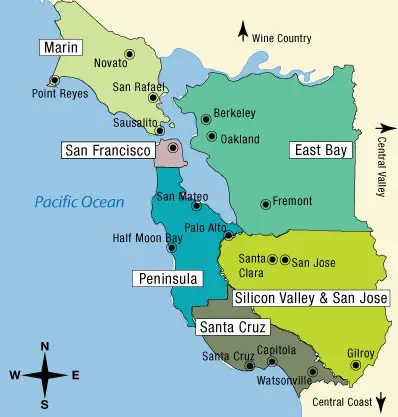

In [8]:
# Experiment with Text Attributes
red = '\033[91m'
green = '\033[92m'
blue = '\033[94m'
bold = '\033[1m'
italics = '\033[3m'
underline = '\033[4m'
end = '\033[0m'

# Determine number of members living in san franscisco bay area
# list of 100+ cities with one hour of sanfrancisco.
# https://bizdetail.com/list-of-bay-area-cities-copy-paste/

# Create city column (with only city info).
cal_males = data[(data['sex'] == 'm') & (data['location'].str.contains('california'))]
cal_males = cal_males[['orientation', 'location']]
cal_males['city'] = cal_males['location'].apply(lambda x: x.rsplit(',', 1)[0] if ',' in x else x)

cal_males = pd.DataFrame(cal_males[['city','orientation']]).sort_values(by=['city','orientation'], ascending=True)

cal_males_vc = cal_males.groupby('orientation').city.value_counts()
cal_males_df = pd.DataFrame(cal_males_vc)
cal_males_df = cal_males_df.reset_index()

cal_males_df.columns = ['orientation', 'city','count']

# call function to insert data to males_data dataframe.

sf_bay_area_city_list = ['alameda', 'albany', 'american canyon', 'antioch', 'atherton', 'belmont', 'belvedere', 'benicia', 'berkeley', 
 'brisbane', 'burlingame', 'campbell', 'clayton', 'colma', 'concord', 'corte madera', 'cupertino', 'daly city', 
 'danville', 'dublin', 'east palo alto', 'el cerrito', 'emeryville', 'fairfax', 'foster city', 'fremont', 'gilroy', 
 'half moon bay', 'hayward', 'healdsburg', 'hercules', 'hillsborough', 'lafayette', 'larkspur', 'livermore', 
 'los altos', 'los altos hills', 'los gatos', 'martinez', 'menlo park', 'mill valley', 'millbrae', 'milpitas', 'moraga',
 'morgan hill', 'mountain view', 'newark', 'novato', 'oakland', 'oakley', 'orinda', 'pacifica', 'palo alto', 'petaluma',
 'piedmont', 'pinole', 'pittsburg', 'pleasanton', 'pleasant hill', 'port costa', 'redwood city', 'richmond', 
 'rohnert park', 'ross', 'helena', 'san anselmo', 'san bruno', 'san carlos', 'san francisco', 'south san francisco', 
 'north san francisco', 'san jose', 'san leandro', 'san mateo', 'san pablo', 'san rafael', 'san ramon', 'santa clara',
 'santa rosa', 'saratoga', 'sausalito', 'sebastopol', 'sonoma', 'suisun city', 'sunnyvale', 'tiburon', 'union city', 
 'vallejo', 'walnut creek', 'windsor', 'woodside']

# Create a dataframe of males in San Francisco Bay area
sf_bay_area_males = cal_males_df.loc[cal_males_df['city'].isin(sf_bay_area_city_list)]

print()
print()
print(bold + "Total Males in SF Bay Area" + end)
print()
tot_males_sf = sf_bay_area_males['count'].sum()
print('{:,}'.format(tot_males_sf))
print()
print(bold + "Total Males in California" + end)
print()
tot_males_cal = len(cal_males)
print('{:,}'.format(tot_males_cal))
print()
print(bold + "Total Males in Dataset" + end)
print()
num_males_dataset = data.query("sex == 'm'")
num_males_dataset =  num_males_dataset.orientation.count()
print('{:,}'.format(num_males_dataset))
print()
print (bold + "Percentage All Males in Dataset from SF Bay Area" + end)
print()
percent_sf = float(tot_males_sf) /float(num_males_dataset)
print("{:,}%".format(round(percent_sf,2)*100))
# Display towns in SF area with 250+ members
print()
sf_males_249_plus = sf_bay_area_males.loc[sf_bay_area_males['count']>249]
print(bold + "Value Count of Towns with 250+ Males" + end)
print()
print(sf_males_249_plus)
print(type(sf_males_249_plus))
print()



Total Males in SF Bay Area

34,914

Total Males in California

35,762

Total Males in Dataset

35,823

Percentage All Males in Dataset from SF Bay Area

97.0%

Value Count of Towns with 250+ Males

    orientation                 city  count
0      bisexual        san francisco    354
51          gay        san francisco   2733
52          gay              oakland    362
53          gay             berkeley    257
106    straight        san francisco  15711
107    straight              oakland   3216
108    straight             berkeley   2114
109    straight            san mateo    795
110    straight            palo alto    651
111    straight              alameda    508
112    straight              hayward    443
113    straight            daly city    424
114    straight           emeryville    419
115    straight         redwood city    403
116    straight           san rafael    385
117    straight          san leandro    365
118    straight         walnut creek    361
119    s

In [9]:
# create empty dataframe for features data.
features_data = pd.DataFrame()

In [10]:
# 1) create new categorical column for male features list, insert city
 
# creating categorical data series, drop all nans
city = pd.Series(pd.Categorical(cal_males['city'], ordered=False), name='city').dropna()
# preserving categorical data as strings in features_data
features_data['city'] = city
print(len(features_data.city))
# mapping cateorical data to numeric using get_dummies
features_data.head()

35762


,city
0,alameda
1,alameda
2,alameda
3,alameda
4,alameda


In [11]:
#2) As the focus of most of my analyses, I've chosen to order orientation

orientation = pd.Series(pd.Categorical(cal_males['orientation'], categories=['gay','bisexual','straight'], ordered=False), name='orientation')
features_data['orientation'] = orientation
print(len(features_data.orientation.dropna()))
features_data.head(3)

35762


,city,orientation
0,alameda,bisexual
1,alameda,bisexual
2,alameda,bisexual


In [12]:
# features_data.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

In [13]:
# hexidecimal codes for sns dark palette
pal = sns.color_palette("dark")
print(pal.as_hex())
pal.as_hex()

['#001c7f', '#b1400d', '#12711c', '#8c0800', '#591e71', '#592f0d', '#a23582', '#3c3c3c', '#b8850a', '#006374']


['#001c7f',
 '#b1400d',
 '#12711c',
 '#8c0800',
 '#591e71',
 '#592f0d',
 '#a23582',
 '#3c3c3c',
 '#b8850a',
 '#006374']

### Histogram: Age Range and Orientation for Males in Sample

Percentile Analysis for Males by Age Range:

0.1    23.0
0.2    25.0
0.3    26.0
0.4    28.0
0.5    30.0
0.6    32.0
0.7    34.0
0.8    38.0
0.9    45.0
1.0    69.0
Name: age, dtype: float64



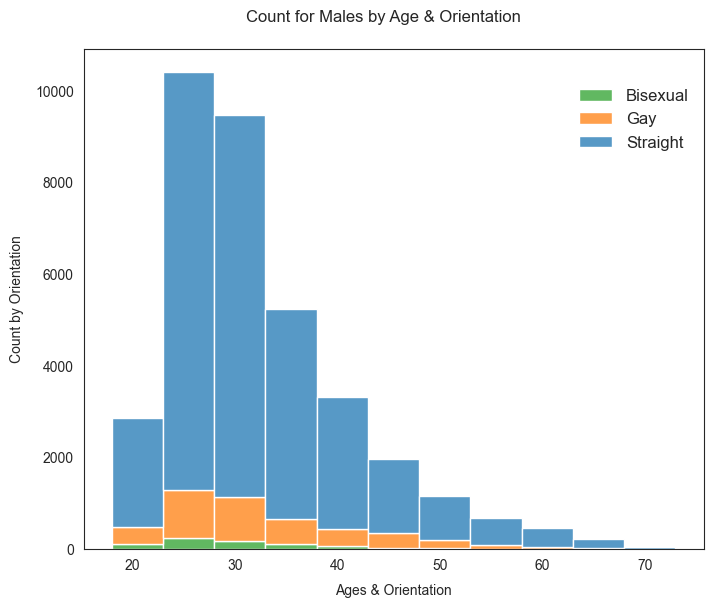

Mean Age of All Males
32.01

Minimum Age of All Males
18

Maximum Age of All Males
69

All orientation have the same age ranges (18-69).


Straight Mean Age:  age    31.98
dtype: float64


Gay Mean Age:  age    32.5
dtype: float64


Bisexual Mean Age:  age    30.74
dtype: float64



In [14]:
from matplotlib import rcParams

age_mdata = df.copy()
age_mdata = age_mdata.loc[age_mdata['sex']=='m', ['age','orientation']]
print(bold + "Percentile Analysis for Males by Age Range:" + end)
print()
print(age_mdata['age'].quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]))
print()
sns.set_style('white')

# figure size in inches
rcParams['figure.figsize'] = 8,6.5

g = sns.histplot(age_mdata, x='age', hue='orientation', binwidth=5, stat='count', multiple='stack')
plt.legend(labels=['Bisexual', 'Gay', 'Straight'], frameon=False, title_fontsize='medium', loc='upper right', prop = {"size": 10})
sns.move_legend(g, loc="upper right", bbox_to_anchor=(1, .95), ncol=1, fontsize=12)
plt.suptitle('Count for Males by Age & Orientation', fontsize=12, y=.94)
plt.ylabel("Count by Orientation", labelpad=8, fontsize=10)
plt.xlabel("Ages & Orientation", labelpad=8, fontsize=10)
plt.show()

# Average age for male participants:

avg_age = age_mdata['age'].mean()
min_age = age_mdata['age'].min()
max_age = age_mdata['age'].max()

print(bold + "Mean Age of All Males" + end)
print(round(avg_age, 2))
print()
print(bold + "Minimum Age of All Males"  + end)
print(round(min_age, 2))
print()
print(bold + "Maximum Age of All Males" + end)
print(round(max_age, 2))
print()
print("All orientation have the same age ranges (18-69).")
print()
straight_ages = age_mdata.loc[data['orientation']=='straight', ['age']]
print()
print(bold + "Straight Mean Age: " + end, round(straight_ages.mean(),2))
print()
gay_ages = age_mdata.loc[data['orientation']=='gay', ['age']]
print()
print(bold + "Gay Mean Age: " + end, round(gay_ages.mean(),2))
print()
bisexual_ages = age_mdata.loc[data['orientation']=='bisexual', ['age']]
print()
print(bold + "Bisexual Mean Age: " + end, round(bisexual_ages.mean(),2))
print()

# income data excluded from features dataframe.

In [15]:
# Excluding age from features_data. It is used with pd.cut for generational status below.

###  2)  What can we learn from the breakdown of orientation by gender?

Numbers for Sexual Orientation

orientation
straight    51599
gay          5573
bisexual     2767
Name: count, dtype: int64

Percentages for Sexual Orientation by Gender

orientation  sex
bisexual     f      0.721359
             m      0.278641
gay          m      0.715055
             f      0.284945
straight     m      0.602085
             f      0.397915
Name: proportion, dtype: float64

Crosstab Barchart Sexual Orientation & Gender


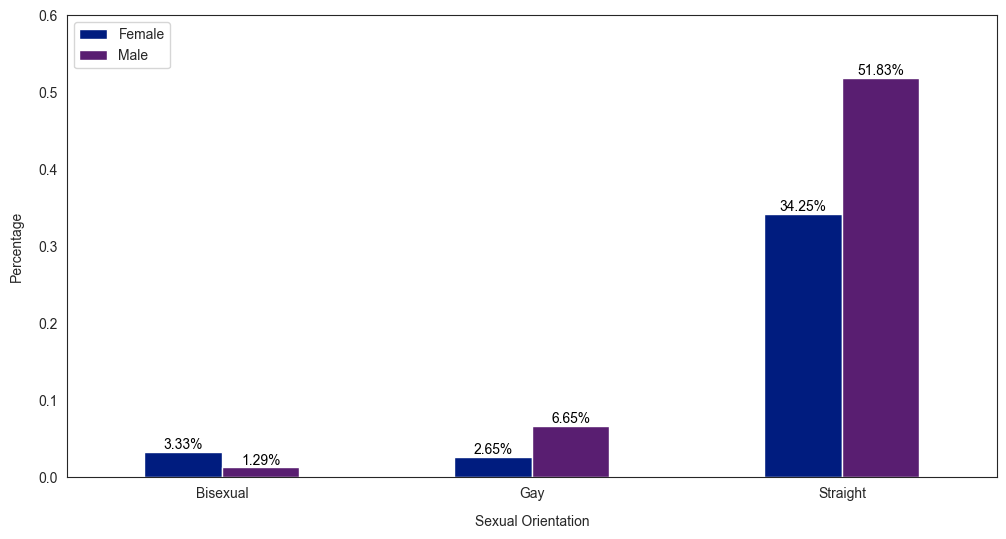

In [16]:
# Visualize data with Matplotlib and/or Seaborn

# First, take a snapshot of sexual orientations for both genders before
# focusing the rest of our efforts mostly on male sexuality. The provides a
# general baseline for further comparisions. Normalize data to ensure
# integrity of comparision, as male members outnumber female members.

# Crosstab Sexual Orientation & Gender Barchart

gender_data = df.copy()
gender_data = gender_data.dropna(subset=['sex', 'orientation'])

print(bold + "Numbers for Sexual Orientation" + end)
print()
print(gender_data.orientation.value_counts())
print()
print(bold + "Percentages for Sexual Orientation by Gender" + end)
print()
print(gender_data.groupby('orientation').sex.value_counts(normalize=True))
print()
print(bold + "Crosstab Barchart Sexual Orientation & Gender" + end)
bar_colors = ['#001c7f', '#591e71']
orientation_chart = pd.crosstab(gender_data.orientation, gender_data.sex, normalize=True)
barplot = orientation_chart.plot.bar(figsize=(12,6), color=bar_colors, rot=0)
barplot.legend(title='Sexual Orientation & Gender', loc='upper left', fancybox=True)
plt.xlabel('Sexual Orientation', labelpad=10)
barplot.set_xticks(ticks=[0, 1, 2], labels=["Bisexual", "Gay", "Straight"])
plt.ylabel('Percentage', labelpad=10)
plt.yticks([i for i in np.arange(0,.7,.1)])
plt.legend(labels = ['Female', 'Male'], loc="upper left")
total_sum = orientation_chart.value_counts(normalize=True).sum()

for bar in barplot.patches:
  bar_value = (bar.get_height()/total_sum).round(decimals=4)
  bar_value = bar_value
  text_x = bar.get_x() + bar.get_width() / 2
  text_y = bar.get_y() + bar_value
  bar_color = "black"
  pre_text = round((float(bar_value)*100),2)
  text = f'{pre_text:,}%'
  barplot.text(text_x, text_y, text, ha='center', va='bottom', color=bar_color, size=10)

plt.show()

<b>Section I: Conclusion Statement, Sample Demographics</b>
<ol>
  <p></p>
    <li>All orientations in this sample share the same age range (18-69). The average age varies little by orientation: 32.51 for straight males, 32.22 for gay males, and 29.32 for bisexual males. 87% of the male population identifies as straight, 9.3% identifies as gay, and 4.62% identifies as bisexual.</li>
  <p></p>
  <li><b>The gender breakdown showed that, while men are 2.5 times more likely to identify as gay than women, women are 2.5 times more likely to identify as bisexual than males.</b></li>
  <p></p>
    <li>The percentile analysis reveals the population is not equally distributed over age ranges:</li>
        <ul>
    <li> 70% are between 18 and 35 years</li>
    <li> <b> 50% are between 25 and 35 years <b> </li>
    <li> 10% are between 40 and 69 years old</li>
        </ul>
  <p></p>
    <li>Location was a very important consideration.</li> 
    <p></p>
      <li> More than 97% of males live within one hour's driving time from San Francisco, traditionally a haven for the LGBT community; and 99.85% live in California. Though not representative of small-town America, the numbers for gay/bisexual men and lesbians are much higher in the dataset than traditional estmates.</li>
  <p></p>
    <li> In contrast, The Williams Institute at UCLA estimates the total LGBT population at 6.7% for the greater San Francisco  metropolitan area. The numbers in the sample are significantly higher at 14% for gay/bisexual males alone. This sample does not identify transsexal members. <a> https://williamsinstitute.law.ucla.edu/publications/lgbt-us-msa/ </a> </li>
</ol>

### 3) What is the relationship between "primary" ethnicity and orientation?

In [17]:
# My goal here is to create a database that shows male orientaion
# versus male primary ethnicity as both as percentage of the total male population
# and as a percentage of that race. 

# The MOE (male orientation and ethnicity)
# dataset accomplishes that task, though it took a long time to manipulate
# the statistics into the right position for plotting.

# Important to note we worked with primary ethnicities only.

# Prepare ethinicity and orientation data.
# As a percentage of both that orientation and all males

mdata = data.copy()
mdata = data.query("sex == 'm'")
mdata = mdata[['orientation', 'ethnicity']]
mdata = mdata.dropna(subset=['ethnicity', 'orientation'], axis=0)

# split dataframe before we use split to separate columns or we lose data.

males_data_saved = mdata[['orientation', 'ethnicity']]

# segment different ethnicity groups in different columns.

mdata_tosplit = mdata.copy()

# Create separate dataframe with separate columns for multiple ethnicities 
mdata_eths_list = [mdata_tosplit['ethnicity'].str.split('/|;|,', expand=True).add_prefix('eth_') for row in mdata_tosplit]

mdata_eths_df = pd.concat(mdata_eths_list)

# rejoin/merge dataframe on index, drop duplicates

mdata_merged = males_data_saved.merge(mdata_eths_df, left_index=True, right_index=True, how='outer').reset_index(drop=True)
mdata_merged.fillna(value=0, inplace=True)

# very, very males few have more than three ethicities
mdata_eths = mdata_merged[['orientation', 'eth_0', 'eth_1', 'eth_2']]
mdata_eths = mdata_eths[['orientation', 'eth_0']]
moe = mdata_eths.groupby(['eth_0','orientation']).value_counts()
print()
print(bold+ "MOE DataFrame with Totals" +end)
print()
moe = pd.DataFrame(moe)
moe.reset_index(inplace=True)
moe.columns = ['ethnicity', 'orientation', 'totals']
print(moe)
print()

# Total for all males in MOE dataframe
sum_moe_totals = float(moe.totals.sum())

# Augment data with new column for percentage of all males
moe['percent_males'] = (round(moe['totals']/sum_moe_totals, 4))
moe.columns = ['ethnicity', 'orientation', 'totals', 'percent_males']
print()

# add up counts for each ethnicty
asian_total = moe.query("ethnicity=='asian'")['totals'].sum()
white_total = moe.query("ethnicity=='white'")['totals'].sum()
black_total = moe.query("ethnicity=='black'")['totals'].sum()
hispanic_total = moe.query("ethnicity=='hispanic '")['totals'].sum()
native_total = moe.query("ethnicity=='native american'")['totals'].sum()
pacific_total = moe.query("ethnicity=='pacific islander'")['totals'].sum()
mideast_total = moe.query("ethnicity=='middle eastern'")['totals'].sum()
indian_total = moe.query("ethnicity=='indian'")['totals'].sum()
other_total = moe.query("ethnicity=='other'")['totals'].sum()

print(bold + "Total Counts in Sample by Ethnicity" + end)
print()
print("Asian: ", '{:,}'.format(round(asian_total, 2)))
print("White: ", '{:,}'.format(round(white_total, 2)))
print("Black: ", '{:,}'.format(round(black_total, 2)))
print("Hispanic: ", '{:,}'.format(round(hispanic_total, 2)))
print("Native American: ", '{:,}'.format(round(native_total, 2)))
print("Pacific Islander: ", '{:,}'.format(round(pacific_total, 2)))
print("Middle East: ", '{:,}'.format(round(mideast_total, 2)))
print("Indian: ",  '{:,}'.format(round(indian_total, 2)))
print("Other: ",  '{:,}'.format(round(other_total, 2)))

# proportions by ethnicity
asian_prop = (round(asian_total/sum_moe_totals, 4)*100)
white_prop = (round(white_total/sum_moe_totals, 4)*100)
black_prop = (round(black_total/sum_moe_totals, 4)*100)
hisp_prop = (round(hispanic_total/sum_moe_totals, 4)*100)
native_prop = (round(native_total/sum_moe_totals, 4)*100)
pacific_prop = (round(pacific_total/sum_moe_totals, 4)*100)
mideast_prop = (round(mideast_total/sum_moe_totals, 4)*100)
indian_prop = (round(indian_total/sum_moe_totals, 4)*100)
other_prop = (round(other_total/sum_moe_totals, 4)*100)

# proportions by ethnicity
print()
print(bold + "Proportions of Ethnicity in Sample" + end)
print()
print("Asian: ", "{}%".format(round(asian_prop), 4))
print("White: ", "{}%".format(round(white_prop), 4))
print("Black: ", "{}%".format(round(black_prop), 4))
print("Hispanic: ", "{}%".format(round(hisp_prop), 4))
print("Native American: ", "{}%".format(round(native_prop), 4))
print("Pacific Islander: ", "{}%".format(round(pacific_prop), 4))
print("Middle East: ", "{}%".format(round(mideast_prop), 4))
print("Indian: ", "{}%".format(round(indian_prop), 4))
print("Other: ", "{}%".format(round(other_prop), 4))

# create a new column to contain proportions by ethinicity
# create new dataframe with percentages of ethnicity (not % of male pop) for charts

# asian labels and values
asian_data = moe.loc[moe['ethnicity'] == 'asian', ['orientation', 'percent_males']]
asian_data.insert(loc=0, column='ethnicity', value='asian')
sum_asian = asian_data['percent_males'].sum()

asian_vals = asian_data['percent_males'].apply(lambda x: float(x)/float(sum_asian))
asian_data.insert(loc=3, column='percent_eths', value=asian_vals)

# black labels and values
black_data = moe.loc[moe['ethnicity'] == 'black', ['orientation', 'percent_males']]
black_data.insert(loc=0, column='ethnicity', value='black')
sum_black = black_data['percent_males'].sum()

black_vals = black_data['percent_males'].apply(lambda x: float(x)/float(sum_black))
black_data.insert(loc=3, column='percent_eths', value=black_vals)

# hispanic labels and values
hispanic_data = moe.loc[moe['ethnicity'] == 'hispanic ', ['orientation', 'percent_males']]
hispanic_data.insert(loc=0, column='ethnicity', value='hispanic')
sum_hispanic = hispanic_data['percent_males'].sum()

hispanic_vals = hispanic_data['percent_males'].apply(lambda x: float(x)/float(sum_hispanic))
hispanic_data.insert(loc=3, column='percent_eths', value=hispanic_vals)

# indian labels and values
indian_data = moe.loc[moe['ethnicity'] == 'indian', ['orientation', 'percent_males']]
indian_data.insert(loc=0, column='ethnicity', value='indian')
sum_indian = indian_data['percent_males'].sum()

indian_vals = indian_data['percent_males'].apply(lambda x: float(x)/float(sum_indian))
indian_data.insert(loc=3, column='percent_eths', value=indian_vals)

# mideast labels and values
mideast_data = moe.loc[moe['ethnicity'] == 'middle eastern', ['orientation', 'percent_males']]
mideast_data.insert(loc=0, column='ethnicity', value='mideast')
sum_mideast = mideast_data['percent_males'].sum()

mideast_vals = mideast_data['percent_males'].apply(lambda x: float(x)/float(sum_mideast))
mideast_data.insert(loc=3, column='percent_eths', value=mideast_vals)

# native labels and values
native_data = moe.loc[moe['ethnicity'] == 'native american', ['orientation', 'percent_males']]
native_data.insert(loc=0, column='ethnicity', value='native')
sum_native = native_data['percent_males'].sum()

native_vals = native_data['percent_males'].apply(lambda x: float(x)/float(sum_native))
native_data.insert(loc=3, column='percent_eths', value=native_vals)

# other labels and values
other_data = moe.loc[moe['ethnicity'] == 'other', ['orientation', 'percent_males']]
other_data.insert(loc=0, column='ethnicity', value='other')
sum_other = other_data['percent_males'].sum()

other_vals = other_data['percent_males'].apply(lambda x: float(x)/float(sum_other))
other_data.insert(loc=3, column='percent_eths', value=other_vals)

# pacific labels and values
pacific_data = moe.loc[moe['ethnicity'] == 'pacific islander', ['orientation', 'percent_males']]
pacific_data.insert(loc=0, column='ethnicity', value='pacific')
sum_pacific = pacific_data['percent_males'].sum()

pacific_vals = pacific_data['percent_males'].apply(lambda x: float(x)/float(sum_pacific))
pacific_data.insert(loc=3, column='percent_eths', value=pacific_vals)

# white labels and values
white_data = moe.loc[moe['ethnicity'] == 'white', ['orientation', 'percent_males']]
white_data.insert(loc=0, column='ethnicity', value='white')
sum_white = white_data['percent_males'].sum()

white_vals = white_data['percent_males'].apply(lambda x: float(x)/float(sum_white))
white_data.insert(loc=3, column='percent_eths', value=white_vals)

print()
print(bold + "Primary Ethnicity & Orientation Values\n As a Percentage of Males and Ethnicity" + end)
print()
moe_df = pd.concat([asian_data, black_data, hispanic_data, indian_data, mideast_data, native_data, other_data, pacific_data, white_data])

# format numeric data in colums
moe_df.percent_eths = [round(val, 4) for val in moe_df.percent_eths]
moe_df.percent_males = [round(val, 4) for val in moe_df.percent_males]

print(moe_df)


MOE DataFrame with Totals

           ethnicity orientation  totals
0              asian    bisexual     118
1              asian         gay    1312
2              asian    straight    8562
3              black    bisexual      78
4              black         gay     374
5              black    straight    2956
6          hispanic     bisexual     114
7          hispanic          gay     898
8          hispanic     straight    4506
9             indian         gay      98
10            indian    straight    1642
11    middle eastern    bisexual      22
12    middle eastern         gay     130
13    middle eastern    straight     888
14   native american    bisexual      46
15   native american         gay     100
16   native american    straight     676
17             other    bisexual      52
18             other         gay     180
19             other    straight    1788
20  pacific islander    bisexual      12
21  pacific islander         gay     172
22  pacific islander    strai

In [18]:
# 4) create new categorical series and column for feature data list
# insert "primary" ethnicity only

mdata = pd.DataFrame(mdata)

ethnicity1 = males_data_saved.ethnicity.str.split('/|;|,').str.get(0)

# not ordered

ethnicity1 = pd.Series(pd.Categorical(ethnicity1, ordered=False), name='ethnicity')
features_data['ethnicity'] = ethnicity1
print(len(features_data.ethnicity.dropna()))
features_data.head(3)

32559


,city,orientation,ethnicity
0,alameda,bisexual,white
1,alameda,bisexual,white
2,alameda,bisexual,other


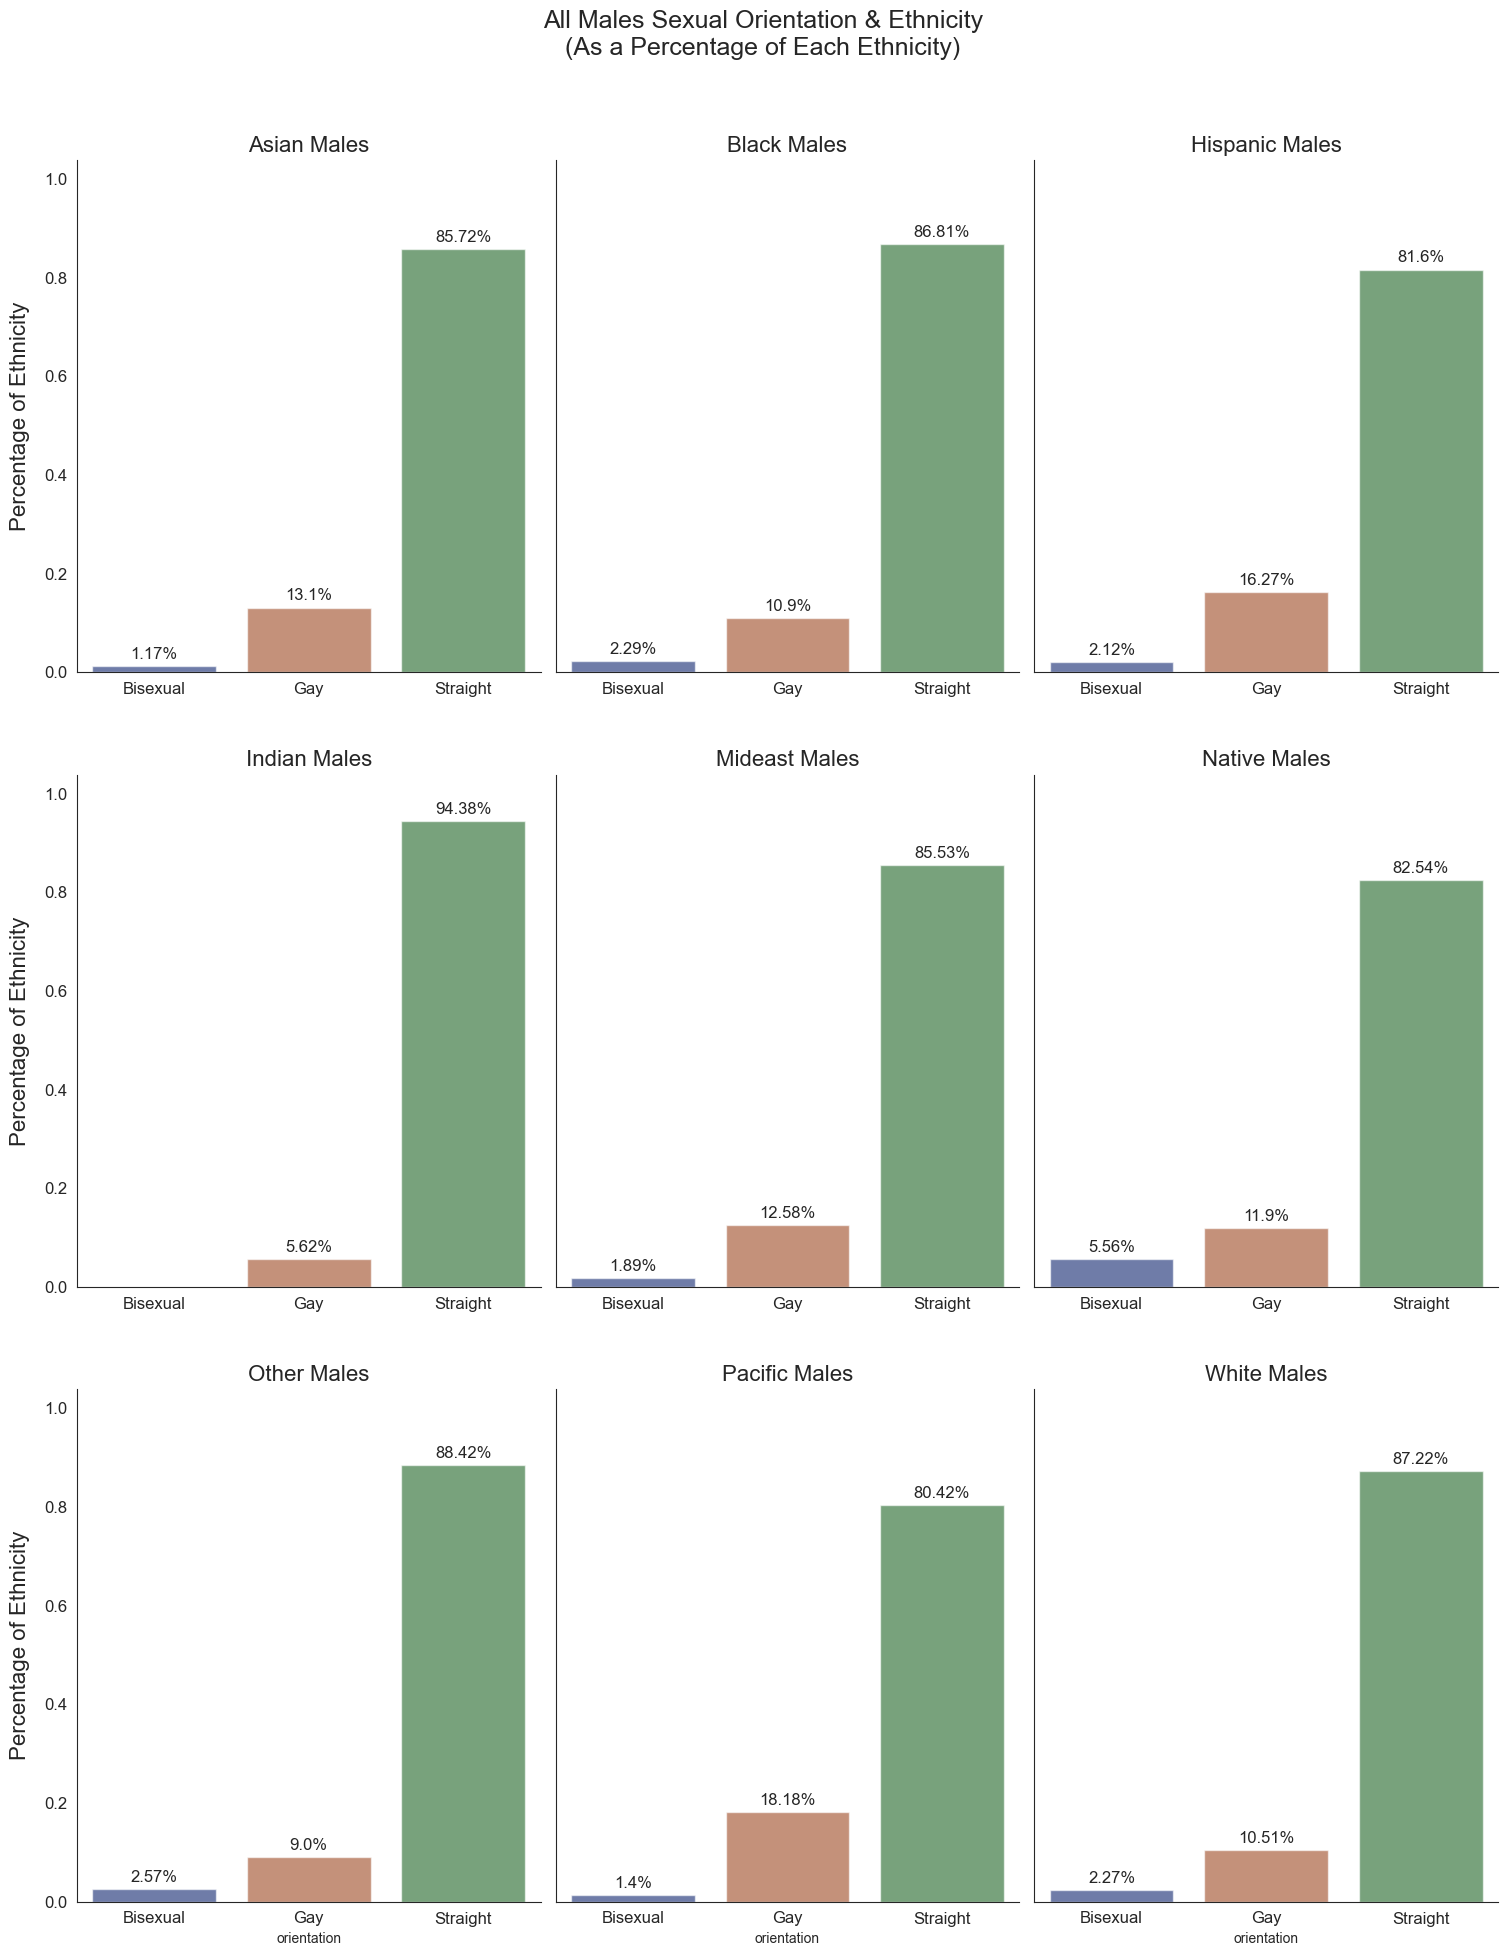

In [19]:
# Construct individual charts that compare orientation and primary ethnicity
# As a percentage of that ethnicity and then percentage of other males in sample.

# Example Question: What percentage of white males in this sample identify as straight?

# Answer: 87.22% of white males in this sample identify as straight.
# Straight white males also comprise 53.10% of all males in the total sample.
import seaborn as sns
import matplotlib.patches as patches

moe_df.ethnicity = moe_df.ethnicity.str.title()

sns.set_style('white')

col_order=["Asian", "Black", "Hispanic", "Indian", "Middle Eastern", "Native American", "Other", "Pacific Islander", "White"]

g = sns.catplot(data=moe_df, x='orientation', y='percent_eths', kind='bar', 
                col='ethnicity', col_wrap=3, palette="dark", legend=False, alpha=.6, height=5, aspect=1)

for ax in g.axes.ravel():

    # add annotations
    for c in ax.containers:
        labels = ["{}%".format(round(v.get_height()*100, 2)) for v in c]
        ax.bar_label(c, labels=labels, label_type='edge', padding=3, fontsize=12)
        ax.set_xticklabels(['Bisexual', 'Gay', 'Straight'], rotation=0, fontsize=12)
        ax.tick_params(labelbottom=True, labelsize=12)
        ax.margins(y=0.1)
        ax.set_ylabel( "Percentage of Ethnicity" , size = 16, labelpad=10)

    plt.subplots_adjust(top=1.2)
    g.set_titles(col_template="{col_name} Males", size=16)
    plt.subplots_adjust(hspace=.20)
    g.fig.suptitle("All Males Sexual Orientation & Ethnicity\n(As a Percentage of Each Ethnicity)", x=0.5, y=1.3, fontsize=18)

<b> Section II: Conclusion Statement, Orientation & Ethnicity </b>
<ol>
    <li>Parsing the ethnicity data was a challenge. Though most people choose one primary ethnicity, there was a significant minority who chose up to four ethnicities. I chose to work with the primary ethnicity of each male in the sample by taking the first word from the ethnicity column.
    </li>
    <p></p>
    <li>In the Income section, I explore the relationship of ethnicity, orienation and income, with an interactive graph that allows the user to examine average incomes for multiple ethnicities, but the sample sizes are often tiny. As it stands, this exploration of the relationship between orientation and ethnicity uses only <i>primary</i> ethinicity only.
    </li>
    <p></p>
    <li> Though I found a significant range, from 95% straight for Indian males to 80% straight for Pacific Islanders, I can explain these differences by examining sample sizes. Cultural tolerance also plays a role.
    </li>
    <p></p>
    <li> If I examine the largest, four primary ethnicities that represent 90% of the sample (Asian, Black, Hispanic, and White), the range narrows, from 81.6% for Hispanic males to 87.22% for White males, with an average 85.34% identifying as straight. 
    </li>
    <p></p>
   <li> White males are by far the largest group (39,644 or 62%) versus Asians, the second largest group (9,992 or 15.6%).
Thus, the issue of imbalanced classes became a significant issue. I normalized data to reduce the impact of the problem where possible, and turned to resampling methods in the analysis of orientation, ethnicity and income. 
    </li>
    <p></p>
    <li> Here, the findings suggest sociological factors (greater tolerance and social acceptance) could mean more people are comfortable expressing their orientations in some cultures more than others, but the findings are inconclusive.
    </li>
    <p></p>   

### 4) What is the relationship between male orientation and relgious affiliation?

In [20]:
# This section focuses on strictly relgious affilation in males by orientation.
# It answers the question, With what relgion do you identify?
# By taking the first word from the relgion column

religion_data = data.query("sex == 'm'").copy()

# Take first word of religion field, or name of religion.
religion_data['religion'] = data.religion.str.split().str.get(0)
religion_data = religion_data[['orientation', 'religion']].dropna().apply(lambda x: x.str.strip())
religion_data_vc = religion_data.groupby('orientation').value_counts(normalize=True)
religion_data_orientation_df = religion_data_vc.to_frame()
males_religion = religion_data_orientation_df.reset_index()
males_religion.columns = ['orientation','religion', 'percentages']
# format percentages to two decimals
males_religion.percentages = pd.Series(["{0:.2f}%".format(val*100) for val in males_religion.percentages], index = males_religion.index)
print(males_religion)
print(type(males_religion))

# Chart below shows relgious affiliation in males
# As percentage of total male population.

   orientation      religion percentages
0     bisexual         other      29.81%
1     bisexual       atheism      28.96%
2     bisexual   agnosticism      19.08%
3     bisexual  christianity       7.16%
4     bisexual      buddhism       6.30%
5     bisexual       judaism       4.77%
6     bisexual   catholicism       3.24%
7     bisexual         islam       0.34%
8     bisexual      hinduism       0.34%
9          gay   agnosticism      22.49%
10         gay         other      20.46%
11         gay       atheism      19.33%
12         gay   catholicism      12.70%
13         gay  christianity      12.06%
14         gay      buddhism       6.86%
15         gay       judaism       4.94%
16         gay      hinduism       0.83%
17         gay         islam       0.34%
18    straight   agnosticism      23.49%
19    straight       atheism      21.10%
20    straight         other      17.72%
21    straight  christianity      13.41%
22    straight   catholicism      11.18%
23    straight  

In [21]:
# 5) create new categorical column for male features list
# insert primary religion, find length of series by dropna

# unordered

religion_data['religion'] = data.religion.str.split().str.get(0)
religion_data['religion'].dropna(inplace=True)

religion = religion_data['religion']
religion = pd.Series(pd.Categorical(religion, ordered=False), name='religion')

features_data['religion'] = religion
print(len(features_data.religion.dropna()))

features_data.head(3)

23843


,city,orientation,ethnicity,religion
0,alameda,bisexual,white,atheism
1,alameda,bisexual,white,other
2,alameda,bisexual,other,agnosticism


In [22]:
# This section also focuses on relgious affilation in males by orientation.
# It answers the question, With what relgion do you identify?
# As a percentage of that religion versus all males (see above)

# grab religion name only. save sentiment for later us
data['religion'] = data.religion.str.split().str.get(0)
# religion list
religions = ['agnosticism', 'atheism', 'buddhism', 'catholicism', 'christianity', 'hinduism', 'islam', 'judaism', 'other']
# calculate list of counts by percentage of religion (not orientation)
orientation_religion_vc = data.groupby('religion')['orientation'].value_counts().dropna()
# convert to dataframe
orientation_religion_df = pd.DataFrame(orientation_religion_vc)
# reset index and columns
rel_counts = orientation_religion_df.reset_index()
rel_counts.columns = ['religion','orientation','totals']
print(bold+ "Religion Total Counts per Male Orientation" +end)
print()
print(rel_counts)

# Represents total number of males for that particular religion.

Religion Total Counts per Male Orientation

        religion orientation  totals
0    agnosticism    straight    7584
1    agnosticism         gay     782
2    agnosticism    bisexual     445
3        atheism    straight    5810
4        atheism         gay     663
5        atheism    bisexual     510
6       buddhism    straight    1539
7       buddhism         gay     275
8       buddhism    bisexual     134
9    catholicism    straight    4264
10   catholicism         gay     415
11   catholicism    bisexual      79
12  christianity    straight    5254
13  christianity         gay     393
14  christianity    bisexual     140
15      hinduism    straight     415
16      hinduism         gay      26
17      hinduism    bisexual       9
18         islam    straight     125
19         islam         gay       9
20         islam    bisexual       5
21       judaism    straight    2736
22       judaism         gay     232
23       judaism    bisexual     129
24         other    straight   

In [23]:
# print(bold+ "Totals of Orientation per Religion" +end)
# versus percentage of male population
keys = []
values = []

def religions_df(list):
    for religion in religions:
        var_name = religion+'_df'
        var_name = rel_counts.loc[rel_counts['religion']==religion, ['totals']]
        rel_sum = var_name.sum()
        keys.append(religion)
        values.append(rel_sum)
    rel_df = pd.DataFrame(np.column_stack([keys, values]), 
                               columns=['religion', 'totals'])
    return rel_df

religions_df(religions)

final_religion_df = pd.merge(rel_counts, religions_df(religions), on="religion")
final_religion_df.drop_duplicates(subset=['religion','orientation','totals_x', 'totals_y'], keep='first', inplace=True, ignore_index=True)
print(bold+ "Breakdown: Male Orientation for Each Religion" +end)
print()
# create percentages of orientation per religion
numerators = list(float(final_religion_df.total) for final_religion_df.total in final_religion_df.totals_x)
denominators = list(float(final_religion_df.total) for final_religion_df.total in final_religion_df.totals_y)
rel_percent = list(float((numerators[i]/denominators[i]*100)) for i in range(len(denominators)))

final_religion_df['rel_percent'] = rel_percent
final_religion_df.rel_percent = [round(val, 2) for val in final_religion_df.rel_percent]
print(final_religion_df)

Breakdown: Male Orientation for Each Religion

        religion orientation  totals_x totals_y  rel_percent
0    agnosticism    straight      7584     8811        86.07
1    agnosticism         gay       782     8811         8.88
2    agnosticism    bisexual       445     8811         5.05
3        atheism    straight      5810     6983        83.20
4        atheism         gay       663     6983         9.49
5        atheism    bisexual       510     6983         7.30
6       buddhism    straight      1539     1948        79.00
7       buddhism         gay       275     1948        14.12
8       buddhism    bisexual       134     1948         6.88
9    catholicism    straight      4264     4758        89.62
10   catholicism         gay       415     4758         8.72
11   catholicism    bisexual        79     4758         1.66
12  christianity    straight      5254     5787        90.79
13  christianity         gay       393     5787         6.79
14  christianity    bisexual       140

### 5) What is the relationship between orientation and relgious affiliation, as a percentage of orientation?

Religious Beliefs in Males by Orientation




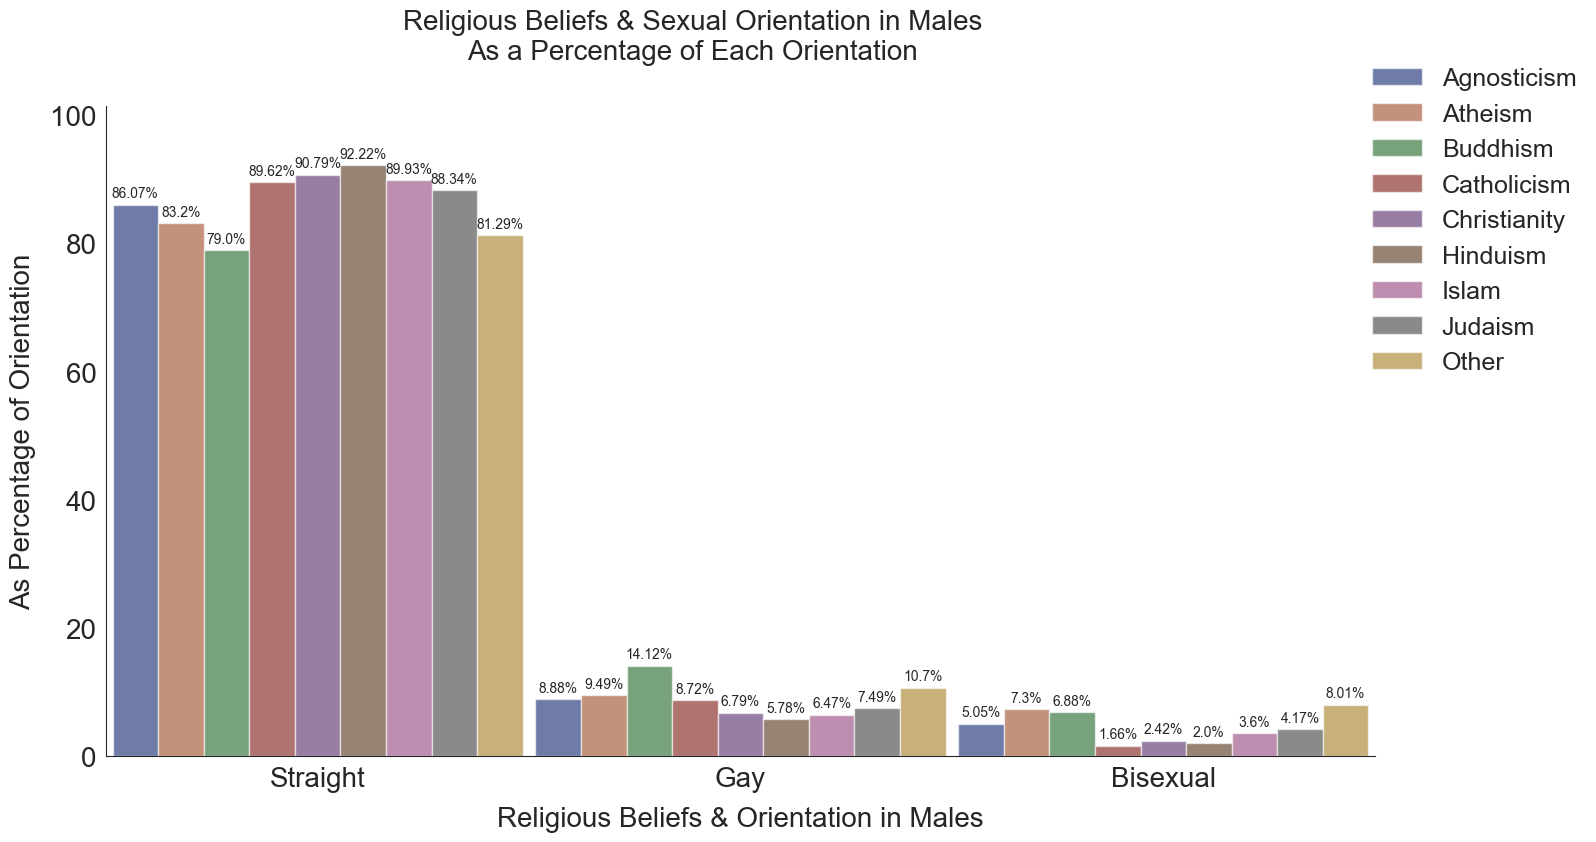

In [24]:
# This chart depicts religious beliefs as a percentage of the orientation.
# The subsequent chart dicpts religious beliefs as a percentage of the religion.

print(bold + "Religious Beliefs in Males by Orientation" + end)
print()
males_religion = final_religion_df
males_religion.religion = males_religion.religion.str.title() 

# Convert string percentage values to numeric (float).
males_religion.rel_percent = pd.to_numeric(males_religion.rel_percent, errors='coerce')

sns.set_style('white')

g = sns.catplot(data=males_religion, x='orientation', y='rel_percent', hue='religion', alpha=.6, height=8.27, 
                aspect=11.7/8.27, width=.97, kind='bar', dodge=.05, palette="dark", legend=None, ci=None)

g.set_axis_labels('Religious Beliefs & Orientation in Males', 'As Percentage of Orientation', fontsize=20, labelpad=10)
g.fig.subplots_adjust(hspace=0.30)

# iterate through axes
for ax in g.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        labels = ["{}%".format(round(v.get_height(), 2)) for v in c]
        ax.bar_label(c, labels=labels, label_type='edge', padding=3, fontsize=10)
        ax.set_xticklabels(['Straight','Gay', 'Bisexual'], rotation=0, fontsize=20)
        ax.tick_params(labelbottom=True, labelsize=20)
        ax.margins(y=0.1)

g.fig.suptitle("Religious Beliefs & Sexual Orientation in Males\nAs a Percentage of Each Orientation", horizontalalignment='center', size=20, y=1.013)
g.set_titles(col_template="{col_name}", size=18)
g.add_legend(fontsize=18)
g.fig.subplots_adjust(hspace=.25)
sns.move_legend(g, loc="upper right", bbox_to_anchor=(1.15, .97), ncol=1, fontsize=18)
g.fig.tight_layout()

print()
plt.show(g)

# In this sample, there are some differences in relgious beliefs by sexual orientation in these males.
# Traditional religions appeal to straight males with ~90% for Catholicism, Christianity, Islam and Hinduism.
# Eastern and non-traditional religions have greater appeal among gay males, notably Buddhism (14.12%), Atheism (9.49%) and Other(10.70%).
# Likewise, Bisexual males were drawn to Atheism (7.30%), Buddhism (6.88%) and Other 8.01%.
# As expected gay/bisexual males less likely to affiliate with religions where explicity condemned.

# Difference in religious affilitation and attitudes toward religion 
# represent probably the biggest differences in male sexuality.

# lower case for title cased religions
males_religion.religion = males_religion.religion.str.lower() 

### 6) What is the relationship between male orientation, relgious "affiliation" vs. religious "sentiment" as a percentage of both orientation and each religion?

###### We define religious "sentiment" as one's attitudes toward religion vs. one's declared religious beliefs or practice.

In [25]:
# I wanted to show I could work with functions.

# Here, I add the totals for each relgion and the total for all males of that religion,
# so that I can arrive at the percentage of that orientation anc canpture the 
# responses to this question of relgious affiliation from all angles.

float_formatter = "{:.2f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

print(bold+ "Totals of Orientation per Religion" +end)
# versus percentage of male population

keys = []
values = []

def religions_df(list):
    for religion in religions:
        var_name = religion+'_df'
        var_name = rel_counts.loc[rel_counts['religion']==religion, ['totals']]
        rel_sum = var_name.sum()
        keys.append(religion)
        values.append(rel_sum)
    rel_df = pd.DataFrame(np.column_stack([keys, values]), 
                               columns=['religion', 'totals'])
    return rel_df

religions_df(religions)

final_religion_df = pd.merge(rel_counts, religions_df(religions), on="religion")
final_religion_df.drop_duplicates(subset=['religion','orientation','totals_x', 'totals_y'], keep='first', inplace=True, ignore_index=True)
print("Final Dataframe Merged")
print()
# create percentages of orientation per religion
numerators = list(float(final_religion_df.total) for final_religion_df.total in final_religion_df.totals_x)
denominators = list(float(final_religion_df.total) for final_religion_df.total in final_religion_df.totals_y)
rel_percent = list((float_formatter(float(numerators[i]/denominators[i]*100))) for i in range(len(denominators)))

final_religion_df['rel_percent'] = rel_percent
print(type(final_religion_df['rel_percent'].astype(float)))
print(final_religion_df)

Totals of Orientation per Religion
Final Dataframe Merged

<class 'pandas.core.series.Series'>
        religion orientation  totals_x totals_y rel_percent
0    agnosticism    straight      7584     8811       86.07
1    agnosticism         gay       782     8811        8.88
2    agnosticism    bisexual       445     8811        5.05
3        atheism    straight      5810     6983       83.20
4        atheism         gay       663     6983        9.49
5        atheism    bisexual       510     6983        7.30
6       buddhism    straight      1539     1948       79.00
7       buddhism         gay       275     1948       14.12
8       buddhism    bisexual       134     1948        6.88
9    catholicism    straight      4264     4758       89.62
10   catholicism         gay       415     4758        8.72
11   catholicism    bisexual        79     4758        1.66
12  christianity    straight      5254     5787       90.79
13  christianity         gay       393     5787        6.79
14  c

### 7) In contrast, what is the relationship between male orientation and religious sentiment?

In [26]:
# Relationship of sexual orientation and relgious sentiment

rdata = df.copy()
male_rdata = rdata.query("sex == 'm'")

male_rdata.dropna(subset=['orientation', 'religion'], inplace=True)
male_rdata = rdata.loc[:,['orientation', 'religion']].dropna(subset=['orientation', 'religion'])

# explode religion column into religion and religious sentiment
male_rdata[['religion', 'sentiment']] = rdata['religion'].str.split(n=1, expand=True)

# normalize and compare with value counts.

relsent = male_rdata[['orientation', 'religion', 'sentiment']].apply(lambda x: x.str.strip())

print()
print(bold+ "Religous Sentiment: Value Counts for All Orientations" +end)
print()

#  tracking values above .25% in converted dataframe
male_relsent = relsent.groupby('orientation').sentiment.value_counts(normalize=True).loc[lambda x : x >= .0005]
male_relsent = pd.DataFrame(male_relsent)
male_relsent.reset_index(inplace=True)
male_relsent.columns = ['orientation', 'sentiment', 'percentages']
male_relsent.percentages = [round(val*100, 4) for val in male_relsent.percentages]
male_relsent = male_relsent.sort_values(by='orientation')
print(male_relsent)
print()


Religous Sentiment: Value Counts for All Orientations

   orientation                      sentiment  percentages
0     bisexual          and laughing about it      39.3883
1     bisexual   but not too serious about it      30.5243
2     bisexual  and somewhat serious about it      19.8502
3     bisexual      and very serious about it      10.2372
4          gay   but not too serious about it      44.4009
5          gay          and laughing about it      28.8958
6          gay  and somewhat serious about it      17.8935
7          gay      and very serious about it       8.8097
8     straight   but not too serious about it      44.5328
9     straight          and laughing about it      32.0633
10    straight  and somewhat serious about it      15.7204
11    straight      and very serious about it       7.6836



In [27]:
# 6) create new categorical column for features data 
# insert religious sentiment. find length of series by dropna

# Relationship of male orientation and relgious sentiment

sentiment = male_rdata['sentiment']
relsent = pd.Series(pd.Categorical(sentiment, ordered=False), name='sentiment')
features_data['sentiment'] = relsent

features_data.dropna(subset=['sentiment'], inplace=True)
print(len(features_data.sentiment))
features_data.head(3)

25078


,city,orientation,ethnicity,religion,sentiment
3,alameda,bisexual,white,catholicism,and laughing about it
4,alameda,bisexual,white,christianity,and laughing about it
5,alameda,bisexual,white,catholicism,but not too serious about it


Religious Sentiment for All Males by Orientation



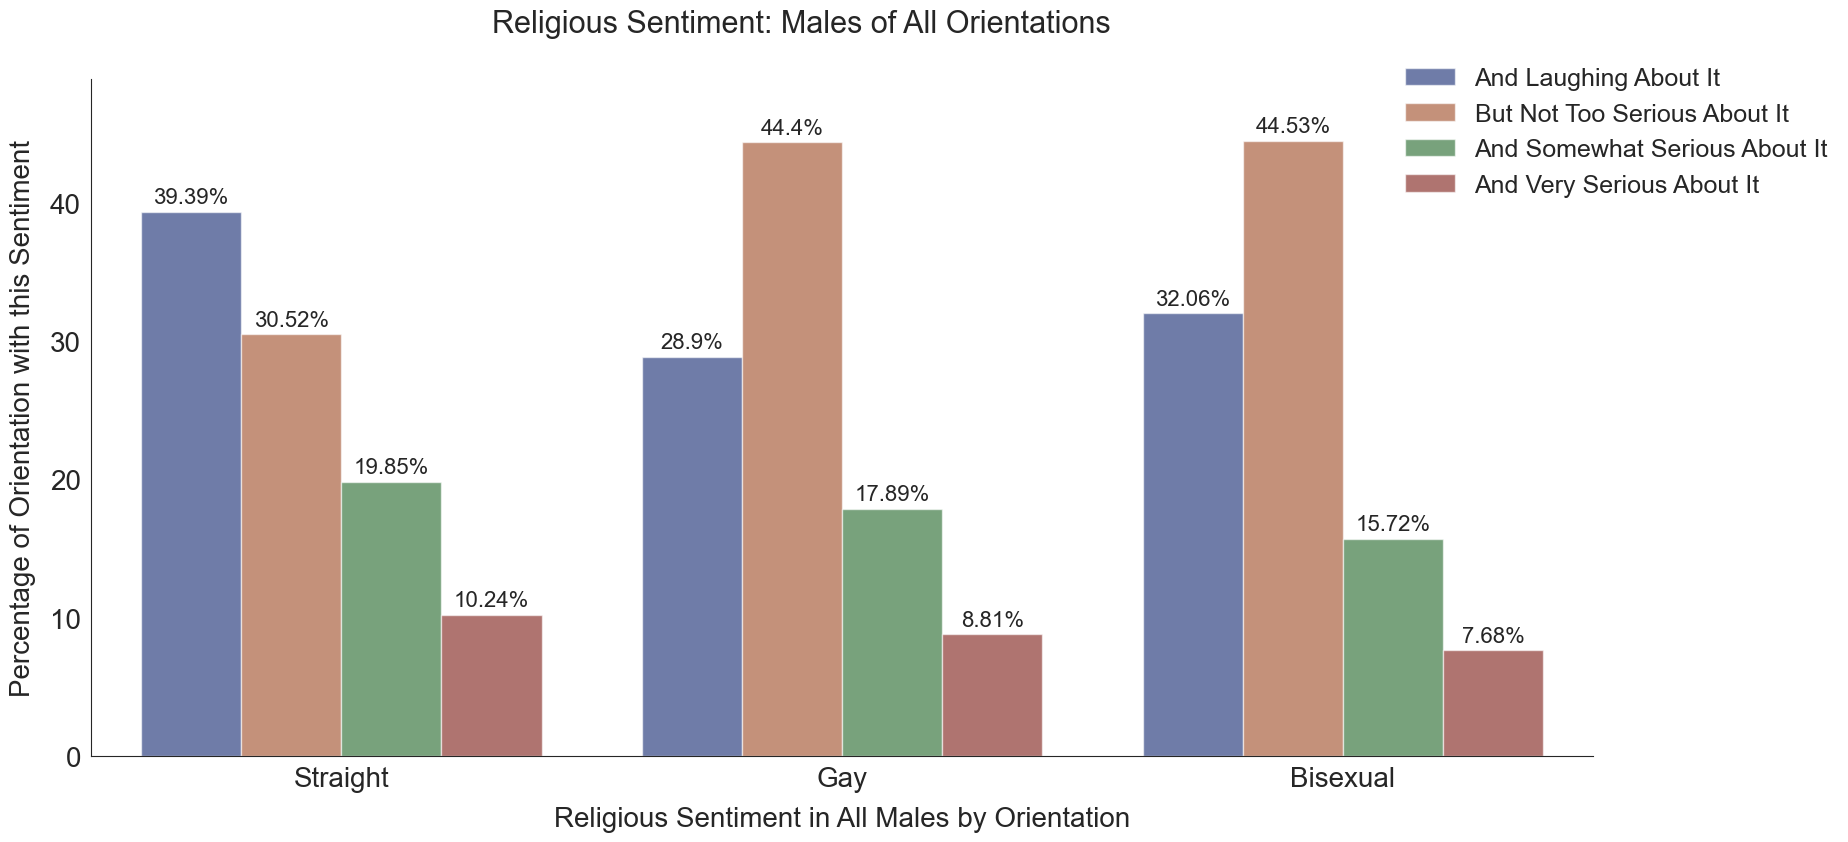

In [28]:
print(bold + "Religious Sentiment for All Males by Orientation" + end)
print()
 
# set background style in seaborn
sns.set_style('white')

male_relsent.sentiment = male_relsent.sentiment.str.title() 

# plot seaborn catplot chart
g = sns.catplot(data=male_relsent, x='orientation', y='percentages', hue='sentiment', alpha=.6, height=8.27, 
                aspect=11.7/8.27, kind='bar', palette="dark", legend=None, ci=None)

g.set_axis_labels('Religious Sentiment in All Males by Orientation', 'Percentage of Orientation with this Sentiment', fontsize=20, labelpad=10)
g.fig.subplots_adjust(hspace=0.30)

# iterate through axes
for ax in g.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        labels = ["{}%".format(round(v.get_height(), 2)) for v in c]
        ax.bar_label(c, labels=labels, label_type='edge', padding=3, fontsize=16)
        ax.set_xticklabels(['Straight','Gay', 'Bisexual'], rotation=0, fontsize=20)
        ax.tick_params(labelbottom=True, labelsize=20)
        ax.margins(y=0.1)

g.fig.suptitle('Religious Sentiment: Males of All Orientations', horizontalalignment='center', size=22, y=1.013)
g.set_titles(col_template="{col_name}", size=20)
g.add_legend(fontsize=18)
g.fig.subplots_adjust(hspace=.25)
sns.move_legend(g, loc="upper right", bbox_to_anchor=(1.15, .97), ncol=1, fontsize=18)
g.fig.tight_layout()
g.fig.get_constrained_layout()

plt.show(g)

<p><b> Section III: Conclusion Statement, Orientation & Religion</b></p>
<p><b> As a Percentage of Both Orientation and Religion</b></p>
<ol>
  <p></p>
  <li>In this section, I examined religious belief (affiliations) and sentiments (attitudes) by taking a mean of religious affiliation and comparing it to the averages for each religion. I accomplished this separation of religion affiliation vs. religious attitudes using Pandas split to separate the first word (religion) saving the rest of the input to represent religious attitudes.</li>
  <p></p>
  <li>The average for straight men is 86.72% for all religions. Thus, religions or non-religions that appeal to straight men around or above that average are Agnosticism, Catholicism, Christianity, Hinduism, Islam and Judaism.</li>
  <p></p>
  <li> In contrast, the gay male average was 10.76% and showed a higher than average preference for Other, Buddhism and Agnosticism. Bisexual males had an overall average of 2.13% and showed a higher than average interest in Atheism, Buddhism and Other.
  <p></p>
  <p></p>
  <li>In general, straight males identified with traditional religions, while gay and bisexual males gravitated to non-traditional and Eastern religions.</li> 
    <p></p>
  <li> But one's religious affiliation and one's attitude towards religion can diverge and a closer examination showed that gay/bisexual are possibly more devout, or at least as devout.</li>
   <p></p>
   <li><b>When normalized and summarized, attitudes toward religion vary for between straight, gay and bisesual men,  cutting across all faiths, with straight males more serious about relgion than their gay/bisexual counterparts.<b></li>
       <p></p>
      <ul>
      <li>Though the majority of straight men were still "laughing" or "not too serious" about religion at 69.91%, they were significantly more serious about religion than gay men who were 73.3% likely to laugh or not take it too seriously, compared to 76.59% of bisexual men reporting the same attitudes.</li>
      <p></p>
      <li>In contrast, 30.09% of straight men were somewhat to very serious about religion, compared to 26.7% of gay men, and 23.4% of bisexual men.</li>
       <p></p>
          <li>Noe to self = Further research shows followers of Islam ahd Hindus also express taking matters of fath more.
          seriously than....</li>
          <li>These differences are slight and within the confidence interval.</li>
       <p></p>
       <li>Data was normalized to help compensate for imbalanced classes.</li>
          <p></p>
       <li>All males responded to this question.</li>
       </ul>

## 8) Is there a relationship between male orientation and income?

In [29]:
# Extract income data greater than zero to eliminate -1s.
# Negative 1s represent greater than 70% of income data.

income_data = df.loc[df['income']>0, ['sex', 'job', 'income','orientation']]
income_data['job'] = income_data.job.str.split(' / ').str.get(0)
male_income_data = income_data.loc[income_data['sex']=='m'].dropna(subset=['sex', 'job', 'income','orientation'])
male_income_vc = male_income_data.groupby(['job', 'orientation']).income.mean()
male_income_df = male_income_vc.reset_index()
male_income_df.columns = ['job', 'orientation', 'avg_sals']

male_income_pivot = pd.pivot_table(male_income_df, values='avg_sals', index=['job'], 
                              columns=['orientation'], aggfunc=np.mean, margins= True, margins_name='all').fillna(value=0)

# male_income = male_income_pivot.style.format(precision=3, thousands=",", decimal=".")
male_income_pivot.reset_index(drop=True)
male_income_pivot.columns = ['bisexual','gay','straight','all_males']

male_income = male_income_pivot

# adjusting for class imbalances:
gay_average = male_income.gay.sum()/len(male_income.gay)
print(bold+ "Average Salary Gay Males" +end)
print()
print('${:,.2f}'.format(round(gay_average,2)))
print()

straight_average = male_income.straight.sum()/len(male_income.straight)
print(bold+ "Average Salary Straight Males" +end)
print()
print('${:,.2f}'.format(round(straight_average,2)))
print()

bisexual_average = male_income.bisexual.sum()/len(male_income.bisexual)
print(bold+ "Average Salary Bisexual Males" +end)
print()
print('${:,.2f}'.format(round(bisexual_average,2)))
print()

all_males_average = male_income.all_males.sum()/len(male_income.all_males)
print(bold+ "Average Salary All Males" +end)
print()
print('${:,.2f}'.format(round(all_males_average,2)))
print()

print(bold+ "Difference: Gay & Straight Males" +end)
print()
diff_gay_straight = gay_average-straight_average
print(red+ '${:,.2f}'.format(round(diff_gay_straight,2))+end)
print()

print(bold+ "Difference: Bisexual & Straight Males" +end)
print()
diff_straight_bi = bisexual_average-straight_average
print(red+ '${:,.2f}'.format(round(diff_straight_bi,2))+end)
print()

print(bold+ "Difference: Gay & Bisexual Males" +end)
print()
diff_gay_bi = gay_average-bisexual_average
print(red+ '${:,.2f}'.format(round(diff_gay_bi,2))+end)

# My original review revealed issues with sample sizes and imbalanced classes,
# which led me to edperiment with imputing data and resampling methods. 
# There was insufficient data to make any definitive pronouncements.

# However, the initial simple averages and percentile analysis held true
# as I dug deeper into the data. Straight males appear to make significantly higher
# ($123,280.87) average salaries than gay males ($67,754.91) and slightly
# more than bisexual males ($122,296.63) where it seems some anamolous and
# unrealistic military salaries drew the simple average upward.

Average Salary Gay Males

$67,754.91

Average Salary Straight Males

$123,280.87

Average Salary Bisexual Males

$122,296.63

Average Salary All Males

$110,351.13

Difference: Gay & Straight Males

$-55,525.96

Difference: Bisexual & Straight Males

$-984.24

Difference: Gay & Bisexual Males

$-54,541.72


## 9) What is the average salary in each professional sector for each orienation?

In [30]:
# Sample sizes are too small for these tables to inspire confidence, given the absense of viable income data.
# It is as academic exercise only, not presented as a factually accurate analysis.

# creating groups
dfgroups = df.copy()
male_dfgroups = dfgroups.query("sex == 'm'")

# remove all negative ones
# remove all values higher than $300,0000 - the 99th percentile)

male_dfgroups['income'] = pd.to_numeric(male_dfgroups['income'], errors='coerce')
male_dfgroups['income'] = male_dfgroups['income'].astype(float)

# print(len(male_dfgroups)) 31,067
male_dfgroups['sector'] = dfgroups.job.str.split('/').str.get(0)
male_dfgroups['orientation'].value_counts()

# create groupby object for males by orientation

orient_group = male_dfgroups.groupby(['orientation'])

# create subgroups for each orientation

straight_group = orient_group.get_group('straight')
gay_group = orient_group.get_group('gay')
bisexual_group = orient_group.get_group('bisexual')

# average income for each sector by orientation

straight_income = straight_group.groupby('sector').income.mean()
gay_income = gay_group.groupby('sector').income.mean()
bisexual_income = bisexual_group.groupby('sector').income.mean()

# merge into one dataframe

straight_income.reset_index(drop=True)
gay_income.reset_index(drop=True)
bisexual_income.reset_index(drop=True)

# concat merges columns, resets as dataframe.

average_salaries = pd.concat([straight_income, gay_income, bisexual_income], axis=1)
average_salaries['male_avgs'] = pd.DataFrame(average_salaries.mean(axis=1),columns=['averages'])
average_salaries.reset_index(inplace=True)

average_salaries.columns = ['sector', 'straight', 'gay', 'bisexual', 'male_avgs']

# treat non-finite values as nan and drop

with pd.option_context('mode.use_inf_as_na', True):
    average_salaries.dropna()

# format salary values in columns

average_salaries.sector = [x.title() for x in average_salaries.sector]
average_salaries.straight = ['{:.2f}'.format(float(x)) for x in average_salaries.straight]
average_salaries.gay = ['{:.2f}'.format(float(x)) for x in average_salaries.gay]
average_salaries.bisexual = ['{:.2f}'.format(float(x)) for x in average_salaries.bisexual]
average_salaries.male_avgs = ['{:.2f}'.format(float(x)) for x in average_salaries.male_avgs]

# print side-by-side anlalysis
print()
print(bold+ "Side by Side Analysis: Average Salaries by Orientation" +end)
print()
print(average_salaries)
print()

# melt dataframe to stack the income data for plotting
average_salaries_stacked = pd.melt(average_salaries, id_vars=['sector'], 
                           value_vars=['straight', 'gay', 'bisexual','male_avgs'], var_name='orientation')

# salary data needs to be cleaned and formatted.
# need value to contain floats (no commas or dollar signs)

average_salaries_stacked.value = [float(x) for x in average_salaries_stacked.value]

# Highest paid military salary is a Defense Analyst ($77,000-$129,000)
# I deleted three military members who reported salaries of $1 million

# As shown later, the 99% percentile of members makes less than 250,000.
# I am capping values at $250,000.

# remove negative one nan values.

# attempts to adjust for class imabalances produced only slight differences.
# or no differences at all. They must extrapolate from existing samples.

average_salaries_stacked.value = average_salaries_stacked.value.loc[lambda x : x != -1]

# Scale down to 99th percentile to remove outliers
average_salaries_stacked.value = average_salaries_stacked.value.loc[lambda x : x < 250000]

# ensure all nan values eliminated
# stack values for use in chart.
average_salaries_stacked.dropna(how='any', subset=['value'], inplace=True)
print()


# The fact that straight men almost always appear on top we can attribute to imbalanced classes.
# With eight times the number of males working in any field, there are more
# straight men in high income position pulling averages up.

# Still, we see they do not uniformly have the upper hand
# Gay males earn the highest incomes in the following sectors:
# Education, Law, Military though I question the last one.
# Bisexual males earn the highest average incomes in the following 

# if I format format averages with commmas and dollar signs, it does work with seaborn charts.



Side by Side Analysis: Average Salaries by Orientation

            sector   straight        gay   bisexual  male_avgs
0        Artistic   132433.28  152500.00  135555.56  140162.95
1         Banking   135116.28   70000.00   20000.00   75038.76
2        Clerical    70000.00   30714.29   20000.00   40238.10
3        Computer   110834.99   90750.00  104062.50  101882.50
4    Construction    94035.61   40000.00   40000.00   58011.87
5       Education   103050.31   53846.15  132000.00   96298.82
6   Entertainment   110984.62   90800.00   44166.67   81983.76
7       Executive   147173.91   97727.27  452000.00  232300.40
8     Hospitality    96682.69   38636.36  348333.33  161217.46
9             Law   126478.87  113333.33   50000.00   96604.07
10       Medicine   122371.13   83611.11  213636.36  139872.87
11        Military   65617.98   60000.00   70000.00   65205.99
12           Other   85204.19  103835.62  114705.88  101248.56
13      Political   115600.00   55333.33   40000.00   70311.1

In [31]:
# Counts of males by orientation in each sector with pd.size()
data['sector'] = df.job.str.split('/').str.get(0)
male_counts = data.groupby(["orientation", "sector"]).size()
print(male_counts)
print("Max Straight Counts:", male_counts.straight.max())
print("Max Gay Counts:", male_counts.gay.max())
print("Max Bisexual Counts:", male_counts.bisexual.max())

orientation  sector        
bisexual     artistic           351
             banking             26
             clerical            56
             computer           168
             construction        17
             education          189
             entertainment      104
             executive           48
             hospitality         55
             law                 24
             medicine           167
             military             4
             other              450
             political           27
             rather not say      26
             retired             13
             sales               68
             science            119
             student            376
             transportation      12
             unemployed          39
gay          artistic           480
             banking            165
             clerical            85
             computer           332
             construction        29
             education          370


In [32]:
# 7) add column to features data dataframe
# may not include in final dataframe due to missing values

# unordered

data['sector'] = df.job.str.split('/').str.get(0)
sector = data['sector'].fillna('unknown')
sector = pd.Series(pd.Categorical(sector, ordered=False), name='sector')
features_data['sector'] = sector
# features_data.sector.dropna(inplace=True)
print(len(features_data.sector))
# print(features_data.sector.value_counts())
features_data.head(3)

25078


,city,orientation,ethnicity,religion,sentiment,sector
3,alameda,bisexual,white,catholicism,and laughing about it,unknown
4,alameda,bisexual,white,christianity,and laughing about it,artistic
5,alameda,bisexual,white,catholicism,but not too serious about it,education


Males Average Income per Sector by Orientation


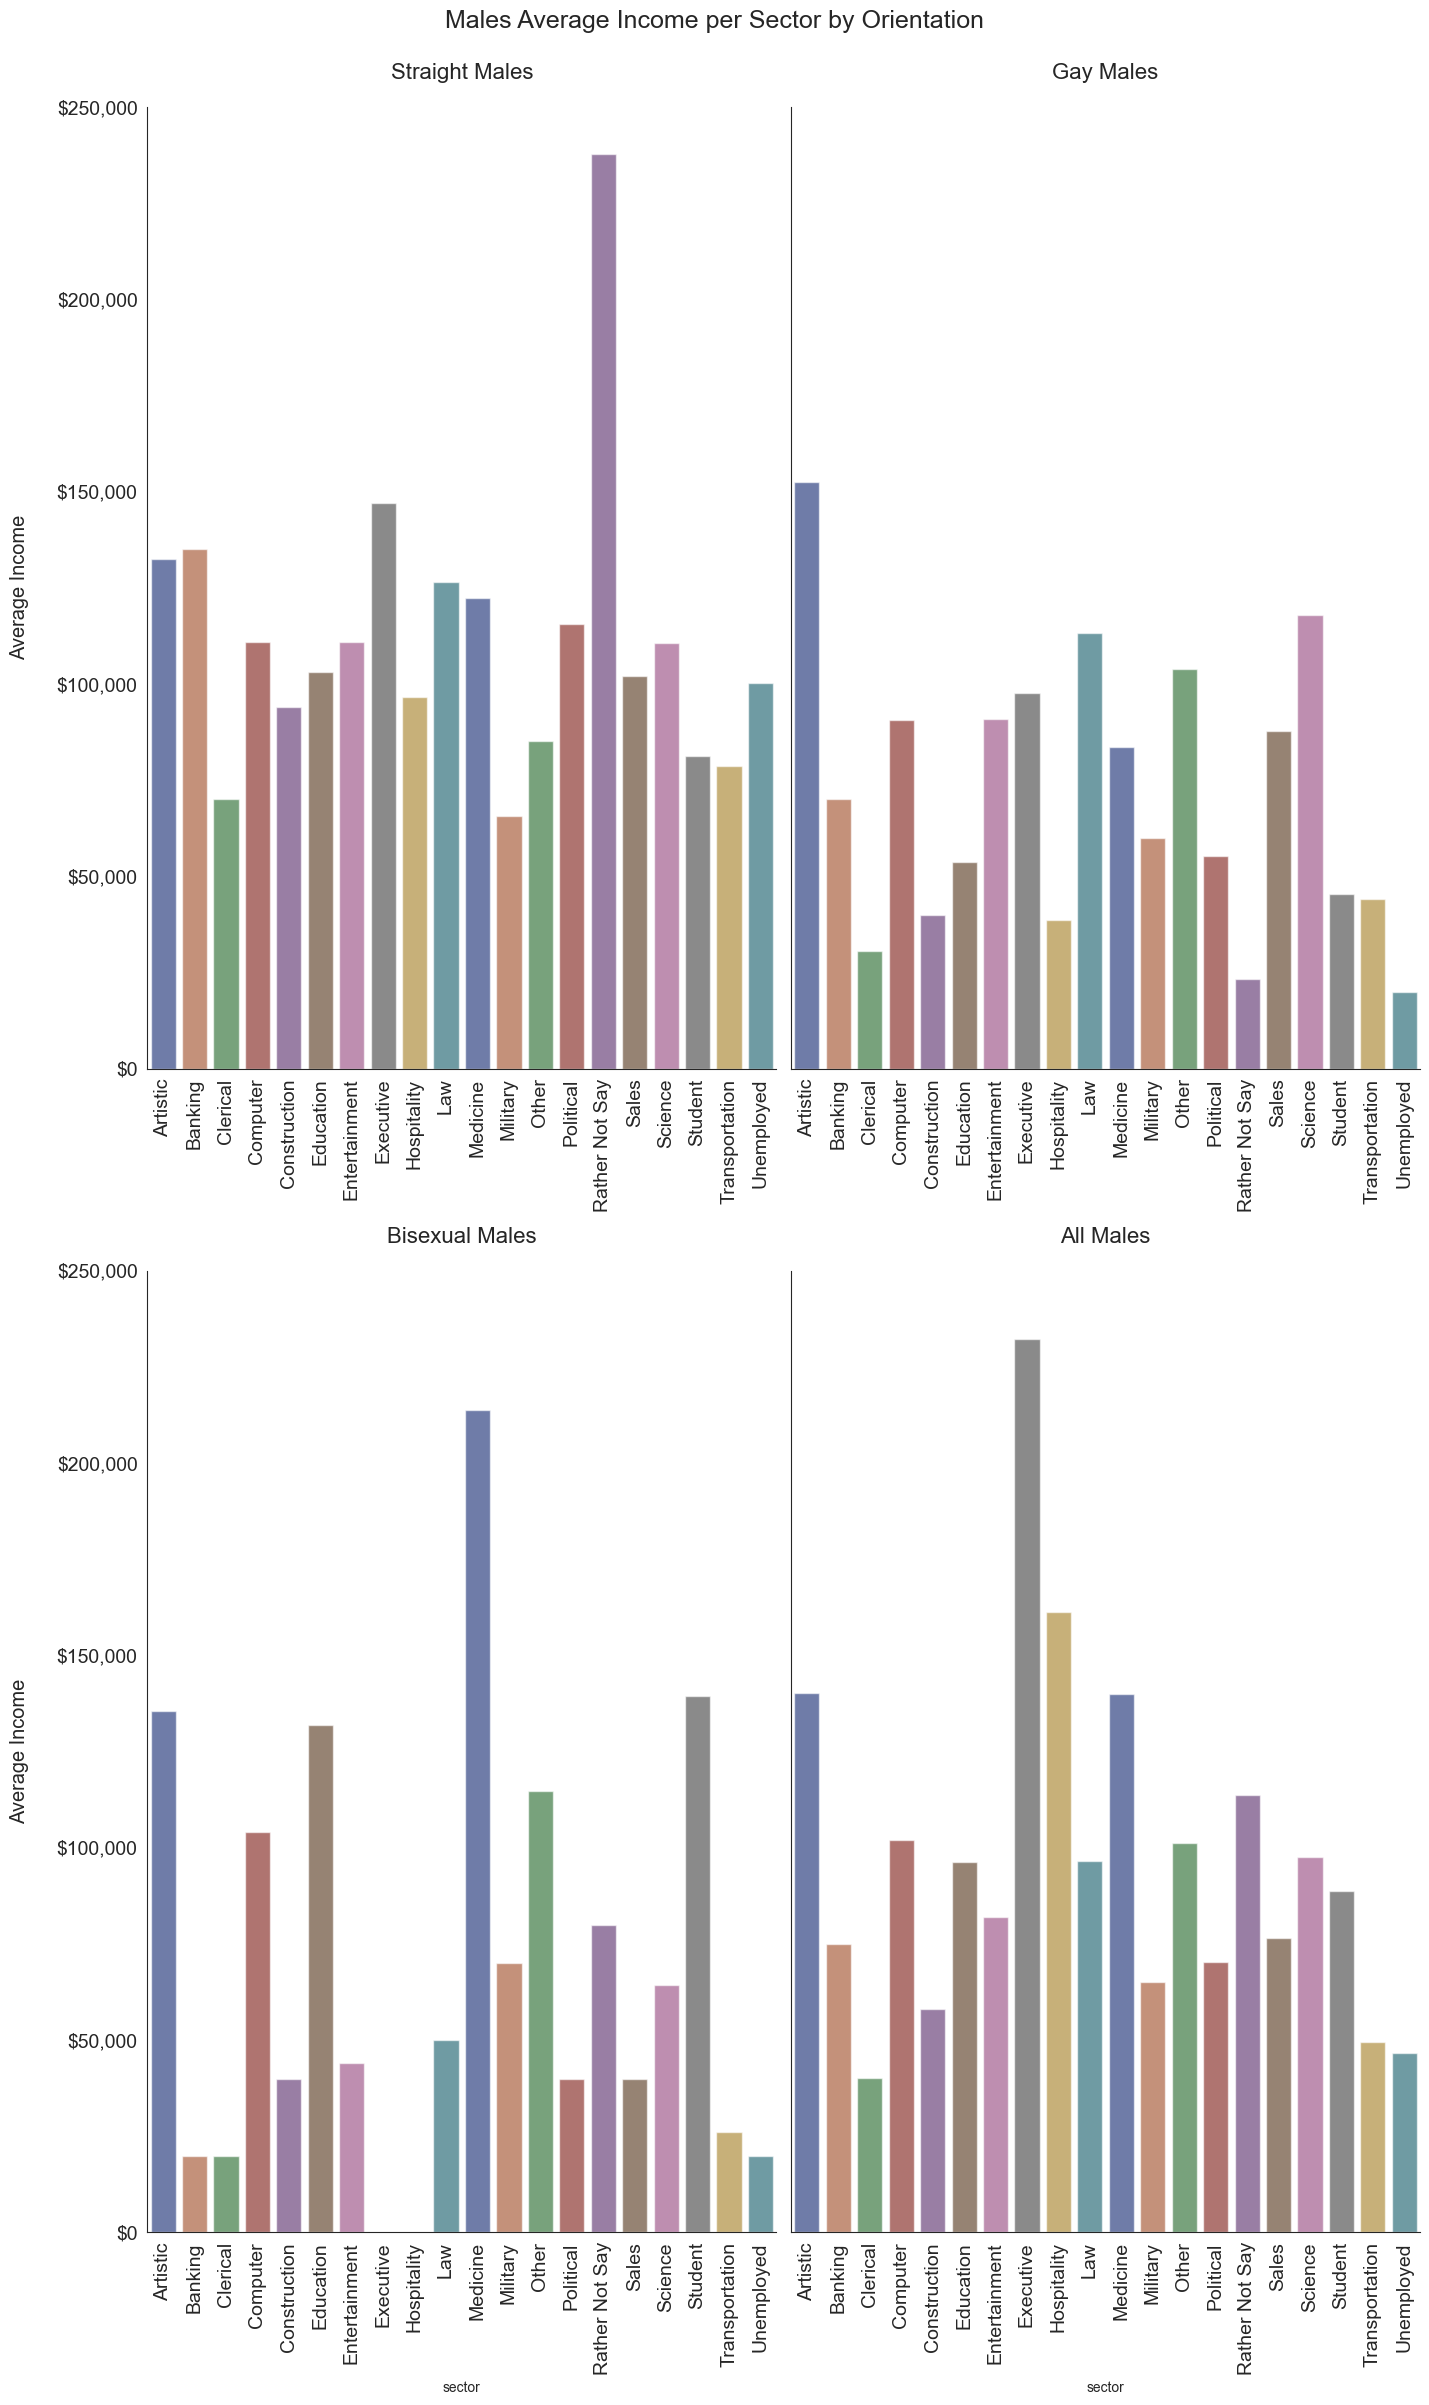

In [33]:
print("Males Average Income per Sector by Orientation")

g = sns.catplot(data=average_salaries_stacked, x="sector", y="value", col="orientation", col_wrap=2, 
                kind="bar", estimator=np.mean, palette='dark', alpha=.6, height=12, aspect=.6)

g.set_xticklabels(['Artistic', 'Banking', 'Clerical', 'Computer', 'Construction',
 'Education', 'Entertainment', 'Executive', 'Hospitality', 'Law',
 'Medicine', 'Military', 'Other', 'Political', 'Rather Not Say', 'Sales',
 'Science', 'Student', 'Transportation', 'Unemployed'], rotation=90, fontsize=14)

g.set_yticklabels(['$0', '$50,000', '$100,000', '$150,000', '$200,000', '$250,000'], rotation=0, fontsize=14)

axes = g.axes.flatten()
axes[0].set_title("Straight Males", fontsize=16, pad=20)
axes[1].set_title("Gay Males" , fontsize=16, pad=20)
axes[2].set_title("Bisexual Males", fontsize=16, pad=20)
axes[3].set_title("All Males", fontsize=16, pad=20)

for ax in g.axes.flat:
    ax.tick_params(labelbottom=True)
    ax.set_ylabel("Average Income", fontsize='x-large', labelpad=20)

plt.suptitle('Males Average Income per Sector by Orientation', size=18, y=1)
plt.subplots_adjust(hspace=5)
g.tight_layout()
plt.show(g)

# I cannot explain the anamolous salaries for the military figures.
# It is possible to earn $120,000 in the military (I checked) as a Defense Analyst.
# However, it represents the high range paid for that position.

# I had to eliminate two $1 million outliers in the military figures,
# so I wquestion the integrity of that data.

## 11) Does income vary with age and orientation? What are the chances we can use logistic regression to identify a male as straight or not based on income?

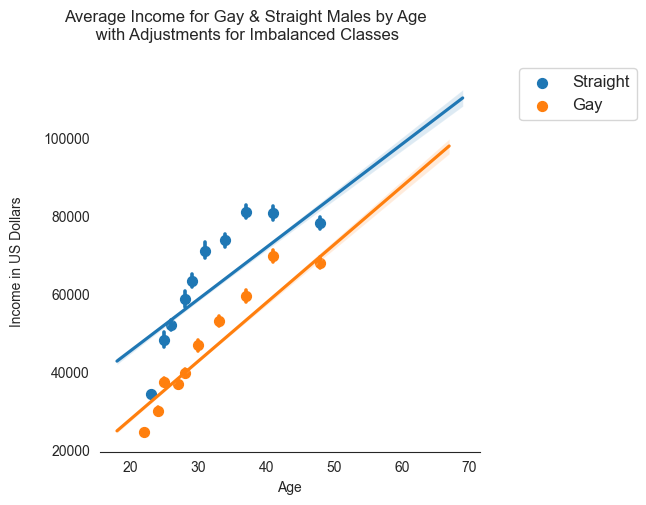

In [34]:
# Comparing trends in male income vs. age by orientation
# Bisexuals removed because of very small sample size and no data points over 40 years old.
# df2 = df.loc[(df['Fee']>=24000) & (df['Discount']< 2000)

male_income_vs_age = df.loc[df['income']>0 & (df['sex']=='m'), ['age', 'income','orientation']].dropna(subset=['age','income', 'orientation'])
male_income_vs_age = df.loc[df['income']<300000, ['age', 'income','orientation']]

# Adjusting for imabalanced classes
straight_income = male_income_vs_age.loc[male_income_vs_age['orientation']=='straight', ['age', 'orientation', 'income']]
straight_income = straight_income.sample(n=25000, replace=True, random_state=1).reset_index(drop=True)
gay_income = male_income_vs_age.loc[male_income_vs_age['orientation']=='gay', ['age', 'orientation', 'income']]
gay_income = gay_income.sample(n=25000, replace=True, random_state=1).reset_index(drop=True)

income_vs_age = pd.concat([straight_income, gay_income])

income_vs_age.orientation = income_vs_age.orientation.str.title()

sns.set_style('white')

g = sns.lmplot(x='age', y='income', hue='orientation', x_bins=10, legend=False, data=income_vs_age)

g.fig.suptitle('Average Income for Gay & Straight Males by Age\n with Adjustments for Imbalanced Classes', size=12, y=1)
g.set_titles(col_template="{col_name}", size=12)
g.set_xlabels('Age')
g.set_ylabels('Income in US Dollars',  labelpad=14)

g.despine(left=True)

g.fig.legend(loc="upper right", bbox_to_anchor=(1.3, .90), fontsize=12)
g.fig.tight_layout()

plt.show(g)

# Though I stress the imbalanced sample make it difficult to draw good conclusions,
# straight males in this sample have a higher y intercept which implies income
# advantages from the start. The confidence surrounding the growth in average
# income for gay males as both populations age implies many exceptions to the
# and a general narrowing of income disparities with age, it seems the 
# majorit of gay males make less than their straight peers over a lifetime.

# I removed bisexuals from this part of the analysis because the sample size
# was too small and because there were bisexuals over 40 years.

# Below, I run the same analysis without excluding females to 
# validate our repudiate these findings. I also imputed
# balanced classes of 25,000 for both gay and straight, but...

# it does not the findings, only reduces the confidence interval.

# (Or the cone of probability)

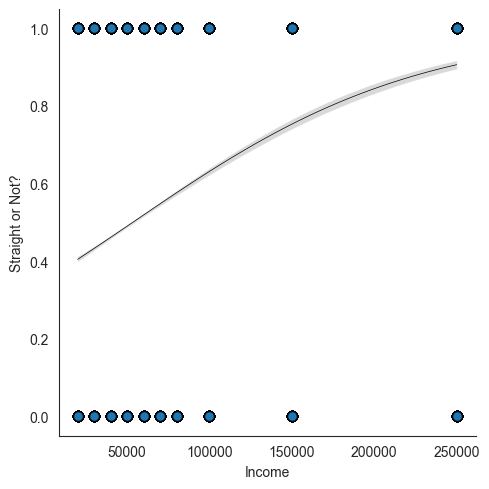

In [35]:
# Binary Logistic Regression in Seaborn
# clf = LogisticRegression(class_weight='balanced')

import statsmodels

# Binary Logistic regression in Seaborn. Straight or not based on income
income_vs_age["straight_binary"] = [(x == 'Straight') for x in income_vs_age.orientation]
income_vs_age.head(10)

# Can I use income to predict whether a male is straight or not?
g = sns.lmplot(x='income', y='straight_binary', data=income_vs_age, logistic=True, n_boot=100, 
           scatter_kws={'s' : 50, 'edgecolor': 'black'}, line_kws={'lw' : .5, 'color' : 'black'})

g.set_titles(col_template="{col_name}", size=14)
g.set_xlabels('Income')
g.set_ylabels('Straight or Not?')

# It appears we have a problem with imbalanced classes (again). Guessing the same
# answer like 'straight' peoduces a "true" response 87%of the time.

# Higher income is more than likely "straight" than "not straight" 
# as already estimated resulting in an upward sloping curve with 
# greater accuracy scores at higher incomes. In other words,
# the higher the income, the more likely the male is straight
# even if we are guess straight every time.

## 12) How do trends in income vs. age change for both genders and all orientations?

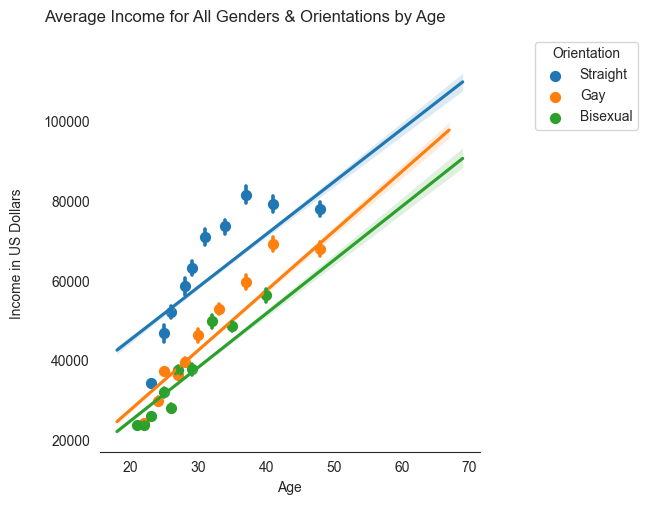

In [36]:
# This second attempt includes both genders, male and female.
# It also includes bisexuals of both genders, excluded from the graph above.
# I took these steps in order to maximize sample size.

all_income_vs_age = df.loc[df['income']>0, ['age', 'sex', 'income','orientation']].dropna(subset=['age','sex','income', 'orientation'])

# limiting income range excludes $1m outliers in field (military) where they do not exist, must be errors
# < 300,000 includes the 99th percentile as already demonstrated.

all_income_vs_age = df.loc[df['income']<300000, ['age', 'sex', 'income','orientation']]

both_genders_straight_income_vs_age = all_income_vs_age.loc[all_income_vs_age['orientation']=='straight', ['age', 'orientation', 'income']]
both_genders_gay_income_vs_age = male_income_vs_age.loc[male_income_vs_age['orientation']=='gay', ['age', 'orientation', 'income']]
both_genders_bisexual_income_vs_age = male_income_vs_age.loc[male_income_vs_age['orientation']=='bisexual', ['age', 'orientation', 'income']]

both_genders_straight_income_vs_age = male_income_vs_age.loc[male_income_vs_age['orientation']=='straight', ['age', 'orientation', 'income']]
both_genders_gay_income_vs_age = male_income_vs_age.loc[male_income_vs_age['orientation']=='gay', ['age', 'orientation', 'income']]
both_genders_bisexual_income_vs_age = male_income_vs_age.loc[male_income_vs_age['orientation']=='bisexual', ['age', 'orientation', 'income']]

# adjusting for imbalanced classes 20,000 for each orientation
straight_income_mf = both_genders_straight_income_vs_age.sample(n=20000, replace=True, random_state=1).reset_index(drop=True)
gay_income_mf = both_genders_gay_income_vs_age.sample(n=20000, replace=True, random_state=1).reset_index(drop=True)
bisexual_income_mf = both_genders_bisexual_income_vs_age.sample(n=20000, replace=True, random_state=1).reset_index(drop=True)

#  with balanced classes
bal_income_vs_ages_mf = pd.concat([straight_income_mf, gay_income_mf , bisexual_income_mf ])
# without balanced  classes
imbal_income_vs_ages_mf = pd.concat([both_genders_straight_income_vs_age, both_genders_gay_income_vs_age , both_genders_bisexual_income_vs_age])

# capitalize legend features
bal_income_vs_ages_mf.orientation = bal_income_vs_ages_mf.orientation.str.title()
imbal_income_vs_ages_mf.orientation = imbal_income_vs_ages_mf.orientation.str.title()

import seaborn as sns

sns.set_style('white')

# with balanced classes
g = sns.lmplot(x='age', y='income', hue='orientation', x_bins=10, legend=False, data=bal_income_vs_ages_mf)

g.fig.suptitle('Average Income for All Genders & Orientations by Age', size=12, y=1)
g.set_titles(col_template="{col_name}", size=14)
g.set_xlabels('Age')
g.set_ylabels('Income in US Dollars',  labelpad=14)

g.despine(left=True)

g.fig.legend(title='Orientation', loc="upper right", bbox_to_anchor=(1.3, .95), fontsize=10)
g.fig.tight_layout()

plt.show(g)

# Overlapping these regression lines helps us to understand
# how gay/bisexual lean closeer to each other with salaries
# for straight males starting out stronger early in their
# careers and elevated above gay/straight males for the
# durations of their careers. Still, it must be noted
# there were too many limitations and issues with the
# dataset to make this observation with confidence.

# These relationships are strictly linear in nature,
# but appear to be better described as poynomial order two.

In [37]:
# There is insufficient incomd data to include in features data

<h4> Conclusion Statement: Sexual Orientation & Income</h4>
<ol>
    <li> Given the limited amount of viable income data, for both genders, those who identify as straight tend to make more money from the start to the end of their careers then their gay/bisexual counterparts, which we can attribute in part to imbalanaced classes. There are a few exceptions, including education and law, where gay men earn higher average salaries than straight males.</li>
    <p></p>
<li> In the generational analysis, I used pd.cut to create bins for the five living generational paradigms shifts (Silent Generation, Baby Boomers, Geneneration X, Millenials and Generation Z) based on their inferred birth years. </li>
    <p></p>
<li> To arrive at birth year, I add the difference from their last online dates and the current year to their to known ages as recorded when last online. </li>
    <p></p>
    
<li> This process gives me the estimated birth year of each male, which allows me to place him in the correct bin for the correct generation, enabling me to divide the sample into the commonly accepted generational shifts listed above. </li>
    <p></p>
    
<li> For example, a male aged 32 when last online in 2012 is now 43 since I know 11 years have passed since he was last online. To keep it simple, 32 + (2023-2012) with 2012 as last year online = 43. At this age, his estimated birth year was 1980 and he was born at the tail end of Generation X.</li>
    <p></p>
    
<li> This algorithim is not a perfect because I do not have enough information to factor in the effect of birth month on age; but it provides a reasonably accurate estimate of the count for each generation.</li>
    <p></p>

<li> In addition, as demonstrated above, this sample represents males heavily concentrated in their twenties and thirties then plunges at the youngest and oldest tails, meaning imbalanced classes again challenges these findings.</li>
    <p></p>
    <ul>
        <li>70% are between 18 and 35 years old.</li>
        <li>50% are between 25 and 35 years old.</li>
        <li>10% are between 40 and 69 years old.</li>
    </ul>
    <p></p>
<li> The youth of our sample may be why the average salaries are lowers than expected. In the final step, I create grouped barcharts by sexual orientation (x axis) and generational status (hue) that reveal what percentage of the male population identified as straight, gay and bisexual for each generational stage (y axis).</li>
    <p></p>
    
<li> This process yields some interesting insights into how historical events and growing trends in acceptance have affected the percentage of males willing to identify as "not straight."</li>
    <p></p>

<li> In particular, I found a 11% drop (from 92% to 81%) in males who idenitfy as other than straight, which seems to reflect trends in social acceptance. <a href="https://www.nbcnews.com/feature/nbc-out/nearly-1-5-young-adults-say-they-re-not-straight-n1270003">Other widely reported studies found 20% of Generation Z does not identify as LGBT. </a> 
    </li>
    <p></p>
<li> As my analysis previously revealed, sexual orientation is largely a fixed trait for the vast majority of males over their lifespans, with some wiggle room depending on circumstancial variables.</li>
    <p></p>
    <li> Despite these trends, we see only minor fluctuations when plotted over age, and a plateau in the generation hardest hit by the AIDS epidemic, which means either there were fewer gay males alive to report, or there were a large number of gay males who refused to acknowledge it.</li>
       <p></p>
        <li> But it also seems the epidemic ultimately accelerated trends in acceptance after a brief slowdown in the eighties to early nineties.</li>
    <p></p>
</ol>

## 14) What are the differences in academic achievement by male orientation?

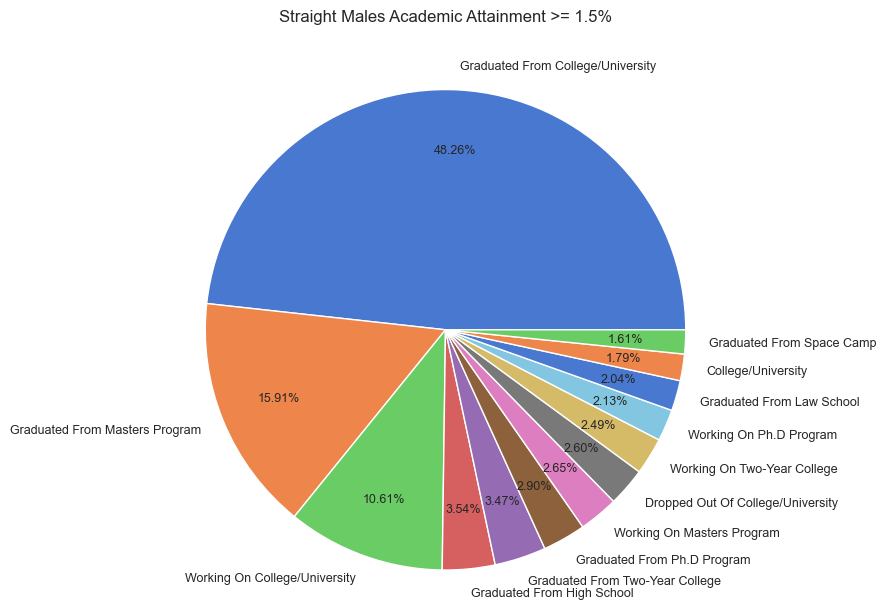

In [38]:
# Academic achievements for straight males

plt.title("Straight Males Academic Attainment >= 1.5%", y=1.1, fontsize = 12)
straight_male_data = df.query("sex  == 'm' & orientation == 'straight'")
straight_male_data.dropna(subset=['orientation', 'education'], axis=0, inplace=True)
straight_male_data = straight_male_data[['orientation', 'education']]
straight_edu_df = straight_male_data['education'].value_counts().to_frame()
straight_edu_df.reset_index(inplace=True)
straight_edu_df.columns = ['education','counts']
threshold = float(1.49)
straight_labels = [val.title() for val in straight_edu_df.education]
straight_counts = [float(val) for val in straight_edu_df.counts]
straight_den = straight_edu_df.counts.sum()
straight_den = float(straight_den)
straight_fractions = list(straight_count/straight_den for straight_count in straight_counts)
straight_values = [round(fraction*100, 2) for fraction in straight_fractions]
straight_pie_data = {straight_labels[i]: straight_values[i] for i in range(len(straight_labels)) if straight_values[i] > threshold}

# define Seaborn color palette to use
palette_color = sns.color_palette('muted')

straight_pie_labels = list(straight_pie_data.keys())
straight_pie_values = list(straight_pie_data.values())

# plotting data on chart
plt.pie(straight_pie_values, labels=straight_pie_labels, colors=palette_color, pctdistance=.75, autopct='%2.2f%%', radius=1.2, textprops={'fontsize': 9})

# displaying chart
plt.show()

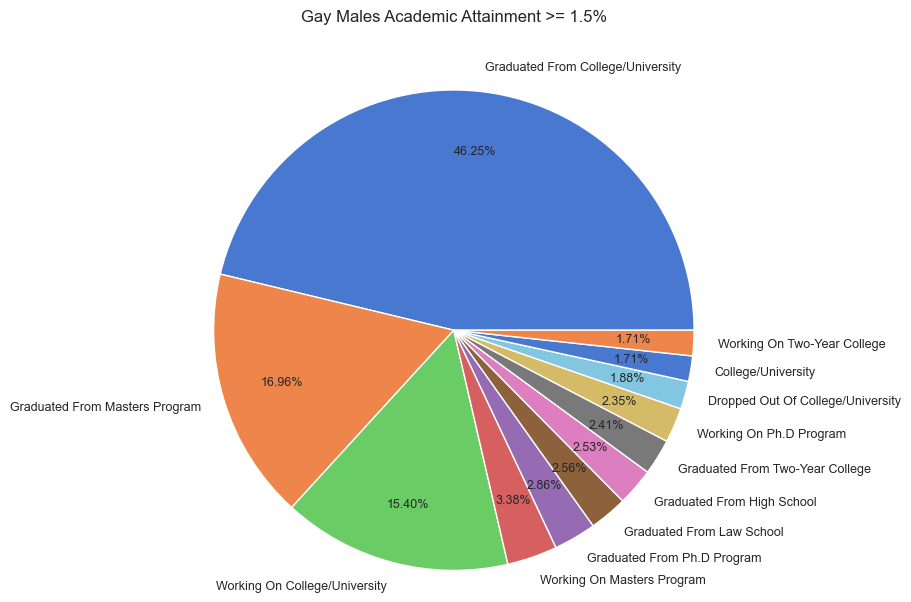

In [39]:
# Academic achievements for gay males

plt.title('Gay Males Academic Attainment >= 1.5%', y=1.1, fontsize = 12)
gay_male_data = df.query("sex  == 'm' & orientation == 'gay'")

gay_male_data.dropna(subset=['orientation', 'education'], axis=0, inplace=True)
gay_male_data = gay_male_data[['orientation', 'education']]
gay_edu_df = gay_male_data['education'].value_counts().to_frame()

gay_edu_df.reset_index(inplace=True)
gay_edu_df.columns = ['education','counts']
threshold = float(1.49)
gay_labels = [val.title() for val in gay_edu_df.education]

gay_counts = [float(val) for val in gay_edu_df.counts]
gay_den = gay_edu_df.counts.sum()
gay_den = float(gay_den)
gay_fractions = list(gay_count/gay_den for gay_count in gay_counts)
gay_values = [round(fraction*100, 2) for fraction in gay_fractions]
gay_pie_data = {gay_labels[i]: gay_values[i] for i in range(len(gay_labels)) if gay_values[i] > threshold}

# define Seaborn color palette to use
palette_color = sns.color_palette('muted')

gay_pie_labels = list(gay_pie_data.keys())
gay_pie_values = list(gay_pie_data.values())

# plotting data on chart
plt.pie(gay_pie_values, labels=gay_pie_labels, colors=palette_color, pctdistance=.75, autopct='%2.2f%%', radius=1.2, textprops={'fontsize': 9})

# displaying chart
plt.show()

# gay male academic achievements in categories representing > .99% of the sample


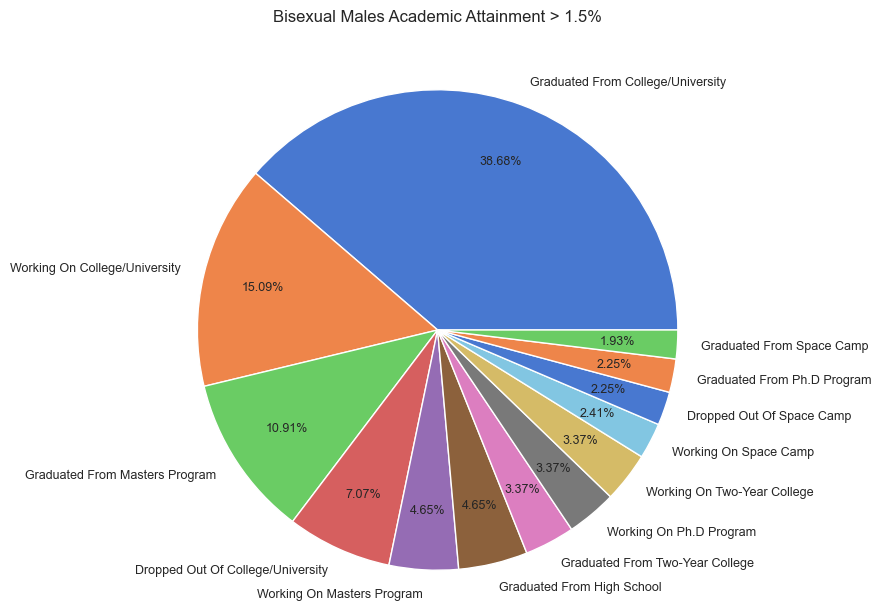

In [40]:
# Academic achievements for bisexual males

plt.title('Bisexual Males Academic Attainment > 1.5%', y=1.1, fontsize = 12)
bisexual_male_data = df.query("sex  == 'm' & orientation == 'bisexual'")

bisexual_male_data.dropna(subset=['orientation', 'education'], axis=0, inplace=True)
bisexual_male_data = bisexual_male_data[['orientation', 'education']]
bisexual_edu_df = bisexual_male_data['education'].value_counts().to_frame()
bisexual_edu_df.reset_index(inplace=True)
bisexual_edu_df.columns = ['education','counts']
threshold = float(1.49)
bisexual_labels = [val.title() for val in bisexual_edu_df.education]
bisexual_counts = [float(val) for val in bisexual_edu_df.counts]
bisexual_den = bisexual_edu_df.counts.sum()
bisexual_den = float(bisexual_den)
bisexual_fractions = list(bisexual_count/bisexual_den for bisexual_count in bisexual_counts)
bisexual_values = [round(fraction*100, 2) for fraction in bisexual_fractions]
bisexual_pie_data = {bisexual_labels[i]: bisexual_values[i] for i in range(len(bisexual_labels)) if bisexual_values[i] > threshold}

# define Seaborn color palette to use
palette_color = sns.color_palette('muted')

bisexual_pie_labels = list(bisexual_pie_data.keys())
bisexual_pie_values = list(bisexual_pie_data.values())

# plotting data on chart
plt.pie(bisexual_pie_values, labels=bisexual_pie_labels, colors=palette_color, pctdistance=.75, autopct='%2.2f%%', radius=1.2, textprops={'fontsize': 9})

# displaying chart
plt.show()

# bisexual male academic achievements in categories representing .99% of the sample


In [41]:
edu_all_males = pd.concat([straight_male_data, gay_male_data, bisexual_male_data], axis=0)
edu_list = edu_all_males.education.unique()
# print(edu_list)
# edu_all_males.fillna('unknown')
# edu = edu_all_males.groupby('orientation').education.value_counts()
# print(edu)

# worded so that it cannot be accurately ordered

# 8) add column to features_data dataframe
education = pd.Series(pd.Categorical(edu_all_males.education, ordered=False), name='education')
features_data['education'] = education.dropna()
print(len(features_data.education))
features_data.head(3)

25078


,city,orientation,ethnicity,religion,sentiment,sector,education
3,alameda,bisexual,white,catholicism,and laughing about it,unknown,dropped out of two-year college
4,alameda,bisexual,white,christianity,and laughing about it,artistic,graduated from law school
5,alameda,bisexual,white,catholicism,but not too serious about it,education,graduated from ph.d program


<h4> Summary: Male Orientation & Educational Attainment</h4>
<ul>
<li> I found some statistical differences in academic attainment, with straight and gay males having the similiar profiles.</li>
    <p></p>
<li> 46.25% of gay males and 48.26% of straight males have undergraduate degrees, compared to 38.65% of bisexual males.</li> 
    <p></p>
<li> 10.91% of bisexual males, 16.96% of gay males and 15.91% of straight males have completed Master's degrees.</li>
    <p></p>
<li> 2.25% of bisexuals, 2.86% of gay males and 2.9% of straight males have earned doctorates.</li>
    <p></p>
<li> 3.47% of straight males, 2.41% of gay males and 3.37% of bisexual males have completed two-year degrees.</li>
    <p></p>
<li> Dropout rates are highest in bisexual males at 7.07% but only 1.88% for gay males, and 2.6% for striaght males.</li>
    <p></p>
<li> 3.35% bisexuals are working on a doctorate degree with 2.35% of gay males and 2.13% of straight males.</li>
    <p></p>
<li> 15.09% bisexuals working on college degrees compared to 16.96% of gay males and 10.61% fo straight males.</li>
</ul>

## 15) Is there a connection between Zodiac sign and male orientation?

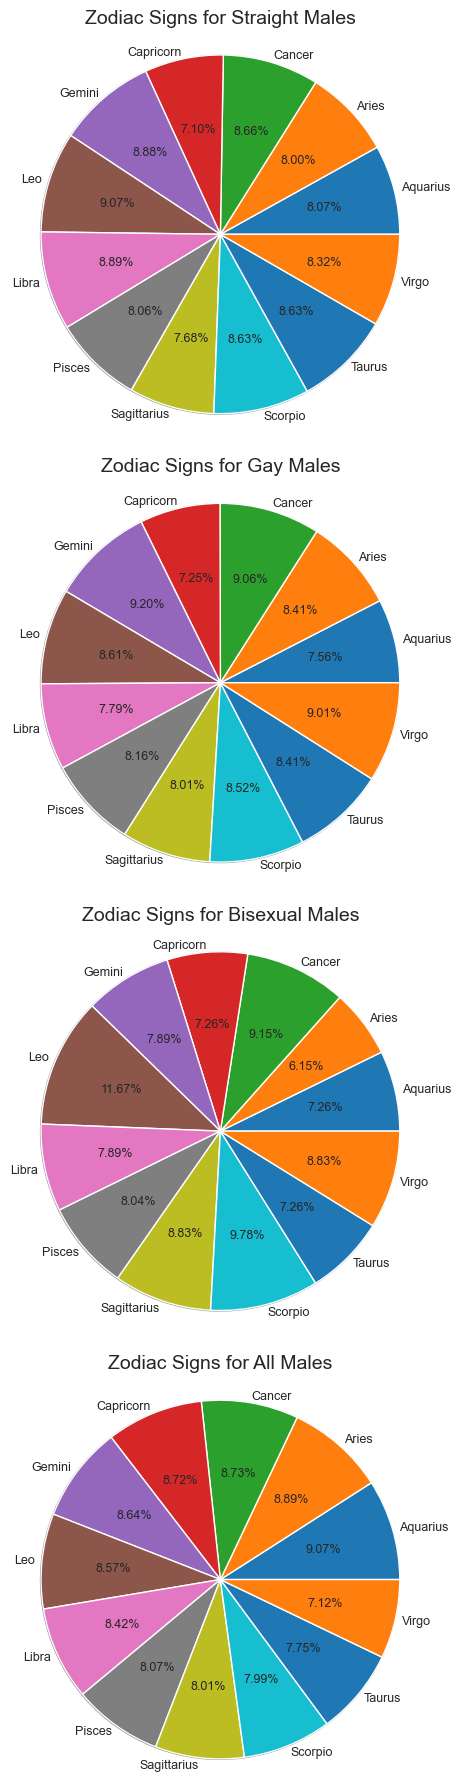

In [42]:
male_sign = data.query("sex == 'm'")

male_sign['zodiac'] = data.sign.str.split().str.get(0)

# insert zodiac into dataframe with each run
# data.insert(loc=6, column='zodiac', value=male_sign['zodiac'])

x_list = ["straight", "gay", "bisexual", "all"]
labels = ['Aquarius', 'Aries', 'Cancer', 'Capricorn', 'Gemini', 'Leo', 'Libra', 'Pisces', 'Sagittarius', 'Scorpio', 'Taurus', 'Virgo']

sns.set_style("white")

fig, ax = plt.subplots(figsize = (18, 18), nrows=4, ncols=1)
plt.subplots_adjust(hspace=10)

for i in range(len(x_list)):
    plt.rc('font', size=12)
    plt.rc('axes', titlesize=14)
    plt.rc('axes', labelsize=12)
    ax[i].set_title("Zodiac Signs for " + x_list[i].title() + " Males", y=5, pad=20)
    sign_data = male_sign.groupby('zodiac').orientation.apply(lambda x: (x == x_list[i]).sum()).reset_index(name='count')
    if x_list[i] != 'all':
        ax[i].pie(sign_data['count'], labels=labels, labeldistance=1.04, center=(0,0), normalize=True, autopct='%2.2f%%', shadow=True, radius=11, textprops={'fontsize': 9})
    elif x_list[i] == 'all':
        ax[i].set_title("Zodiac Signs for All Males", y=5, pad=20)
        sign_data = male_sign['zodiac'].value_counts()
        male_sign = np.array(sign_data)
        ax[i].pie(male_sign, labels=labels, labeldistance=1.04, center=(0,0), normalize=True, autopct='%2.2f%%', shadow=True, radius=11, textprops={'fontsize': 9})
            
plt.show()

In [43]:
# 9) add column to features_data dataframe
sign_data = data.sign.str.split().str.get(0)
zodiac = pd.Series(pd.Categorical(sign_data, ordered=False), name='zodiac').dropna()
features_data['zodiac'] = zodiac
print(len(features_data.zodiac))
features_data.head(3)

25078


,city,orientation,ethnicity,religion,sentiment,sector,education,zodiac
3,alameda,bisexual,white,catholicism,and laughing about it,unknown,dropped out of two-year college,NaN
4,alameda,bisexual,white,christianity,and laughing about it,artistic,graduated from law school,taurus
5,alameda,bisexual,white,catholicism,but not too serious about it,education,graduated from ph.d program,aquarius


<h4>There were absolutely no relevant statistical differences in Zodiac signs for males by orientation, beyond an anomolous inrease in the number of bisexual Leos, probably another fluke of imbalanced classes and the especially small bisexual population.</h4>

## 16) Are there relevant differences in heights by male orientation?

In [44]:
# Are there significant differences in height by orientations in males?
# No. We find ZERO relevant differences in average height for any 
# orientation versus combined orientations. All males average approximately  in height.
# Demonstrates use of combining get_group and agg functions.

print(bold+ "Mean & Median Heights: Males by Orientation" +end)
print()
all_males = data.query("sex == 'm'")
straight_males = all_males.query("orientation == 'straight'")
gay_males = all_males.query("orientation == 'gay'")
bisexual_males = all_males.query("orientation == 'bisexual'")

print(bold+ "Mean & Median Heights: All Males" +end)
all_male_heights = all_males['height'].agg(['mean', 'median'])
print(round(all_male_heights, 4))
print()
print(bold+ "Mean & Median Heights: Straight Males" +end)
straight_male_heights = straight_males['height'].agg(['mean', 'median'])
print(round(straight_male_heights, 4))
print()
print(bold+ "Mean & Median Heights: Gay Males" +end)
gay_male_heights = gay_males['height'].agg(['mean', 'median'])
print(round(gay_male_heights, 4))
print()
print(bold+ "Mean & Median Heights: Bisexual Males" +end)
bisexual_male_heights = bisexual_males['height'].agg(['mean', 'median'])
print(round(bisexual_male_heights, 4))

# No need to waste memory plotting this one.

Mean & Median Heights: Males by Orientation

Mean & Median Heights: All Males
mean      70.4428
median    70.0000
Name: height, dtype: float64

Mean & Median Heights: Straight Males
mean      70.4984
median    70.0000
Name: height, dtype: float64

Mean & Median Heights: Gay Males
mean      70.058
median    70.000
Name: height, dtype: float64

Mean & Median Heights: Bisexual Males
mean      70.192
median    70.000
Name: height, dtype: float64


## 17) Is there a difference in essay content or length by male orientation?

  orientation     averages
0    bisexual  3483.049287
1         gay  2158.688331
2    straight  2169.747674
Index(['orientation', 'averages'], dtype='object')
<class 'pandas.core.frame.DataFrame'>


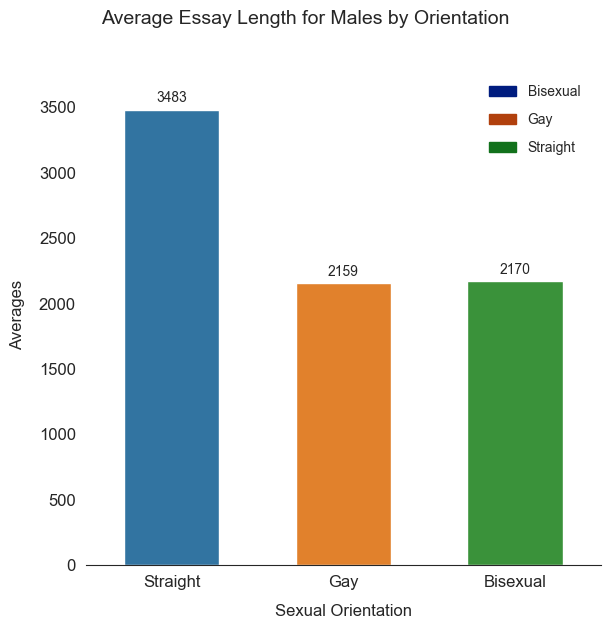

In [45]:
all_data = data.query("sex == 'm'")

gay_data = all_data.query("orientation == 'gay'")

straight_data = all_data.query("orientation == 'straight'")

bisexual_data = all_data.query("orientation == 'bisexual'")

essay_cols = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]

all_essays = all_data[essay_cols].replace(np.nan, '', regex=True)
all_essays = all_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)
all_data["essay_len"] = all_essays.apply(lambda x: len(x))
all_essay_length = all_data["essay_len"]

gay_essays = gay_data[essay_cols].replace(np.nan, '', regex=True)
gay_essays = gay_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)
gay_data["essay_len"] = all_essays.apply(lambda x: len(x))
gay_essay_length = gay_data["essay_len"]

straight_essays = straight_data[essay_cols].replace(np.nan, '', regex=True)
straight_essays = straight_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)
straight_data["essay_len"] = straight_essays.apply(lambda x: len(x))
straight_essay_length = straight_data["essay_len"]

bisexual_essays = bisexual_data[essay_cols].replace(np.nan, '', regex=True)
bisexual_essays = bisexual_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)
bisexual_data["essay_len"] = bisexual_essays.apply(lambda x: len(x))
bisexual_essay_length = bisexual_data["essay_len"]
  
# Find Lengths of combined essays

all_data['lengths'] = all_essays.apply(lambda x: len(x))
lengths = all_data['lengths']

# Merge into single dataframe

orientation_lens = pd.merge(data['orientation'], lengths, how='left', left_index=True, right_index=True)

# Drop the Nas from the dataframe

orientation_chart = orientation_lens.dropna(axis=0, how='any')

# Cumulative Values for each orientation

chart = orientation_chart.groupby(by='orientation')['lengths'].mean()
chart = pd.DataFrame(chart)
chart = chart.reset_index()
chart.columns = ['orientation', 'averages']
print(chart)
print(chart.columns)
print(type(chart))

sns.set_style('white', rc={'figure.dpi': 300, 'figure.figsize': (10, 9.25)})
g = sns.catplot(data=chart, x='orientation', y='averages', kind='bar', height=6.27, width=6.27/11.27)

# '#001c7f', '#b1400d', '#12711c',
# inserting legend

bisexual_blue = mpatches.Patch(color='#001c7f', label='Bisexual')
gay_orange = mpatches.Patch(color='#b1400d', label='Gay')
straight_green = mpatches.Patch(color='#12711c', label='Straight')

plt.legend(handles=[bisexual_blue, gay_orange, straight_green], frameon=False, loc='upper right', bbox_to_anchor=(1,1), fontsize=10, handlelength=2, borderpad=1, labelspacing=1)

g.fig.suptitle('Average Essay Length for Males by Orientation', size=14, y=1)
g.set_titles(col_template="{col_name}", size=14)
g.set_xlabels('Sexual Orientation', labelpad=10)
g.set_ylabels('Averages', labelpad=10)

g.despine(left=True)

g.fig.tight_layout()

# iterate through axes
for ax in g.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        labels = ["{}".format(round(v.get_height())) for v in c]
        ax.bar_label(c, labels=labels, label_type='edge', padding=3, fontsize=10)
        ax.set_xticklabels(['Straight', 'Gay', 'Bisexual'], rotation=0, fontsize=12)
        ax.tick_params(labelbottom=True, labelsize=12)
        ax.margins(y=0.1)

plt.show(g)

<h4> Conclusion Statement: Essays and Essay Length</h4>
    <p></p>
    <p></p>  
<h4> I spent hours looking for patterns in words common or distinctive to straight, gay and bisexual male essays using collections Counter and most_common function, as well as NLTK stopwords and punctuation exclusion. I found that all men, regardless of orientation, had nothing profound to say in these essays, nothing above and beyond cocktail-party chatter</h4> 
     <p></p> 
    <h4> I searched and counted words like under "love", "marriage", "divorce", "breakup" and other words that seemed relevant, but I found nothing of value. I employed commonly used Natural Langugage Processing techniques (NLTK) including filtering out stopwords and punctuations. My impressed is all males are "pitching themselves," not revealing truly personal information.</h4>
    <p></p>
    <p></p>    
    <b>The only distinction was a significant increase in the average number of words contained in essays written by bisexual males. However, I consider this finding an anomoly, and a product of the small sample size for bissexual males. As a result, I do not use the essays in my regression/classification models below.<b>
    <p></p>
    <p></p>  
    The answer is yes, there's a diffference in average essay length for bisexual males.
    <p></p>
<h4> But it does not appear to be a meaningful difference.</h4>

## 18) What are the distinguishing factors in dietary preference by male orientation?

orientation  diet_pref 
bisexual     anything        232
             vegetarian       85
             other            36
             vegan            24
             halal             2
             kosher            2
gay          anything       1243
             vegetarian      212
             other            59
             vegan            46
             halal             4
             kosher            4
straight     anything      12384
             vegetarian     1639
             other           759
             vegan           208
             kosher           57
             halal            46
Name: count, dtype: int64


Text(0.5, 0.98, '')

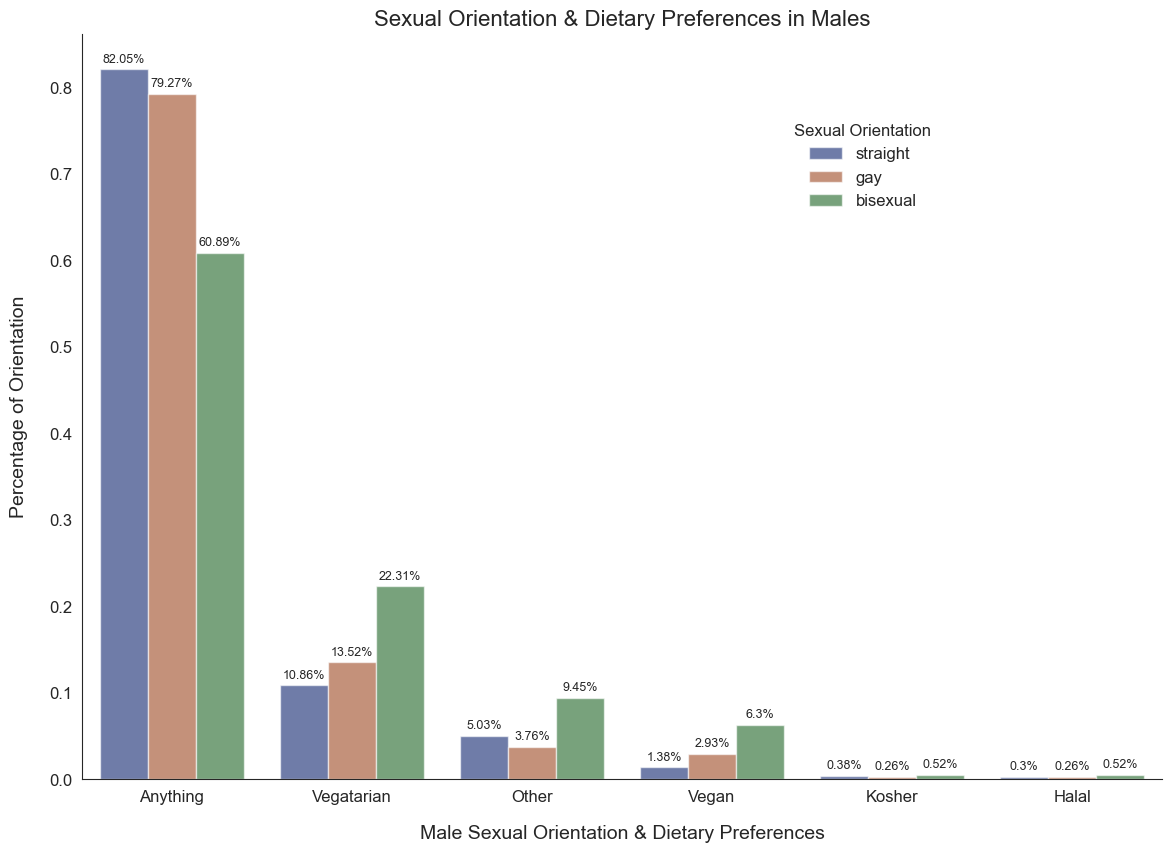

In [46]:
# Male Orientation and Dietary Preferences.

# In order to structure the data as desired, with the percentage as the 
# percentage of that orientation for that particular dietary preference,
# I had to run value counts on each orientation separately.

# Then, I could concat them into a entirely new dataframe.
 
males_diet = data.loc[data['sex']=='m', ['diet', 'orientation']].dropna()
males_diet['diet_pref'] = males_diet['diet'].str.split().str.get(1)
print(males_diet.groupby('orientation').diet_pref.value_counts())

straight_males_diet = males_diet.query("orientation == 'straight'")
gay_males_diet = males_diet.query("orientation == 'gay'")
bisexual_males_diet = males_diet.query("orientation == 'bisexual'")

straight_males_diet = straight_males_diet.diet_pref.value_counts(normalize=True)
gay_males_diet = gay_males_diet.diet_pref.value_counts(normalize=True)
bisexual_males_diet = bisexual_males_diet.diet_pref.value_counts(normalize=True)

straight_males_diet = pd.DataFrame(straight_males_diet).reset_index()
gay_males_diet = pd.DataFrame(gay_males_diet).reset_index()
bisexual_males_diet = pd.DataFrame(bisexual_males_diet).reset_index()

straight_males_diet['orientation']='straight'
gay_males_diet['orientation'] = 'gay'
bisexual_males_diet['orientation'] = 'bisexual'

straight_males_diet = straight_males_diet.iloc[:,[2,0,1]]
gay_males_diet = gay_males_diet.iloc[:,[2,0,1]]
bisexual_males_diet = bisexual_males_diet.iloc[:,[2,0,1]]

males_diet_df = pd.concat([straight_males_diet, gay_males_diet, bisexual_males_diet], axis=0)
males_diet_df.reset_index(drop=True, inplace=True)
males_diet_df.columns = ['orientation', 'diet_pref', 'percentages']

# capitalize title case for values in legend.
males_diet.orientation = males_diet.orientation.str.title()
# Draw a nested barplot by species and sex

sns.set_style('white', rc={'figure.dpi': 300, 'figure.figsize': (10, 9.25)})

g = sns.catplot(
    data=males_diet_df, kind="bar", x="diet_pref", y="percentages", hue="orientation",
    estimator=np.mean, palette="dark", legend=None, alpha=.6, height=8.27, aspect=11.7/8.27)

g.set_axis_labels('Male Sexual Orientation & Dietary Preferences', 'Percentage of Orientation', fontsize=14, labelpad=15)
g.set_xticklabels(["Anything", "Vegatarian", "Other", "Vegan", "Kosher", "Halal"])

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# Make list of lables from bar heights
rects = ax.patches
labels = [f"label{i}" for i in range(len(rects))]

# iterate through the axes containers

for c in ax.containers:
    labels = ["{}%".format(round(v.get_height()*100, 2)) for v in c]
    ax.bar_label(c, labels=labels, label_type='edge', padding=3, fontsize=9)

plt.legend(title='Sexual Orientation', frameon=False, title_fontsize='medium', bbox_to_anchor=(.8,.9), loc='upper right', ncols=1, prop = {"size": 12})
plt.title('Sexual Orientation & Dietary Preferences in Males', fontsize=16)
plt.suptitle("", fontsize=16)

In [47]:
# 9) Dietary preference excluded from feature data.

<h4> Summary Findings: Male Dietary Preferences by Orientation </h4>
<p></p>
<p> I find gay and straight males, for the most part, align on this issue, with bissexuals as the divergent group. There's less than a three-point difference in the percentage of straight and gay men who eat 'anything' (82.05% - 79.27%)</p>
<p></p>
<p> I see about the same 2-3% difference in the percentage of straight and gay males who identify as "vagetarians" (10.86% - 13.52%) with a spike in bissexual vegetarians (22.31%).</p>
<p></p>
<p> Again, there's a slim margin that separates gay and straight mean who identify as vegans (1.38% - 2.93%), with another relative spike  in the percentage of bisexual males who identify as vegans (6.3%).
<p></p>
<p> Otherwise, the percentage of all males - averages .36% -.39% respectively - who identified as either Kosher or Halal are too low to have any statistical relevance given the project's goals.

In [48]:
# Examining differences in relationship status
# Dataset for gender
gender_group = data.groupby(['sex'])

# Subset for male data
males_info = gender_group.get_group('m')

# Parse data as needed
males_status = males_info[['orientation','status']].dropna(subset=['orientation','status'])

straight_males_status = males_status.query("orientation == 'straight'")
gay_males_status = males_status.query("orientation == 'gay'")
bisexual_males_status = males_status.query("orientation == 'bisexual'")

straight_males_status = straight_males_status.status.value_counts(normalize=True)
gay_males_status = gay_males_status.status.value_counts(normalize=True)
bisexual_males_status = bisexual_males_status.status.value_counts(normalize=True)

straight_males_status = pd.DataFrame(straight_males_status).reset_index()
gay_males_status = pd.DataFrame(gay_males_status).reset_index()
bisexual_males_status = pd.DataFrame(bisexual_males_status).reset_index()

straight_males_status['orientation']='straight'
gay_males_status['orientation'] = 'gay'
bisexual_males_status['orientation'] = 'bisexual'

straight_males_status = straight_males_status.iloc[:,[2,0,1]]
gay_males_status = gay_males_status.iloc[:,[2,0,1]]
bisexual_males_status = bisexual_males_status.iloc[:,[2,0,1]]

males_status_df = pd.concat([straight_males_status, gay_males_status, bisexual_males_status])
males_status_df.reset_index(drop=True, inplace=True)
males_status_df.columns = ['orientation', 'status', 'percentages']

# convert values to title case for charts
males_status_df.orientation = males_status_df.orientation.str.title()

Text(0.5, 0.98, '')

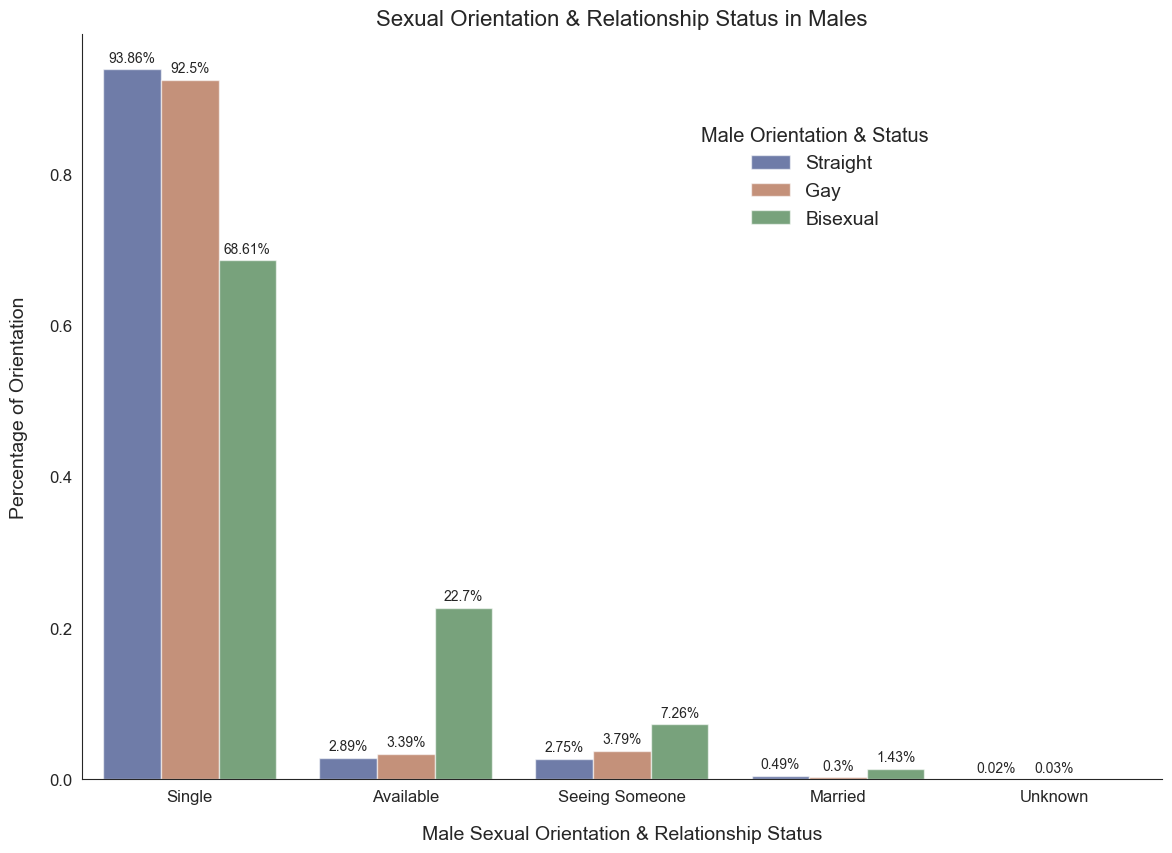

In [49]:
# Draw a nested barplot by species and sex

g = sns.catplot(
    data=males_status_df, kind="bar", x="status", y="percentages", hue="orientation",
    palette="dark", legend=None, alpha=.6, height=8.27, aspect=11.7/8.27)

g.set_axis_labels('Male Sexual Orientation & Relationship Status', 'Percentage of Orientation', fontsize=14, labelpad=15)
g.set_xticklabels(["Single","Available", "Seeing Someone", "Married", "Unknown"])

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# Make list of lables from bar heights
rects = ax.patches
labels = [f"label{i}" for i in range(len(rects))]

# iterate through the axes containers
for c in ax.containers:
    labels = ["{}%".format(round(v.get_height()*100, 2)) for v in c]
    ax.bar_label(c, labels=labels, label_type='edge', padding=3, fontsize=10)

plt.legend(title='Male Orientation & Status', frameon=False, title_fontsize='large', 
           bbox_to_anchor=(.8,.9), loc='upper right', ncols=1, prop = {"size": 14})
plt.title('Sexual Orientation & Relationship Status in Males', fontsize=16)
plt.suptitle("", fontsize=16)

In [50]:
# 9) add column to features_data dataframe
status = pd.Series(pd.Categorical(males_status.status, ordered=False), name='zodiac').dropna()
features_data['status'] = status
features_data.status.fillna('unknown')
print(len(features_data.status))
features_data.head(3)

25078


,city,orientation,ethnicity,religion,sentiment,sector,education,zodiac,status
3,alameda,bisexual,white,catholicism,and laughing about it,unknown,dropped out of two-year college,NaN,single
4,alameda,bisexual,white,christianity,and laughing about it,artistic,graduated from law school,taurus,single
5,alameda,bisexual,white,catholicism,but not too serious about it,education,graduated from ph.d program,aquarius,single


<h5> Relationship Status in All Males by Orientation </h5>
<p></p>
<p> I see a very similar pattern in how males of all orientations report on relationship status:</p>
<p></p>
<ol>
<li> Straight and gay males are within one percentage point of identifying as single, no big surprise on a datiung site, with a thirty-point gap (68.61%) in bisexual males who consider themselves "single".</li>
<p></p>
<li>A low but comparable percentage of gay/straight males (2.89% - 3.39%) are "available", compared to a much higher percentage at 22.7%  of bisexuals</li>
<p></p>
<li>For those "seeing someone", gay and straight males are slightly more than one percentage point apart, versus 7.26% of bisexual males</p>
<p></p>
<li>The reporting in the unknown categories are too low to have significance.</p>

## 19) Is there a relationship between body type and male orientation?

<class 'pandas.core.series.Series'>
['fit' 'average' 'skinny' 'overweight' 'athletic' 'a little extra' 'thin'
 'no response' 'jacked' 'full figured' 'used up' 'rather not say' 'curvy']


Male Body Image by Sexual Orientation

   orientation       body_type    values
0     straight  a little extra  0.052342
1     straight        athletic  0.300357
2     straight         average  0.268016
3     straight           curvy  0.002600
4     straight             fit  0.250477
5     straight    full figured  0.003432
6     straight          jacked  0.009290
7     straight      overweight  0.008492
8     straight  rather not say  0.002842
9     straight          skinny  0.032064
10    straight            thin  0.062151
11    straight         used up  0.007938
0          gay  a little extra  0.065676
1          gay        athletic  0.195135
2          gay         average  0.300000
3          gay           curvy  0.008378
4          gay             fit  0.244054
5          gay    full figured  0.00

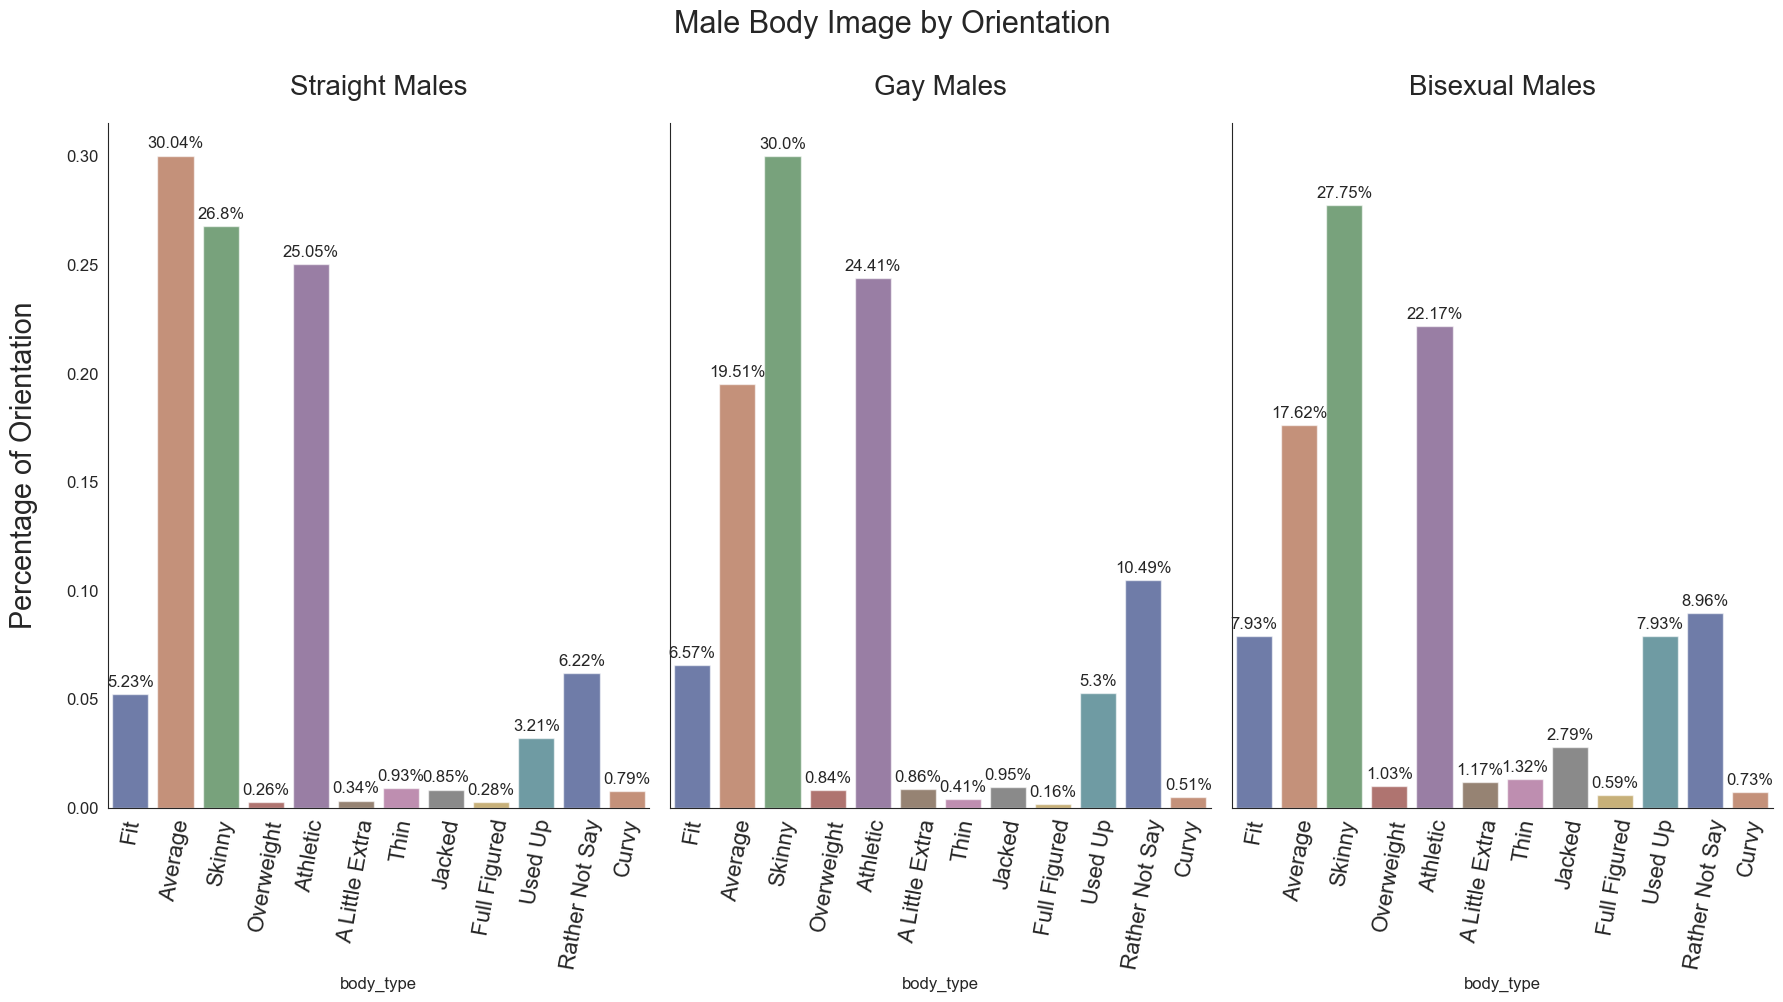

In [51]:
import matplotlib.patches as mpatches

males_body_type = data.loc[data['sex']=='m', ['orientation', 'body_type']]
print(type(males_body_type.body_type))
males_body_type_fillna = males_body_type.body_type.fillna('no response')
list_body_types = males_body_type_fillna.unique()
print(list_body_types)

print()
# print("Males Body Types Counts")
males_body_type_vc = males_body_type.groupby('orientation').body_type.value_counts()
# print(males_body_type_vc)
print()

males_body_type_df = males_body_type_vc.to_frame()
males_body_type_df.reset_index(inplace=True)
males_body_type_df.columns = ['orientation', 'body_type', 'counts']

straight_males = males_body_type_df.query("orientation == 'straight'")
gay_males = males_body_type_df.query("orientation == 'gay'")
bisexual_males = males_body_type_df.query("orientation == 'bisexual'")

# Value counts per straight orientation
straight_males_vc = straight_males.value_counts()
straight_df = straight_males_vc.to_frame()
straight_df.reset_index(inplace=True)
str_denom = straight_df['counts'].sum().astype(float)
straight_df['values'] = straight_df['counts'].apply(lambda x: float(x)/str_denom)

# Value counts per gay orientation
gay_males_vc = gay_males.value_counts()
gay_df = gay_males_vc.to_frame()
gay_df.reset_index(inplace=True)
gay_denom = gay_df['counts'].sum().astype(float)
gay_df['values'] = gay_df['counts'].apply(lambda x: float(x)/gay_denom)

# Value counts per bisexual orientation
bisexual_males_vc = bisexual_males.value_counts()
bisexual_df = bisexual_males_vc.to_frame()
bisexual_df.reset_index(inplace=True)
bisexual_denom = bisexual_df['counts'].sum().astype(float)
bisexual_df['values'] = bisexual_df['counts'].apply(lambda x: float(x)/bisexual_denom)

body_types_df = pd.concat([straight_df, gay_df, bisexual_df])

body_types_chart = body_types_df[['orientation','body_type', 'values']]

print(bold+ "Male Body Image by Sexual Orientation" +end)
print()
print(body_types_chart)
print()

g = sns.catplot(data=body_types_chart, x="body_type", y="values", col="orientation", kind="bar", errorbar=None, palette='dark', alpha=.6, height=10, aspect=.6,)

g.set_xticklabels(['Fit', 'Average', 'Skinny', 'Overweight', 'Athletic', 'A Little Extra', 'Thin',
'Jacked', 'Full Figured', 'Used Up', 'Rather Not Say', 'Curvy'], rotation=80, fontsize=16)

axes = g.axes.flatten()
axes[0].set_title("Straight Males", fontsize=20, pad=20)
axes[1].set_title("Gay Males" , fontsize=20, pad=20)
axes[2].set_title("Bisexual Males", fontsize=20, pad=20)

for ax in g.axes.flat:
    for c in ax.containers:
        labels = ["{}%".format(round(v.get_height()*100, 2)) for v in c ]
        ax.bar_label(c, labels=labels, label_type='edge', padding=3, fontsize=12)
        ax.set_ylabel("Percentage of Orientation", fontsize='xx-large', labelpad=20)

plt.suptitle('Male Body Image by Orientation', size=22, y=1)
g.tight_layout()
plt.show()

In [52]:
# 12) add column body types to features data dataframe

# if we're honest, we impose a hierarchy to body types similar to this one.

#cat_body_types = ['rather not say', 'used up','overweight', 'full figured', 'curvy', 'a little extra',
#              'average','thin', 'skinny', 'fit', 'athletic', 'jacked']

body_type = pd.Series(pd.Categorical(males_body_type_fillna, ordered=False), name='body_type')
features_data['body_type'] = body_type.dropna()
print(len(features_data.body_type))
features_data.head(3)

25078


,city,orientation,ethnicity,religion,sentiment,sector,education,zodiac,status,body_type
3,alameda,bisexual,white,catholicism,and laughing about it,unknown,dropped out of two-year college,NaN,single,skinny
4,alameda,bisexual,white,christianity,and laughing about it,artistic,graduated from law school,taurus,single,overweight
5,alameda,bisexual,white,catholicism,but not too serious about it,education,graduated from ph.d program,aquarius,single,athletic


<h4> Summary Findings: Male Body Type by Orientation </h4>
<p></p>
<p>What someone reports as their body type on a dating site is more likely a reflection of his body image.</p>
<p></p>
<p>The most telling observation is the 11% difference in straight (30.04%) and gay (19.51%) males who identify as "athlectic."</p>
<p></p>
<p>Yet, the same percentage of straight and gay males call themselves "fit".</p>
<p></p>
<p>It seems most males, regardless of orientation, are most confortable identifying as "average".</p>
<p></p>


## 20) Are males of different orientations more or less likely to use drugs?


Male Drug Abuse by Sexual Orientation

orientation  drugs    
bisexual     never        0.548276
             sometimes    0.424138
             often        0.027586
gay          never        0.860944
             sometimes    0.133671
             often        0.005385
straight     never        0.803263
             sometimes    0.186129
             often        0.010608
Name: proportion, dtype: float64







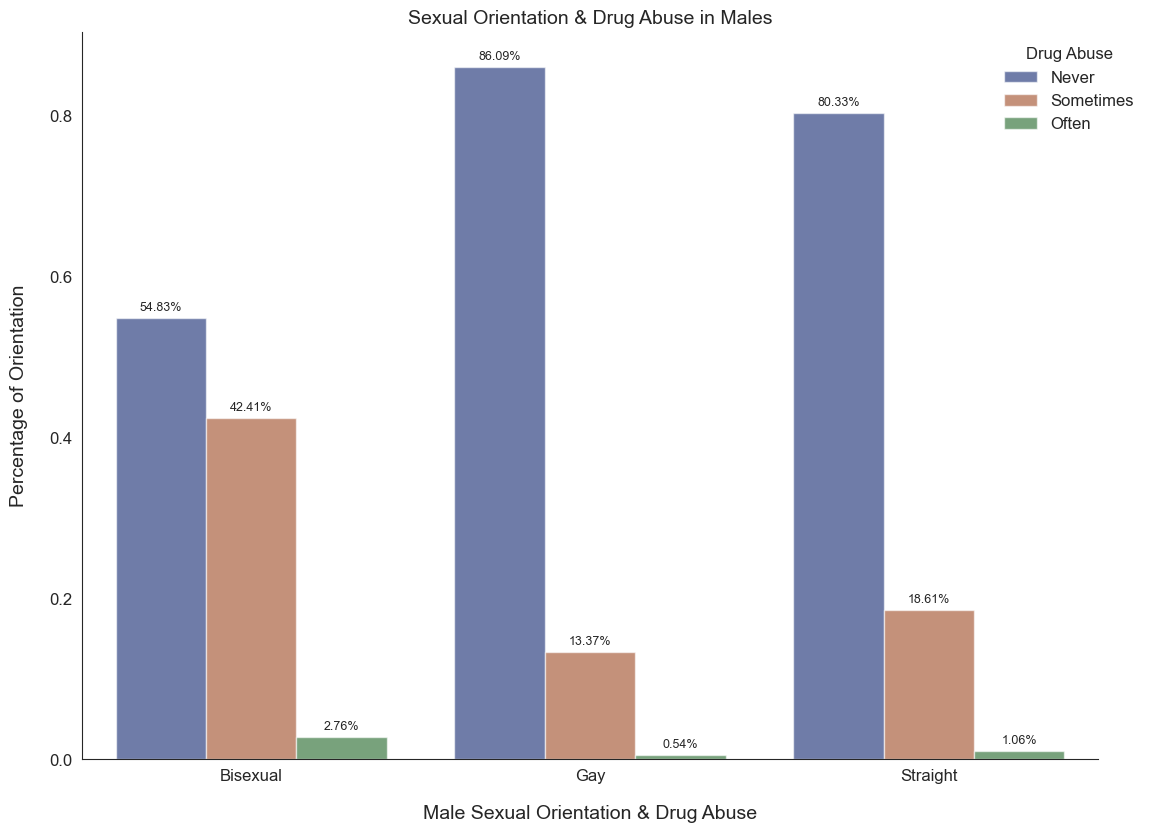

In [53]:
male_drugs = data.loc[data['sex']=='m', ['orientation', 'drugs']].dropna()
male_drugs_vc = male_drugs.groupby('orientation')['drugs'].value_counts(normalize=True)

male_drugs_df = pd.DataFrame(male_drugs_vc)
male_drugs_df.reset_index(inplace=True)
male_drugs_df.columns = ['orientation', 'drugs', 'percentages']

print()
print("Male Drug Abuse by Sexual Orientation")
print()
print(male_drugs_vc)
print()

# capitalize legend labels
male_drugs_df.drugs = male_drugs_df.drugs.str.title()

# Draw a nested barplot by species and sex.
g = sns.catplot(data=male_drugs_df, kind="bar", x="orientation", y="percentages", hue='drugs', 
                palette="dark", legend=None, alpha=.6, height=8.27, aspect=11.7/8.27)

g.set_axis_labels('Male Sexual Orientation & Drug Abuse', 'Percentage of Orientation', fontsize=14, labelpad=15)
g.set_xticklabels(labels=['Bisexual', 'Gay' , 'Straight'])

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# Make list of lables from bar heights
rects = ax.patches
labels = [f"label{i}" for i in range(len(rects))]

# iterate through the axes containers
for c in ax.containers:
    labels = ["{}%".format(round(v.get_height()*100, 2)) for v in c]
    ax.bar_label(c, labels=labels, label_type='edge', padding=3, fontsize=9)

plt.legend(title='Drug Abuse', frameon=False, title_fontsize='medium', 
           bbox_to_anchor=(1.05,1.0), loc='upper right', ncols=1, prop = {"size": 12})
print()
plt.tight_layout()
print()
plt.title('Sexual Orientation & Drug Abuse in Males', fontsize=14, y=1)
print()
print()
male_drugs_df.drugs = male_drugs_df.drugs.str.lower()

In [54]:
# 13) add column drugs to features data dataframe

# cats_drugs = ['often', 'sometimes', 'never']

drugs = pd.Series(pd.Categorical(male_drugs.drugs, ordered=False), name='drugs')
features_data['drugs'] = drugs.str.lower().dropna()
print(len(features_data.drugs))
features_data.head(3)

25078


,city,orientation,ethnicity,religion,sentiment,sector,education,zodiac,status,body_type,drugs
3,alameda,bisexual,white,catholicism,and laughing about it,unknown,dropped out of two-year college,NaN,single,skinny,never
4,alameda,bisexual,white,christianity,and laughing about it,artistic,graduated from law school,taurus,single,overweight,never
5,alameda,bisexual,white,catholicism,but not too serious about it,education,graduated from ph.d program,aquarius,single,athletic,never


<h4> Summary Findings: Male Orientation & Drug Use </h4>
<p></p>
<p>The same pattern, with gay/straight males sharing similar responses, and bissexual males showing great independence, 
    continues in this snapshot of male drug use by orientation.Among straight males, more than eighty percent (80.33%) claim they "never" touch recreational drugs, while 18.61% say they "sometimes" indulge. One percent (1.06%) say they "often" use drugs.</p>
<p></p>
<p> An even greater percentage (86.09%) of gay males claim they "never" touch drugs, while 13.37% say they "sometimes" use drugs. And finally, one-half of one-percent of gay males (.54%) say they "often" do.Among straight males, more than eighty percent (80.33%) claim they "never" touch recreational drugs, while 18.61% say they "sometimes" indulge. Only one percent (1.06%) say they "often" use drugs.</p>
<p></p>
<p>As we've seen before, bisexual males are small percentage of the male population, but they are far more independent than their gay/straight counterparts, with 54.83% claiming they never use drugs, 42.41% claiming they sometimes indulge, and 2.76% claiming they often do.</p>
<p></p>
<p> Since California did not legalize recreational marijauna until 2016, we should note that marijauna was included
as a drug at the time this snapshot was taken. As such, these numbers have probably changed significantly since that time.</p>
<p></p>

## 21) Does male orientation reflect a greater tendency to smoke cigarettes?


Smoking Cigarettes in Males by Orientation

orientation  smokes        
bisexual     no                0.713287
             sometimes         0.109091
             yes               0.078322
             when drinking     0.061538
             trying to quit    0.037762
gay          no                0.804241
             sometimes         0.063622
             when drinking     0.059815
             yes               0.044589
             trying to quit    0.027732
straight     no                0.792349
             sometimes         0.075402
             when drinking     0.057669
             yes               0.043439
             trying to quit    0.031141
Name: proportion, dtype: float64






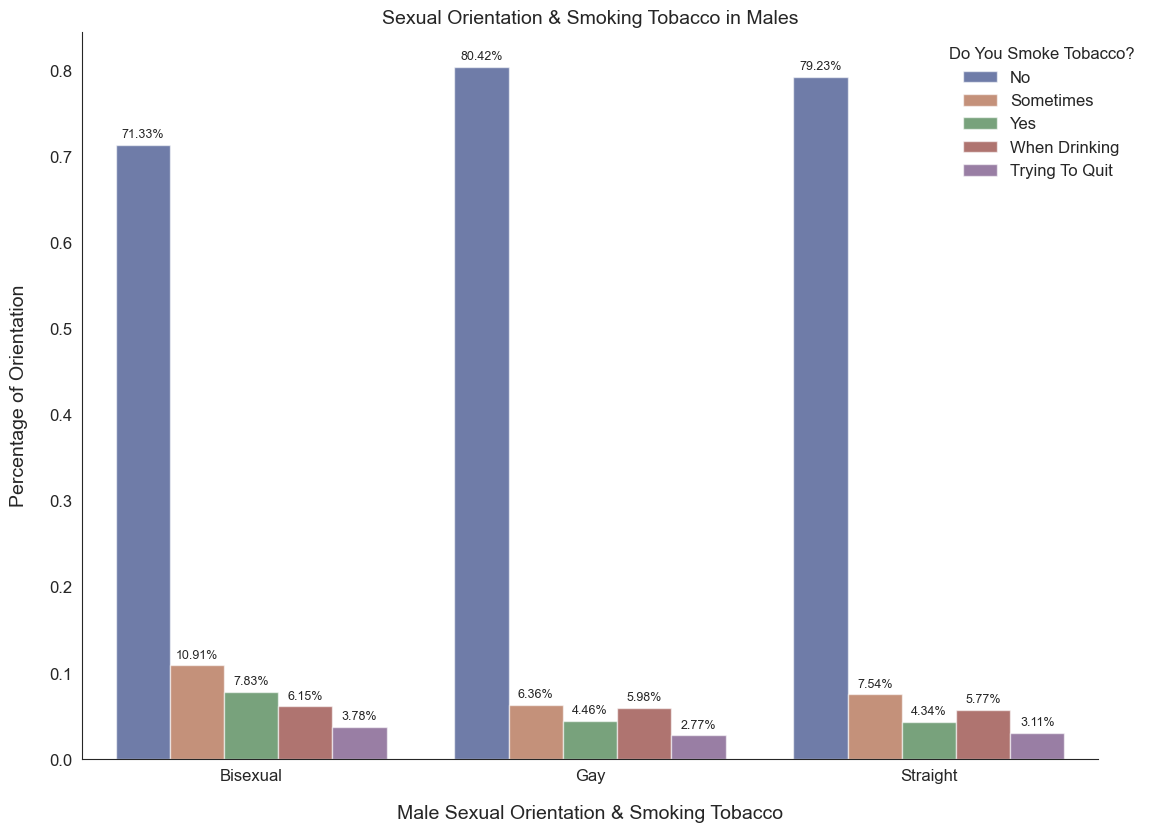

In [55]:
male_smokes = data.loc[data['sex']=='m', ['orientation', 'smokes']].dropna()
male_smokes_vc = male_smokes.groupby('orientation')['smokes'].value_counts(normalize=True)

male_smokes_df = pd.DataFrame(male_smokes_vc)
male_smokes_df.reset_index(inplace=True)
male_smokes_df.columns = ['orientation', 'smokes', 'percentages']

print()
print("Smoking Cigarettes in Males by Orientation")
print()
print(male_smokes_vc)
print()

# capitalize legend labels
male_smokes_df.smokes = male_smokes_df.smokes.str.title()

# Draw a nested barplot by species and sex.
g = sns.catplot(data=male_smokes_df, kind="bar", x="orientation", y="percentages", hue='smokes', 
                palette="dark", legend=None, alpha=.6, height=8.27, aspect=11.7/8.27)

g.set_axis_labels('Male Sexual Orientation & Smoking Tobacco', 'Percentage of Orientation', fontsize=14, labelpad=15)
g.set_xticklabels(labels=['Bisexual', 'Gay' , 'Straight'])

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# Make list of lables from bar heights
rects = ax.patches
labels = [f"label{i}" for i in range(len(rects))]

# iterate through the axes containers
for c in ax.containers:
    labels = ["{}%".format(round(v.get_height()*100, 2)) for v in c]
    ax.bar_label(c, labels=labels, label_type='edge', padding=3, fontsize=9)

plt.legend(title='Do You Smoke Tobacco?', frameon=False, title_fontsize='medium', 
           bbox_to_anchor=(1.05,1.0), loc='upper right', ncols=1, prop = {"size": 12})
plt.tight_layout()
print()
plt.title('Sexual Orientation & Smoking Tobacco in Males', fontsize=14, y=1)
print()
print()
male_smokes_df.smokes = male_smokes_df.smokes.str.lower()

In [56]:
# 14) add column smokes to features data dataframe

# cats_smokes = ['yes', 'trying to quit', 'when drinking' 'sometimes', 'no']

smokes = pd.Series(pd.Categorical(male_smokes.smokes, ordered=False), name='smokes')

features_data['smokes'] = smokes.dropna()
print(len(features_data.smokes))
features_data.head(3)

25078


,city,orientation,ethnicity,religion,sentiment,sector,education,zodiac,status,body_type,drugs,smokes
3,alameda,bisexual,white,catholicism,and laughing about it,unknown,dropped out of two-year college,NaN,single,skinny,never,no
4,alameda,bisexual,white,christianity,and laughing about it,artistic,graduated from law school,taurus,single,overweight,never,no
5,alameda,bisexual,white,catholicism,but not too serious about it,education,graduated from ph.d program,aquarius,single,athletic,never,no


<h4> Summary Findings: Male Orientation & Smoking Cigarettes</h4>
<p></p>
<p><b>The rates for gay/straight and cigarette smokeing are almost identical:</b></p>
<p></p>
<ol>
<p><li>Eighty percent of straight and gay males both say they do not smoke cigarettes.</li></p> 
<p><li>By slightly more than one percent, gay/straight males differ on whether they "sometimes" smoke tobacco.</p></li> 
<p><li>Virtually the same percentage for all orientations (~4.4%) say "yes" to cigarette smoking.</li></p> 
<p><li>Virtually the same percentage for all orientations claim they (~6%) smoke "when drinking".</li></p> 
<p><li>2.77% to 3.11% say they are "trying to quit".</li></p>
</ol>
<p></p>
<p><b>There's some difference in the bisexual male population, but less than reported for drinking or drugs.</b> </p>
<p></p>
<ol>
<p><li> 71.33% of bisexuals say they never touch cigarettes. </li></p>
<p><li> 10.91% say they sometimes smoke cigarettes. </li></p>
<p><li> 7.83% say "yes" they smoke cigarettes. </li></p>
<p><li>  6.15% of bisexuals say they smoke "when drinking".</li></p>
<p><li> 3.78% say they "are trying to quit".</li></p>
</ol>
<p></p>

## 22) How is male orientation related to alcohol use?

   orientation       drinks  percentage
0     bisexual     socially   62.346521
1     bisexual       rarely   14.324693
2     bisexual        often   10.777626
3     bisexual   not at all    9.413370
4     bisexual   very often    1.909959
5     bisexual  desperately    1.227831
6          gay     socially   71.267679
7          gay       rarely   10.817182
8          gay        often    9.717129
9          gay   not at all    6.966998
10         gay   very often    0.759560
11         gay  desperately    0.471451
12    straight     socially   72.710884
13    straight       rarely   10.306122
14    straight        often    9.738095
15    straight   not at all    5.775510
16    straight   very often    0.853741
17    straight  desperately    0.615646
<class 'pandas.core.frame.DataFrame'>

Male Drinking by Sexual Orientation


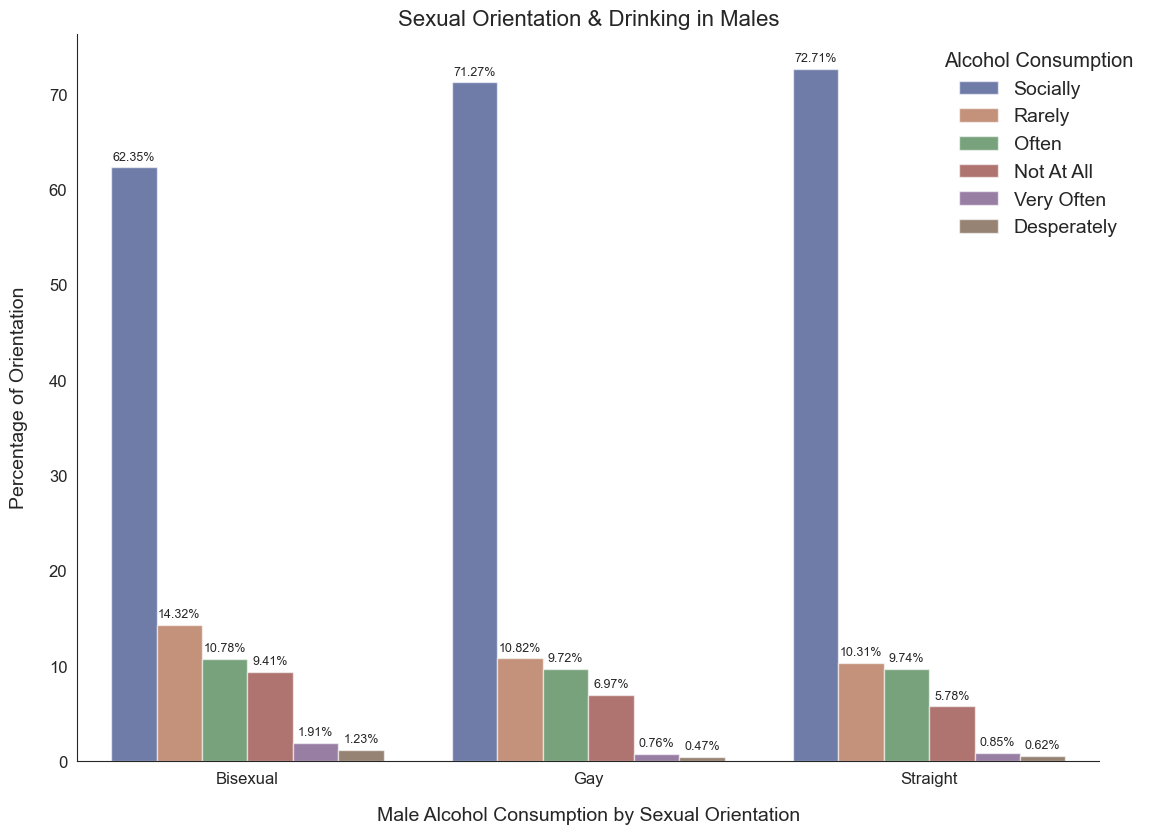

In [57]:
male_drinks = data.loc[data['sex']=='m', ['orientation', 'drinks']]

male_drinks_vc = male_drinks.groupby('orientation')['drinks'].value_counts(normalize=True)

drinks_df = male_drinks_vc.mul(100)
male_drinks_df = drinks_df.rename('percentage').reset_index()

print(male_drinks_df)
print(type(male_drinks_df))
print()

print("Male Drinking by Sexual Orientation")

male_drinks_df.drinks = male_drinks_df.drinks.str.title()

# Draw a nested barplot by species and sex.
g = sns.catplot(
    data=male_drinks_df, kind="bar", x="orientation", y="percentage", hue='drinks', palette="dark", 
    legend=None, alpha=.6, height=8.27, aspect=11.7/8.27)

g.set_axis_labels('Male Alcohol Consumption by Sexual Orientation', 'Percentage of Orientation', fontsize=14, labelpad=15)
g.set_xticklabels(labels=['Bisexual', 'Gay' , 'Straight'])

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# Make list of lables from bar heights
rects = ax.patches
labels = [f"label{i}" for i in range(len(rects))]

# iterate through the axes containers
for c in ax.containers:
    labels = ["{}%".format(round(v.get_height(), 2)) for v in c]
    ax.bar_label(c, labels=labels, label_type='edge', padding=3, fontsize=9)


plt.legend(title='Alcohol Consumption', frameon=False, title_fontsize='large', bbox_to_anchor=(1.05,1.0), loc='upper right', ncols=1, prop = {"size": 14})
plt.tight_layout()
plt.title('Sexual Orientation & Drinking in Males', fontsize=16, y=1)

# lower for features data
male_drinks_df.drinks = male_drinks_df.drinks.str.lower()

In [58]:
# 15) add column drinks to features data dataframe
# cats_drinks = ['desperately', 'very often', 'often', 'socially', 'rarely', 'not at all']

drinks = pd.Series(pd.Categorical(male_drinks.drinks, ordered=False), name='drinks')

features_data['drinks'] = drinks.dropna()
print(len(features_data.drinks))
features_data.head(3)

25078


,city,orientation,ethnicity,religion,sentiment,sector,education,zodiac,status,body_type,drugs,smokes,drinks
3,alameda,bisexual,white,catholicism,and laughing about it,unknown,dropped out of two-year college,NaN,single,skinny,never,no,often
4,alameda,bisexual,white,christianity,and laughing about it,artistic,graduated from law school,taurus,single,overweight,never,no,rarely
5,alameda,bisexual,white,catholicism,but not too serious about it,education,graduated from ph.d program,aquarius,single,athletic,never,no,socially


<h4> Summary Findings: Male Orientation & Alcohol Consumption</h4>
<p></p>
<p> The rates for drinking alcohol are nearly identical for gay and straight males, as depicted in the chart above.
<p></p>
<p> Again, we see greater divergence in bisexual males, where 10% less than gay/straight males claim they drink "socially", roughly 4% more claim they drink "socially", and the same percentage (~10-11%) claim they drink "often" consistent with the percentage (10.78%) claiming they drink "not at all." In fact, the percentage of sober bisexuals is higher than either gay or straight males by 2.5% points. Two percent (1.92%) of bisexuals claim they drink "very often", and 1.23% claim they drink "desperately". There are some differences in the bisexual male population than gay/straight males on this topic, but less than reported for drinking or drugs. In general, whether smoking, drinking or tobacco use, gay and straight males tend to align while bisexual males coonsistently report greater indepedence, and a slightly greater tendency to indulge in extremes.</p>
<p></p>

## 23) What influence does male orientation have on parenthood?

13488
Index(['orientation', 'children', 'percentage'], dtype='object')
Males & Fatherhood by Sexual Orientation


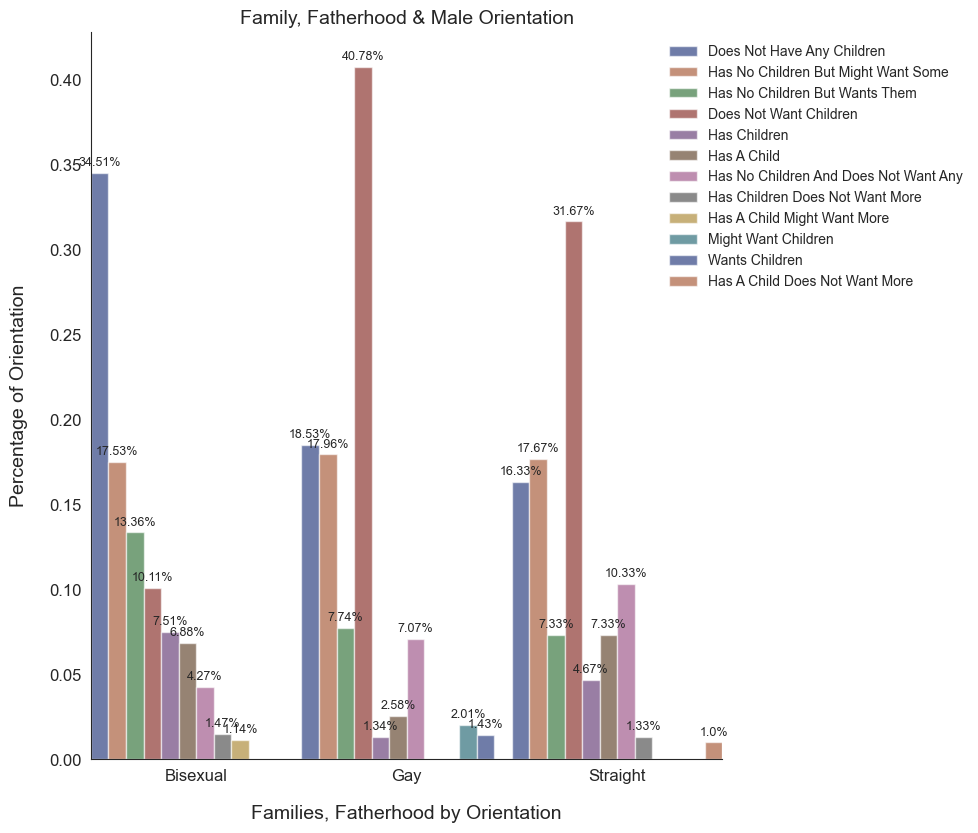

In [59]:
males_offspring = data.loc[data['sex']=='m', ['orientation','offspring']].dropna()
print(len(males_offspring))

# translating menu choices into cleaner language for better communication and plotting.
males_offspring.replace(to_replace='doesn&rsquo;t have kids', value='does not have any children', inplace=True, limit=None)
males_offspring.replace(to_replace='doesn&rsquo;t have kids, and doesn&rsquo;t want any', value='has no children and does not want any', inplace=True, limit=None)
males_offspring.replace(to_replace='doesn&rsquo;t want kids', value='does not want children', inplace=True, limit=None)
males_offspring.replace(to_replace='has kids, and might want more', value='has children and might want more', inplace=True, limit=None)
males_offspring.replace(to_replace='has kids', value='has children', inplace=True, limit=None)
males_offspring.replace(to_replace='has a kid, but doesn&rsquo;t want more', value='has a child does not want more', inplace=True, limit=None)
males_offspring.replace(to_replace='has kids, but doesn&rsquo;t want more', value='has children does not want more', inplace=True, limit=None)
males_offspring.replace(to_replace='doesn&rsquo;t have kids, but might want them', value='has no children but might want some', inplace=True, limit=None)
males_offspring.replace(to_replace='has a kid, and might want more', value='has a child might want more', inplace=True, limit=None)
males_offspring.replace(to_replace='has kids', value='has children', inplace=True, limit=None)
males_offspring.replace(to_replace='might want kids', value='might want children', inplace=True, limit=None)
males_offspring.replace(to_replace='has a kid', value='has a child', inplace=True, limit=None)
males_offspring.replace(to_replace='has kids, and wants more', value='has children and wants more', inplace=True, limit=None)
males_offspring.replace(to_replace='might want kids', value='might want children', inplace=True, limit=None)
males_offspring.replace(to_replace='has kids, and wants more', value='has children and wants more', inplace=True, limit=None)
males_offspring.replace(to_replace='has a kid, and wants more', value='has a child and wants more', inplace=True, limit=None)
males_offspring.replace(to_replace='doesn&rsquo;t have kids, but wants them', value='has no children but wants them', inplace=True, limit=None)
males_offspring.replace(to_replace='wants kids', value='wants children', inplace=True, limit=None)

males_offspring_vc = males_offspring.groupby('orientation')['offspring'].value_counts(normalize=True)
# print(males_offspring_vc)
males_offspring_df = males_offspring_vc.to_frame()
males_offspring_df.reset_index(inplace=True)
males_offspring_df.columns = ['orientation', 'children', 'percentage']

straight_males = males_offspring_df.query("orientation == 'straight'")
gay_males = males_offspring_df.query("orientation == 'gay'")
bisexual_males = males_offspring_df.query("orientation == 'bisexual'")

offspring = pd.concat([straight_males,gay_males, bisexual_males], axis=0)
print(offspring.columns)
offspring_data = offspring.loc[offspring['percentage']>.009]
offspring_data = pd.DataFrame(offspring_data)

print("Males & Fatherhood by Sexual Orientation")

offspring_data.children = offspring_data.children.str.title()

# Draw a nested barplot by species and sex.
g = sns.catplot(
    data=offspring_data, kind="bar", x="orientation", y="percentage", hue="children",
    palette='dark', alpha=.6, width=1, dodge=.15, height=8.27, aspect=11.7/8.27, legend=None)

g.set_axis_labels('Families, Fatherhood by Orientation', 'Percentage of Orientation', fontsize=14, labelpad=15)
g.set_xticklabels(labels=['Bisexual', 'Gay' , 'Straight'])

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = g.facet_axis(0, 0)  # or ax = g.axes.flat[0]

# Make list of lables from bar heights
rects = ax.patches
labels = [f"label{i}" for i in range(len(rects))]

# iterate through the axes containers
for c in ax.containers:
    labels = ["{}%".format(round(v.get_height()*100, 2)) for v in c]
    ax.bar_label(c, labels=labels, label_type='edge', padding=3, fontsize=9) 

plt.legend(title='', frameon=False, title_fontsize='small', bbox_to_anchor=(1.4,1), loc='upper right', ncols=1, prop = {"size": 10})
plt.tight_layout()
plt.title('Family, Fatherhood & Male Orientation', fontsize=14, y=1)

# reset for features data df
offspring_data.children = offspring_data.children.str.lower()

In [61]:
# 16) Excluding children for insufficient data.

<h4> Summary Findings: Families, Fatherhood by Generation</h4>
<p></p>
<p><b>Across the board, 17%-18% of all males in all orientations have no children but "might" want some.</b></p> 
<p></p>
    <p>That is the only consistent statistic on this issue across all orientations.</p>
<p></p>
    <p> This analysis involved a lot of complicated data, with nuanced choices, which I narrowed down to include responses of 1% or greater for clarity's sake. Beyond the unanimous 1 in 6 males across all orientations who have no children but might want some, there were political factors at play affecting how gay/bisexual males felt about fatherhood.</p> 
<p></p>
    Based on the last online date, this data was collected in 2012. Same-sex marraige was not legal in California until the next year (6/2013) and the Supreme Court struck down all state bans in 2015. 99.85% of the males in this sample lived in California at the time.</p> 
<p></p>
<p>In addition, forty percent (40.78%) of gay males reported not having nor wishing to have children at all, compared to 31.67% of straight males and only 10.11% of bisexual males. Virtually the same percentage (7-8%) of both gay and straight males reported having no children, but wanting to have them in the future, compared to 13.36% of bisexual males. 
<p></p>    
    <p>The same percentage of bisexual and gay males (7.51% vs 7.0%) reported currently having children, but declined to speculate on their desire to have more children in the future, compared to 4.67% of straight males. At the time, however, straight males could think in terms of having children. All gay males and most bisexual males were hanging in a political limbo, makng it difficult to extrapolate relevant patterns from these findings.</p>
<p></p>  
    <p>If we divide the reported findings in two groups - 1) those who have and/or want and 2) those who do not have or wan them - a bigger picture emerges. Straight males are split down the middle with 49% having or wanting children and 51% who do not, compared to a solid majority (69%) of gay males who don't have or want children. Bisexual males who do not have or want at 57% versus the 43% who do have and/or want to have more children.
<p></p>
    <p> In summary, males of all orientation are divided on the issue of having/wanting children with straight males expressing slightly stronger desire for children than bisexual males, and gay males epressing not having or wanting children by a solid majority (70%). 
<p></p>
    <p>Given recent political changes, this data could have easily changed in the past decade.</p>

### 24) Can we estimate the compounded effects of ethnicity and orientation on income?

## 25) Does generational status have an impact on male orientation?

            age_group orientation  percentages
0        Baby Boomers    straight     0.842576
1        Baby Boomers         gay     0.139177
2        Baby Boomers    bisexual     0.018247
3        Generation X    straight     0.869559
4        Generation X         gay     0.111078
5        Generation X    bisexual     0.019363
6        Generation Z    straight     0.808511
7        Generation Z         gay     0.127660
8        Generation Z    bisexual     0.063830
9         Millennials    straight     0.869274
10        Millennials         gay     0.107431
11        Millennials    bisexual     0.023296
12  Silent Generation    straight     0.920000
13  Silent Generation         gay     0.072000
14  Silent Generation    bisexual     0.008000
<class 'pandas.core.frame.DataFrame'>


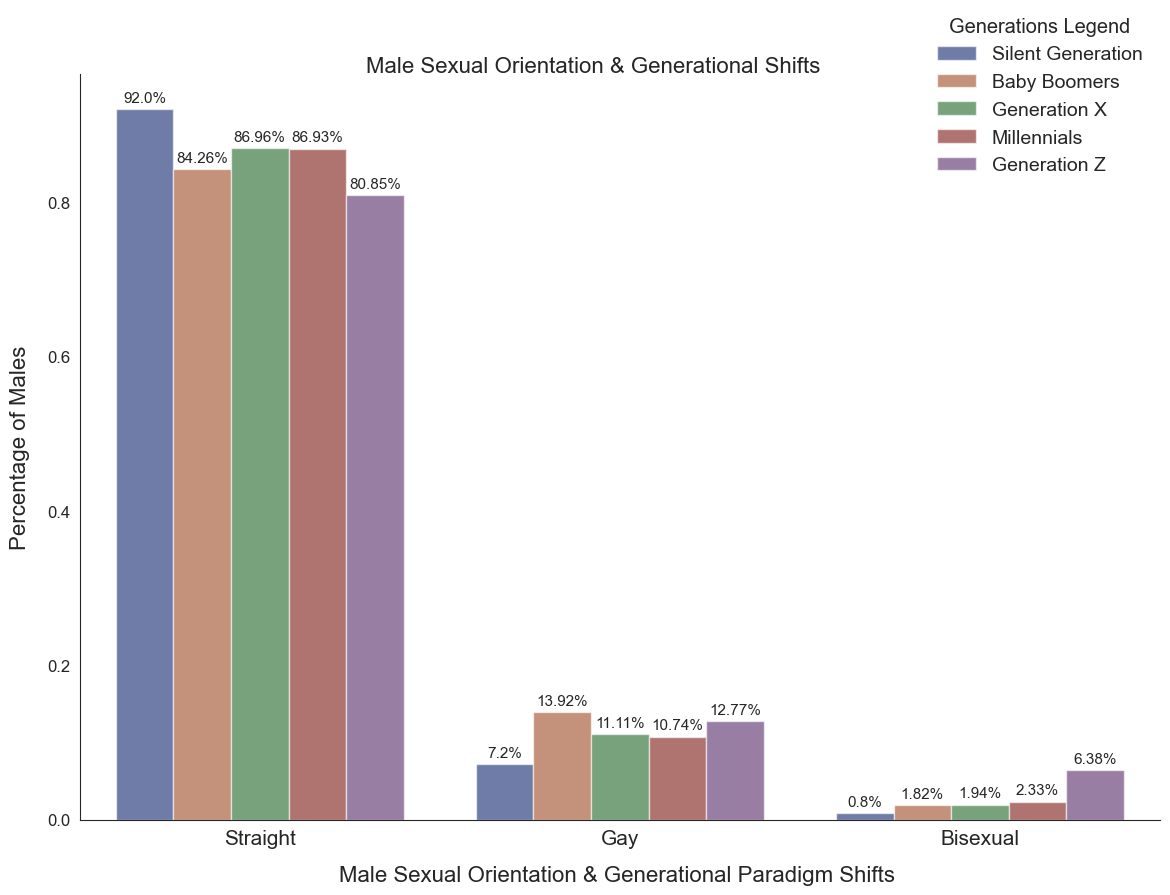

In [62]:
import datetime
from datetime import date

# copy data
males_data = df.copy()

# prepare last_date_online
males_data = males_data.query("sex == 'm'")
males_data['last_online'].dropna()
males_data['last_online'] = males_data['last_online'].astype(str)
last_date_online = males_data['last_online']

# parse four numbers of last_date_online to get year
males_data['last_year_online'] = [x[:4] for x in males_data['last_online']]
last_year_online = males_data['last_year_online']

# need current year to accurately curret age since last online.
current_year = datetime.date.today().year

# make a list of current year equal to length of last year online.
males_data['current_year'] = [current_year for x in males_data['last_year_online']]
current_year = males_data['current_year']

# convert to numeric, two-dimensional np arrays
current_year = pd.to_numeric(current_year, errors='coerce')
last_year_online = pd.to_numeric(last_year_online, errors='coerce')
zip_years = np.array(list(zip(current_year, last_year_online)))

# for each male in sample, subtract current year in array
# from last year online, then add to age when last online,
# givng us the present age for each male.

adj_ages = [item1-item2 for item1, item2 in zip_years]
adj_ages = pd.to_numeric(adj_ages, errors='coerce')
last_year_online = pd.to_numeric(last_year_online, errors='coerce')

# present age for each male
current_adj_ages = males_data['age'] + adj_ages

# current year - adjusted ages give us birth year
# for each male. Now we can place in correct gen group.

males_data['birth_year'] = current_year - current_adj_ages

# reset current year from list to date for
# segmenting birth years by generation paradigms.

currYear = int(datetime.date.today().year)

# segment males into generational groups based on birth year.

males_data['age_group'] = pd.cut(males_data.birth_year, bins = [1920, 1946, 1965, 1981, 1993, currYear], 
                         labels= ['Silent Generation', 'Baby Boomers', 'Generation X', 'Millennials', 'Generation Z' ])

# create lists for each generational group.

silent_gen = males_data.loc[males_data['age_group'] == "Silent Generation", ['age_group','orientation','age']]
baby_boomers = males_data.loc[males_data['age_group'] == "Baby Boomers", ['age_group','orientation','age']]
generation_x = males_data.loc[males_data['age_group'] == "Generation X", ['age_group','orientation','age']]
millennials = males_data.loc[males_data['age_group'] == "Millennials", ['age_group','orientation','age']]
generation_z = males_data.loc[males_data['age_group'] == "Generation Z", ['age_group','orientation','age']]

generations = pd.concat([baby_boomers, generation_x, millennials, generation_z, silent_gen])
generations = generations[['orientation', 'age_group']].dropna().apply(lambda x: x.str.strip())

generations_vc = generations.groupby('age_group').value_counts(normalize=True)
generations_df = generations_vc.to_frame()
gendata = generations_df.reset_index()
gendata.columns = ['age_group','orientation', 'percentages'] 
gendata.sort_values(by='age_group', ascending=False)

print(gendata)
print(type(gendata))

sns.set_style('white')

g = sns.catplot(data=gendata, x='orientation', y='percentages', hue='age_group', kind='bar', 
            palette='dark', legend=None, hue_order=["Silent Generation", "Baby Boomers", 'Generation X', 'Millennials', 'Generation Z'], 
            alpha=.6, height=8.27, aspect=11.7/8.27)

for ax in g.axes.ravel():

# iterate through the axes containers

    for c in ax.containers:
        labels = ["{}%".format(round(v.get_height()*100, 2)) for v in c]
        ax.bar_label(c, labels=labels, label_type='edge', padding=3, fontsize=11)

g.fig.suptitle("Male Sexual Orientation & Generational Shifts", size=16, y=1)
g.set_titles(col_template="{col_name}", size=12)
plt.legend(title='Generations Legend', frameon=False, title_fontsize='large', loc='upper right', bbox_to_anchor=(1,1.1), prop = {"size": 14})
g.set_axis_labels('Male Sexual Orientation & Generational Paradigm Shifts ', 'Percentage of Males', fontsize=16, labelpad=12)
g.set_xticklabels(labels=["Straight", "Gay", 'Bisexual'], step=[0, 1, 2], fontsize=15)

g.savefig("gen_chart.png")

plt.show(g)

print()


In [63]:
# This changes depending what variables I intend to  use.
features_data = features_data[['orientation', 'city', 'ethnicity', 'religion','sentiment', 'body_type']]

### Regression and Classifier Models: Finalizing Dataset for Analysis

<h7><b>Important Note:</b> If the following blocks of code are commented out, I am running a scenario with imbalanced classes. 
    If they are not, I am using these blocks of code to ensure balanced classes.</h7>

In [64]:

# IMPORTANT: THIS IS THE IMPUTED DATA FOR THE BALANCED DATASETS BY BOTH ETHNICITY AND ORIENTATION
# IT IS COMMENTED OUT FOR 'REAL WORLD' ANALYSES AND THEN I USE IT FOR THE
# SECOND ROUND TO EXAMINE RESULTS WITHOUT THE DOWNSIDES OF IMBALANCED CLASSES.

# ['orientation', 'city', 'ethnicity', 'religion','sentiment', 'body_type']]

# Running the models twice, under balanced and imbalanced conditions, and comparing
# the results is the only way I could find to mitigate these issues.

# grabbing income and orientation data by ethnicity
# will need a dataframe for income given less than 9000 viable answers

straight_asian = features_data.loc[(features_data['ethnicity']== 'asian') & (features_data['orientation']== 'straight'),['orientation', 'city', 'ethnicity', 'religion','sentiment', 'body_type']]
gay_asian = features_data.loc[(features_data['ethnicity']=='asian') & (features_data['orientation']=='gay'),['orientation', 'city', 'ethnicity', 'religion','sentiment', 'body_type']]
bisexual_asian = features_data.loc[(features_data['ethnicity']=='asian') & (features_data['orientation']=='bisexual'),['orientation', 'city', 'ethnicity', 'religion','sentiment', 'body_type']]

straight_black = features_data.loc[(features_data['ethnicity']=='black') & (features_data['orientation']=='straight'),['orientation', 'city', 'ethnicity', 'religion','sentiment', 'body_type']]
gay_black = features_data.loc[(features_data['ethnicity']=='black') & (features_data['orientation']=='gay'), ['orientation', 'city', 'ethnicity', 'religion','sentiment', 'body_type']]
bisexual_black = features_data.loc[(features_data['ethnicity']=='black') & (features_data['orientation']=='bisexual'), ['orientation', 'city', 'ethnicity', 'religion','sentiment', 'body_type']]

straight_hispanic = features_data.loc[(features_data['ethnicity']=='hispanic ') & (features_data['orientation']=='straight'),['orientation', 'city', 'ethnicity', 'religion','sentiment', 'body_type']]
gay_hispanic = features_data.loc[(features_data['ethnicity']=='hispanic ') & (features_data['orientation']=='gay'), ['orientation', 'city', 'ethnicity', 'religion','sentiment', 'body_type']]
bisexual_hispanic = features_data.loc[(features_data['ethnicity']=='hispanic ') & (features_data['orientation']=='bisexual'), ['orientation', 'city', 'ethnicity', 'religion','sentiment', 'body_type']]

straight_mideast = features_data.loc[(features_data['ethnicity']=='middle eastern') & (features_data['orientation']=='straight'), ['orientation', 'city', 'ethnicity', 'religion','sentiment', 'body_type']]
gay_mideast = features_data.loc[(features_data['ethnicity']=='middle eastern') & (features_data['orientation']=='gay'),['orientation', 'city', 'ethnicity', 'religion','sentiment', 'body_type']]
bisexual_mideast = features_data.loc[(features_data['ethnicity']=='middle eastern') & (features_data['orientation']=='bisexual'), ['orientation', 'city', 'ethnicity', 'religion','sentiment', 'body_type']]

straight_native = features_data.loc[(features_data['ethnicity']=='native american') & (features_data['orientation']=='straight'), ['orientation', 'city', 'ethnicity', 'religion','sentiment', 'body_type']]
gay_native = features_data.loc[(features_data['ethnicity']=='native american') & (features_data['orientation']=='gay'),['orientation', 'city', 'ethnicity', 'religion','sentiment', 'body_type']]
bisexual_native = features_data.loc[(features_data['ethnicity']=='native american') & (features_data['orientation']=='bisexual'), ['orientation', 'city', 'ethnicity', 'religion','sentiment', 'body_type']]

straight_indian = features_data.loc[(features_data['ethnicity']=='indian') & (features_data['orientation']=='straight'), ['orientation', 'city', 'ethnicity', 'religion','sentiment', 'body_type']]
gay_indian = features_data.loc[(features_data['ethnicity']=='indian') & (features_data['orientation']=='gay'), ['orientation', 'city', 'ethnicity', 'religion','sentiment', 'body_type']]
bisexual_indian = features_data.loc[(features_data['ethnicity']=='indian') & (features_data['orientation']=='bisexual'),['orientation', 'city', 'ethnicity', 'religion','sentiment', 'body_type']]

straight_pacific = features_data.loc[(features_data['ethnicity']=='pacific islander') & (features_data['orientation']=='straight'),['orientation', 'city', 'ethnicity', 'religion','sentiment', 'body_type']]
gay_pacific = features_data.loc[(features_data['ethnicity']=='pacific islander') & (features_data['orientation']=='gay'),['orientation', 'city', 'ethnicity', 'religion','sentiment', 'body_type']]
bisexual_pacific = features_data.loc[(features_data['ethnicity']=='pacific islander') & (features_data['orientation']=='bisexual'),['orientation', 'city', 'ethnicity', 'religion','sentiment', 'body_type']]

straight_white = features_data.loc[(features_data['ethnicity']=='white') & (features_data['orientation']=='straight'), ['orientation', 'city', 'ethnicity', 'religion','sentiment', 'body_type']]
gay_white = features_data.loc[(features_data['ethnicity']=='white') & (features_data['orientation']=='gay'),['orientation', 'city', 'ethnicity', 'religion','sentiment', 'body_type']]
bisexual_white = features_data.loc[(features_data['ethnicity']=='white') & (features_data['orientation']=='bisexual'), ['orientation', 'city', 'ethnicity', 'religion','sentiment', 'body_type']]

straight_other = features_data.loc[(features_data['ethnicity']=='other') & (features_data['orientation']=='straight'), ['orientation', 'city', 'ethnicity', 'religion','sentiment', 'body_type']]
gay_other = features_data.loc[(features_data['ethnicity']=='other') & (features_data['orientation']=='gay'),['orientation', 'city', 'ethnicity', 'religion','sentiment', 'body_type']]
bisexual_other = features_data.loc[(features_data['ethnicity']=='other') & (features_data['orientation']=='bisexual'), ['orientation', 'city', 'ethnicity', 'religion','sentiment', 'body_type']]


In [65]:

# dealing with imbalanced classes/resample for each ethnicity

straight_asian = straight_asian.sample(n=1000, replace=True, random_state=1).reset_index(drop=True)
straight_white = straight_white.sample(n=1000, replace=True, random_state=1).reset_index(drop=True)
straight_hispanic = straight_hispanic .sample(n=1000, replace=True, random_state=1).reset_index(drop=True)
straight_black = straight_black.sample(n=1000, replace=True, random_state=1).reset_index(drop=True)
straight_other = straight_other.sample(n=1000, replace=True, random_state=1).reset_index(drop=True)
straight_native = straight_native.sample(n=1000, replace=True, random_state=1).reset_index(drop=True)
straight_pacific = straight_pacific.sample(n=1000, replace=True, random_state=1).reset_index(drop=True)
straight_mideast = straight_mideast.sample(n=1000, replace=True, random_state=1).reset_index(drop=True)
straight_indian = straight_indian.sample(n=1000, replace=True, random_state=1).reset_index(drop=True)

straights = pd.concat([straight_asian, straight_white, straight_hispanic, straight_black, 
                       straight_other, straight_native, straight_pacific, 
                       straight_mideast, straight_indian]).reset_index(drop=True)


In [66]:

# dealing with imbalanced classes/resample for each ethnicity

gay_asian = gay_asian.sample(n=1000, replace=True, random_state=1).reset_index(drop=True)
gay_white = gay_white.sample(n=1000, replace=True, random_state=1).reset_index(drop=True)
gay_hispanic = gay_hispanic .sample(n=1000, replace=True, random_state=1).reset_index(drop=True)
gay_black = gay_black.sample(n=1000, replace=True, random_state=1).reset_index(drop=True)
gay_other = gay_other.sample(n=1000, replace=True, random_state=1).reset_index(drop=True)
gay_native = gay_native.sample(n=1000, replace=True, random_state=1).reset_index(drop=True)
gay_pacific = gay_pacific.sample(n=1000, replace=True, random_state=1).reset_index(drop=True)
gay_mideast = gay_mideast.sample(n=1000, replace=True, random_state=1).reset_index(drop=True)
gay_indian = gay_indian.sample(n=1000, replace=True, random_state=1).reset_index(drop=True)

gays = pd.concat([gay_asian, gay_white, gay_hispanic, gay_black, 
                       gay_other, gay_native, gay_pacific, gay_mideast, gay_indian]).reset_index(drop=True)


In [67]:

# dealing with imbalanced classes/resample for each ethnicity

bisexual_asian = bisexual_asian.sample(n=1000, replace=True, random_state=1).reset_index(drop=True)
bisexual_white = bisexual_white.sample(n=1000, replace=True, random_state=1).reset_index(drop=True)
bisexual_hispanic = bisexual_hispanic .sample(n=1000, replace=True, random_state=1).reset_index(drop=True)
bisexual_black = bisexual_black.sample(n=1000, replace=True, random_state=1).reset_index(drop=True)
bisexual_other = bisexual_other.sample(n=1000, replace=True, random_state=1).reset_index(drop=True)
bisexual_native = bisexual_native.sample(n=1000, replace=True, random_state=1).reset_index(drop=True)
bisexual_pacific = bisexual_pacific.sample(n=1000, replace=True, random_state=1).reset_index(drop=True)
bisexual_mideast = bisexual_mideast.sample(n=1000, replace=True, random_state=1).reset_index(drop=True)
# bisexual_indian = bisexual_indian.sample(n=1000, replace=True, random_state=1).reset_index(drop=True) No data

bisexuals = pd.concat([bisexual_asian, bisexual_white, bisexual_hispanic, bisexual_black, 
                       bisexual_other, bisexual_native, bisexual_pacific, bisexual_mideast, bisexual_indian]).reset_index(drop=True)


In [68]:
print("After Resampling")
# create df by concat. always reset index, inplace
features_data = pd.concat([straights.reset_index(drop=True), gays.reset_index(drop=True), bisexuals.reset_index(drop=True)]).reset_index(drop=True)
print("Sample Size: ", len(features_data))
print("Features Data Columns")
print(features_data.columns)
features_data.head()

After Resampling
Sample Size:  26010
Features Data Columns
Index(['orientation', 'city', 'ethnicity', 'religion', 'sentiment',
       'body_type'],
      dtype='object')


,orientation,city,ethnicity,religion,sentiment,body_type
0,straight,san carlos,asian,agnosticism,and laughing about it,fit
1,straight,emeryville,asian,christianity,but not too serious about it,average
2,straight,san francisco,asian,atheism,and laughing about it,average
3,straight,palo alto,asian,atheism,but not too serious about it,average
4,straight,san francisco,asian,NaN,but not too serious about it,average


In [69]:
features_data = features_data.replace('nan', np.nan)
features_data = features_data.dropna()

features_data.columns

Index(['orientation', 'city', 'ethnicity', 'religion', 'sentiment',
       'body_type'],
      dtype='object')

In [70]:
# features_data.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)

In [71]:
features_data['orientation'] = features_data['orientation'].astype('category')
orientation_dict = dict(zip(features_data['orientation'].cat.codes, features_data['orientation'] ) )
features_data['orientation'] = features_data['orientation'].cat.codes
print("orientation_dict")
print(orientation_dict)
print()

orientation_dict
{2: 'straight', 0: 'gay', 1: 'bisexual'}



In [72]:
features_data['city'] = features_data['city'].astype('category')
city_dict = dict(zip(features_data['city'].cat.codes, features_data['city'] ) )
features_data['city'] = features_data['city'].cat.codes
print("city_dict")
print(city_dict)
print()

city_dict
{84: 'san carlos', 27: 'emeryville', 86: 'san francisco', 70: 'palo alto', 76: 'redwood city', 13: 'burlingame', 9: 'berkeley', 49: 'martinez', 63: 'oakland', 78: 'rodeo', 34: 'hayward', 57: 'mountain view', 1: 'albany', 6: 'belmont', 83: 'san bruno', 16: 'castro valley', 74: 'pleasant hill', 28: 'fairfax', 35: 'hercules', 22: 'daly city', 52: 'millbrae', 69: 'pacifica', 77: 'richmond', 62: 'novato', 26: 'el sobrante', 51: 'mill valley', 50: 'menlo park', 67: 'orinda', 66: 'orange', 41: 'lafayette', 24: 'el cerrito', 32: 'green brae', 55: 'moraga', 75: 'point richmond', 25: 'el granada', 31: 'fremont', 19: 'corte madera', 33: 'half moon bay', 73: 'pinole', 8: 'benicia', 0: 'alameda', 30: 'foster city', 43: 'larkspur', 7: 'belvedere tiburon', 12: 'brisbane', 82: 'san anselmo', 40: 'kentfield', 23: 'east palo alto', 4: 'atherton', 56: 'moss beach', 48: 'marin city', 17: 'colma', 45: 'los angeles', 21: 'crockett', 46: 'los gatos', 39: 'kensington', 80: 'ross', 18: 'concord', 10:

In [73]:
features_data['ethnicity'] = features_data['ethnicity'].astype('category')
ethnicity_dict = dict(zip(features_data['ethnicity'].cat.codes, features_data['ethnicity'] ) )
features_data['ethnicity'] = features_data['ethnicity'].cat.codes
print("ethnicity_dict")
print(ethnicity_dict)
print()

ethnicity_dict
{0: 'asian', 8: 'white', 2: 'hispanic ', 1: 'black', 6: 'other', 5: 'native american', 7: 'pacific islander', 4: 'middle eastern', 3: 'indian'}



In [74]:
features_data['sentiment'] = features_data['sentiment'].astype('category')
sentiment_dict = dict(zip(features_data['sentiment'].cat.codes, features_data['sentiment'] ) )
features_data['sentiment'] = features_data['sentiment'].cat.codes
print("sentiment_dict")
print(sentiment_dict)
print()

sentiment_dict
{0: 'and laughing about it', 3: 'but not too serious about it', 1: 'and somewhat serious about it', 2: 'and very serious about it'}



In [75]:
features_data['religion'] = features_data['religion'].astype('category')
religion_dict = dict(zip(features_data['religion'].cat.codes, features_data['religion'] ) )
features_data['religion'] = features_data['religion'].cat.codes
print("religion_dict")
print(religion_dict)
print()

religion_dict
{0: 'agnosticism', 4: 'christianity', 1: 'atheism', 8: 'other', 3: 'catholicism', 5: 'hinduism', 7: 'judaism', 2: 'buddhism', 6: 'islam'}



In [76]:
features_data['body_type'] = features_data['body_type'].astype('category')
body_type_dict = dict(zip(features_data['body_type'].cat.codes, features_data['body_type'] ) )
features_data['body_type'] = features_data['body_type'].cat.codes
print("body_type_dict")
print(body_type_dict)
print()

body_type_dict
{4: 'fit', 2: 'average', 10: 'skinny', 11: 'thin', 7: 'no response', 6: 'jacked', 0: 'a little extra', 1: 'athletic', 12: 'used up', 5: 'full figured', 8: 'overweight', 3: 'curvy', 9: 'rather not say'}



## Mapping Categorical Data

## Multinomial Linear Regression:

### Question 1: Does male orientation have a linear relationship with ethnicity?

In [77]:
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

# print(list(features_data.columns.values))

X = features_data.drop(columns=['orientation'])
y = features_data[['orientation']]


In [78]:
# split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)
# ravel() function returns flattened data as an ndarray(1d array)
# y_train = y_train.values.ravel()
# y_test = y_test.values.ravel()

# use MinMaxScaler to put all features values in the same range and scale
# cannot us minmaxscaler on object?
# import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

# just transform test data. fiitting it skews results.
X_test_scaled = scaler.transform(X_test) # Split the data into training set and test set


In [79]:
mlreg = LinearRegression()

In [80]:
mlreg.fit(X_train_scaled, y_train)

LinearRegression()

In [81]:
# coefficient of determination or r-squared score for train data
mlreg.score(X_train_scaled, y_train)

0.05838553822562209

In [82]:
print(len(X_test_scaled))
print(len(y_test))

4532
4532


In [83]:
# coefficient of determination or r-squared score for train data
r_squared = mlreg.score(X_test_scaled, y_test)
r_squared

0.06664941636522725

In [84]:
y_pred_train = mlreg.predict(X_train_scaled)

In [85]:
# coefficients of the multinomial linear model
mlreg.coef_

array([[-0.19, 0.00, -0.01, 0.01, 0.00]])

In [86]:
# There is no linear relationship between ethnicity and male sexual orientation, even when we correct the imbalances
# in the sample for both variables. Our scale for orientation begins at zero for gay and ends at 2 for straight. Thus,
# the negative coefficients suggest the independent variables have less of an effect as they decrease.

In [87]:
# print the entire array
# import sys
# np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(threshold=3)
y_pred_train

array([[0.73632542],
       [1.00398598],
       [0.92994718],
       ...,
       [1.25226199],
       [0.74362067],
       [0.89542851]])

In [88]:
# The r2 tells us the proportion of variance in the dependent variable that can be explained by the independent variable
r2_score(y_train, y_pred_train)

0.05838553822562209

In [89]:
print(len(X_train_scaled))
print(len(y_train))

18126
18126


## Logistic Regression: Multinomial Binary Classification

### Question 2: Is there a logistic (binary) relationship between male orientation and ethnicity?

In [90]:
logReg_model = LogisticRegression(multi_class= "multinomial")

# y_test = y_test.values.argmax(axis=1)
# y_train = y_train.values.argmax(axis=1)

logReg_model.fit(X_train_scaled, y_train)

training_accuracy = logReg_model.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = logReg_model.predict(X_test_scaled)

print(classification_report(y_test, predictions))

The accuracy of model on training data is: 47.0%

              precision    recall  f1-score   support

           0       0.48      0.83      0.61      1812
           1       0.47      0.30      0.37      1564
           2       0.45      0.17      0.25      1156

    accuracy                           0.48      4532
   macro avg       0.47      0.43      0.41      4532
weighted avg       0.47      0.48      0.43      4532



In [91]:
# The answer again is no. We achieve about the success rate as guessing (34%) 
# after having adjusted for imbalanced classes. The answer does not change 
# when we experiment with the settings.

In [92]:
# experimenting with parameters did not change score.

log_reg1 = LogisticRegression(multi_class= "multinomial",
                              C = 1,
                              fit_intercept = True,
                              random_state=0).fit(X_train_scaled, y_train)

In [93]:
log_reg1.score(X_train_scaled, y_train)

0.4723601456471367

In [94]:
log_reg1.score(X_test_scaled, y_test)

0.4783759929390997


### K Nearest Neighbors Classifier

### Can we classify male sexual orientation based on known factors?

In [95]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
knn.predict(X_test)

print(len(X_test_scaled))
print(len(y_test))
print(X_test_scaled.shape)
print(y_test.shape)

4532
4532
(4532, 5)
(4532, 1)


In [96]:
knn.score(X_test, y_test)

0.3837157987643425

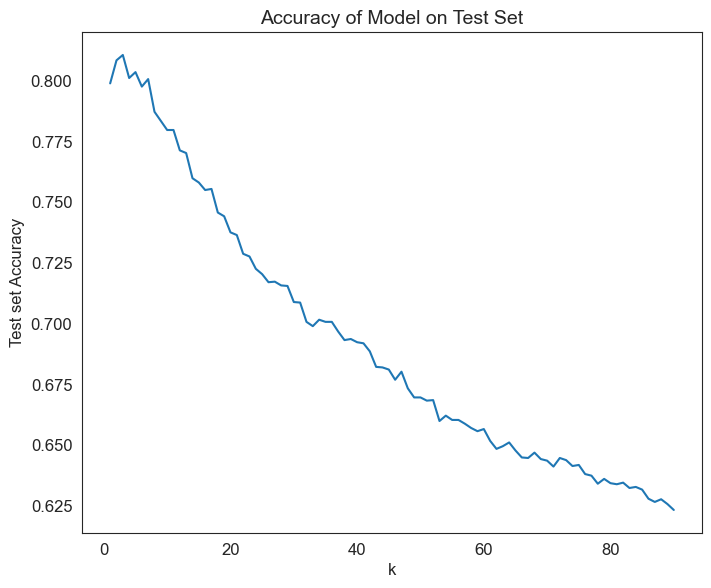

Best K for best accuracy is: 3


In [97]:
accuracies = []
k_list = list(range(1,91))

for k in range(1,91):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    accuracies.append(knn.score(X_test_scaled, y_test))
      
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Test set Accuracy")
plt.title("Accuracy of Model on Test Set")
plt.show()

l_np = np.asarray(accuracies)

print(f"Best K for best accuracy is: {l_np.argmax()+1}")

In [98]:
# Because KNN classifier does not depend on linear relationships?

knn_classifier = KNeighborsClassifier(n_neighbors = 3)

print(X_train_scaled.shape)
print(y_train.shape)

knn_classifier.fit(X_train_scaled, y_train)

training_accuracy = knn_classifier.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = knn_classifier.predict(X_test_scaled)

print(classification_report(y_test, predictions))

(18126, 5)
(18126, 1)
The accuracy of model on training data is: 85.0%

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1812
           1       0.85      0.87      0.86      1564
           2       0.84      0.66      0.74      1156

    accuracy                           0.81      4532
   macro avg       0.82      0.80      0.80      4532
weighted avg       0.81      0.81      0.81      4532



In [99]:
X = features_data.drop(columns=['orientation'])
y = features_data[['orientation']]

# split the data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

# ravel() function returns flattened data as an ndarray(1d array)
# y_train = y_train.values.ravel()
# y_test = y_test.values.ravel()

# use MinMaxScaler to put all features values in the same range and scale
# cannot us minmaxscaler on object?
# import StandardScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

# just transform test data. fiitting it skews results.
X_test_scaled = scaler.transform(X_test) # Split the data into training set and test set

print(len(X_test_scaled))
print(len(y_test))
print(X_train_scaled.shape)
print(y_train.shape)

4532
4532
(18126, 5)
(18126, 1)


### Multinomial Naive Bayes 

In [119]:
nbayes = MultinomialNB()

nbayes.fit(X_train_scaled, y_train)

training_accuracy = nbayes.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = nbayes.predict(X_test_scaled)

print(classification_report(y_test, predictions))

The accuracy of model on training data is: 43.0%

              precision    recall  f1-score   support

           0       0.43      0.89      0.58      1812
           1       0.47      0.24      0.31      1564
           2       0.00      0.00      0.00      1156

    accuracy                           0.44      4532
   macro avg       0.30      0.37      0.30      4532
weighted avg       0.33      0.44      0.34      4532



### Decision Tree Classifier

In [122]:
from sklearn import tree
dtree = tree.DecisionTreeClassifier()
dtree.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [123]:
dtree.score(X_train_scaled,y_train)

0.8889440582588547

In [124]:
features_data.columns

Index(['orientation', 'city', 'ethnicity', 'religion', 'sentiment',
       'body_type'],
      dtype='object')

In [125]:
print("City Dict")
print(city_dict)
print()

print("Ethnicity Dict")
print(ethnicity_dict)
print()

print("Religion Dict")
print(religion_dict)
print()

print("Religous Sentiment")
print(sentiment_dict)
print()

print("Body Type")
print(body_type_dict)
print()


City Dict
{84: 'san carlos', 27: 'emeryville', 86: 'san francisco', 70: 'palo alto', 76: 'redwood city', 13: 'burlingame', 9: 'berkeley', 49: 'martinez', 63: 'oakland', 78: 'rodeo', 34: 'hayward', 57: 'mountain view', 1: 'albany', 6: 'belmont', 83: 'san bruno', 16: 'castro valley', 74: 'pleasant hill', 28: 'fairfax', 35: 'hercules', 22: 'daly city', 52: 'millbrae', 69: 'pacifica', 77: 'richmond', 62: 'novato', 26: 'el sobrante', 51: 'mill valley', 50: 'menlo park', 67: 'orinda', 66: 'orange', 41: 'lafayette', 24: 'el cerrito', 32: 'green brae', 55: 'moraga', 75: 'point richmond', 25: 'el granada', 31: 'fremont', 19: 'corte madera', 33: 'half moon bay', 73: 'pinole', 8: 'benicia', 0: 'alameda', 30: 'foster city', 43: 'larkspur', 7: 'belvedere tiburon', 12: 'brisbane', 82: 'san anselmo', 40: 'kentfield', 23: 'east palo alto', 4: 'atherton', 56: 'moss beach', 48: 'marin city', 17: 'colma', 45: 'los angeles', 21: 'crockett', 46: 'los gatos', 39: 'kensington', 80: 'ross', 18: 'concord', 10:

In [105]:
# (City: SF, Ethnicity: White, Religion: Other, Religious Sentiment: But not too serious, Body Type: average)

probable_orientation = model.predict([[86,8,8,3,1]])
print("Orientation Codes:")
print(orientation_dict)
print()

if probable_orientation == 0:
    print(red+ bold+ "Probable Orientation: Bisexual" +end)
elif probable_orientation == 1:
    print(blue+ bold+ "Probable Orientation: Gay" +end)
else:
    print(green+ bold+ "Probable Orientation: Straight" +end)
print()
print(probable_orientation)


Orientation Codes:
{2: 'straight', 0: 'gay', 1: 'bisexual'}

Probable Orientation: Bisexual

[0]


In [106]:
DTreeModel = DecisionTreeClassifier(criterion = 'gini' , max_depth = 8, min_samples_leaf = 2)

DTreeModel.fit(X_train_scaled, y_train)

training_accuracy = DTreeModel.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = DTreeModel.predict(X_test_scaled)

print(classification_report(y_test, predictions))

print(DTreeModel.get_depth())

The accuracy of model on training data is: 69.0%

              precision    recall  f1-score   support

           0       0.67      0.74      0.70      1812
           1       0.71      0.77      0.74      1564
           2       0.65      0.47      0.54      1156

    accuracy                           0.68      4532
   macro avg       0.68      0.66      0.66      4532
weighted avg       0.68      0.68      0.67      4532

8


In [107]:
from sklearn.svm import SVC
model = SVC(C=100)

In [108]:
model.fit(X_train_scaled, y_train)

SVC(C=100)

In [109]:
model.score(X_test, y_test)

0.39982347749338043

### Random Forest Classifier

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
model = RandomForestClassifier(n_estimators=40)
model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=40)

In [112]:
model.score(X_test, y_test)

0.3609885260370697

In [113]:
y_predict = model.predict(X_test)

In [114]:
y_predict

array([0, 0, 2, ..., 0, 0, 0], dtype=int8)

In [115]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict)
cm

array([[1359,   50,  403],
       [1314,   27,  223],
       [ 872,   34,  250]], dtype=int64)